# Data Cleansing in R

In [1]:
library(DBI)
library(RSQLite)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(DBI)
con <- dbConnect(odbc::odbc(), "EDA")
df <- dbGetQuery(con,"SELECT * FROM BoxOffice.dbo.movies_ffNEW_v")

In [3]:
head(df)

movie_id,budget,original_language,popularity,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,sw_has_poster,...,lang_US,lang_FR,lang_RU,lang_ES,lang_JA,actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,director_movies_cnt,cnt_genres
1,14000000,en,6.575393,93,Short,12314651,1,0,1,...,1,0,0,0,0,NA,NA,NA,0,1
2,40000000,en,8.248895,113,Medium,95149435,1,0,1,...,1,0,0,0,0,NA,NA,NA,0,4
3,3300000,en,64.299988,105,Medium,13092000,1,1,1,...,1,0,0,0,0,NA,NA,NA,0,1
4,1200000,hi,3.174936,122,Large,16000000,0,1,1,...,1,0,0,0,0,NA,NA,NA,0,2
5,0,ko,1.148070,118,Medium,3923970,0,0,1,...,0,0,0,0,0,NA,NA,NA,0,2
6,8000000,en,0.743274,83,Short,3261638,1,0,1,...,1,0,0,0,0,NA,NA,NA,0,3


### Descriptive Statistics

In [4]:
summary(df)

    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
    runtime      runtime_cat           revenue            sw_lang_en    
 Min.   :  0.0   Length:7375        Min.   :1.000e+00   Min.   :0.0000  
 1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06   1st Qu.:1.0000  
 Median :104.0   Mode  :character   Median :1.693e+07   Median :1.0000  
 Mean   :107.7                      Mean   :6.688e+07   Mean   :0.8591  
 3rd Qu.:118.0                      3rd Qu.:6.906e+

In [5]:

df$lang_US <- factor(df$lang_US)
df$lang_FR <- factor(df$lang_FR)
df$lang_ES <- factor(df$lang_ES)
df$lang_RU <- factor(df$lang_RU)
df$lang_JA <- factor(df$lang_JA)
summary(df)

    movie_id        budget          original_language    popularity     
 Min.   :   1   Min.   :        0   Length:7375        Min.   :  0.000  
 1st Qu.:1848   1st Qu.:        0   Class :character   1st Qu.:  3.970  
 Median :3696   Median :  8000000   Mode  :character   Median :  7.456  
 Mean   :3698   Mean   : 22666657                      Mean   :  8.540  
 3rd Qu.:5550   3rd Qu.: 29000000                      3rd Qu.: 10.932  
 Max.   :7398   Max.   :380000000                      Max.   :547.488  
                                                                        
    runtime      runtime_cat           revenue            sw_lang_en    
 Min.   :  0.0   Length:7375        Min.   :1.000e+00   Min.   :0.0000  
 1st Qu.: 94.0   Class :character   1st Qu.:2.405e+06   1st Qu.:1.0000  
 Median :104.0   Mode  :character   Median :1.693e+07   Median :1.0000  
 Mean   :107.7                      Mean   :6.688e+07   Mean   :0.8591  
 3rd Qu.:118.0                      3rd Qu.:6.906e+

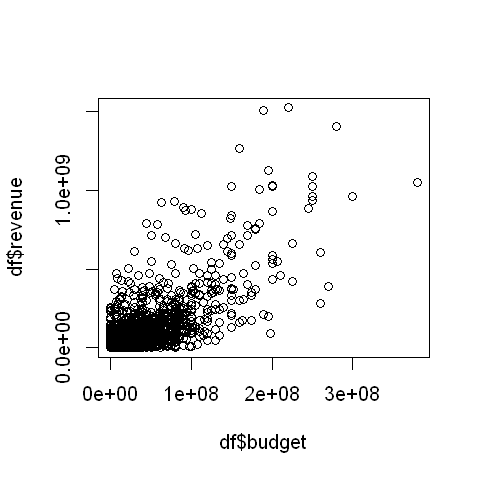

In [6]:
options(repr.plot.width = 4, repr.plot.height = 4)
## consume vs distance
plot(df$revenue ~ df$budget)

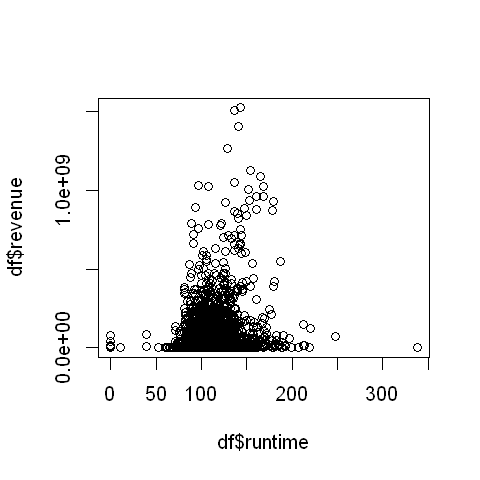

In [8]:
options(repr.plot.width = 4, repr.plot.height = 4)
## consume vs distance
plot(df$revenue ~ df$runtime)

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"

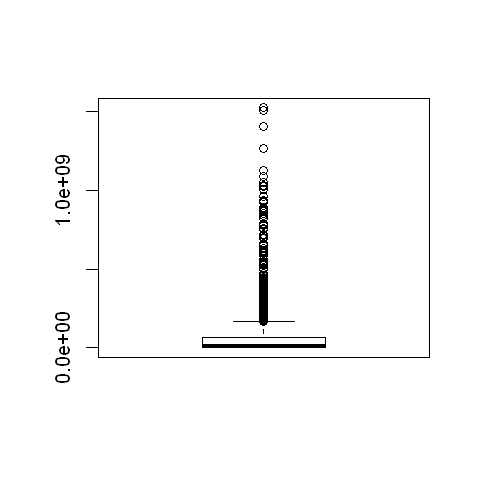

In [9]:
boxplot(df$revenue)

In [10]:
install.packages("dplyr")

also installing the dependencies 'glue', 'rlang', 'tibble', 'tidyselect', 'pillar'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
tibble  3.1.1  3.1.2              TRUE
pillar  1.6.0  1.6.1             FALSE
dplyr   1.0.6  1.0.7              TRUE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"


The downloaded binary packages are in
	C:\Users\rona2_000\AppData\Local\Temp\RtmpMFQfq5\downloaded_packages


installing the source package 'pillar'

Warning message in install.packages("dplyr"):
"installation of package 'pillar' had non-zero exit status"

In [12]:
install.packages("ggpubr")

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'zip', 'glue', 'SparseM', 'conquer', 'sp', 'openxlsx', 'minqa', 'nloptr', 'dplyr', 'cpp11', 'pillar', 'rlang', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'rio', 'lme4', 'tidyr', 'broom', 'tibble', 'tidyselect', 'car', 'ggsci', 'cowplot', 'polynom', 'rstatix'




  There are binary versions available but the source versions are later:
                  binary     source needs_compilation
matrixStats       0.58.0     0.59.0              TRUE
RcppArmadillo 0.10.4.0.0 0.10.5.0.0              TRUE
zip                2.1.1      2.2.0              TRUE
openxlsx           4.2.3      4.2.4              TRUE
dplyr              1.0.6      1.0.7              TRUE
cpp11              0.2.7      0.3.1             FALSE
pillar             1.6.0      1.6.1             FALSE
quantreg            5.85       5.86              TRUE
rio               0.5.26     0.5.27             FALSE
lme4              1.1-26   1.1-27.1              TRUE
broom              0.7.6      0.7.8             FALSE
tibble             3.1.1      3.1.2              TRUE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"

package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\Rcpp\libs\x64\Rcpp.dll: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'zip' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'SparseM' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'openxlsx' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'carData' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked
package 'tidyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tidyr\libs\x64\tidyr.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tidyr\libs\x64\tidyr.dll: Permission denied"Warning message:
"restored 'tidyr'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"

package 'car' successfully unpacked and MD5 sums checked
package 'ggsci' successfully unpacked and MD5 sums checked
package 'cowplot' successfully unpacked and MD5 sums checked
package 'polynom' successfully unpacked and MD5 sums checked
package 'rstatix' successfully unpacked and MD5 sums checked
package 'ggpubr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rona2_000\AppData\Local\Temp\RtmpMFQfq5\downloaded_packages


installing the source packages 'cpp11', 'pillar', 'rio', 'broom'

Warning message in install.packages("ggpubr"):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("ggpubr"):
"installation of package 'broom' had non-zero exit status"

In [14]:
library("dplyr")
library("ggpubr")

Warning message:
"package 'ggpubr' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'ggpubr' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'broom' 0.5.2 is being loaded, but >= 0.7.4 is required


In [15]:
shapiro.test(df$revenue)


	Shapiro-Wilk normality test

data:  df$revenue
W = 0.50359, p-value < 2.2e-16


In [17]:
shapiro.test(df$popularity)

ERROR: Error in shapiro.test(df$popularity): sample size must be between 3 and 5000


Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"

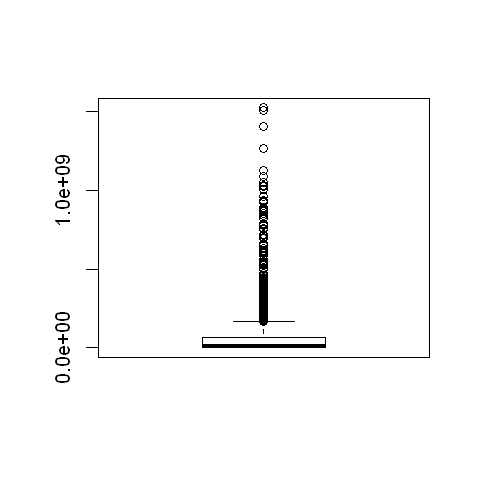

In [19]:
boxplot(df$revenue)

In [20]:
median(df$revenue, na.rm=T)
IQR(df$revenue, na.rm=T)

[1] 16928137

[1] 66650275

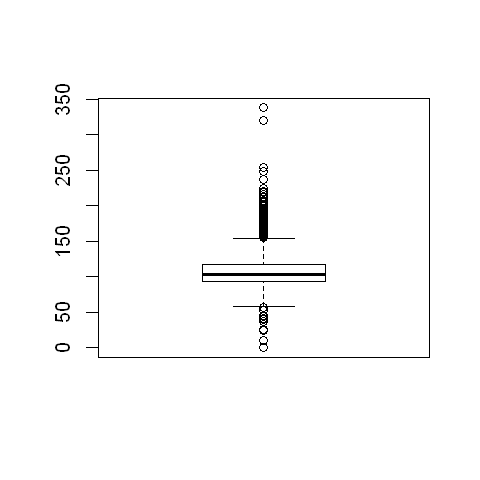

In [37]:
boxplot(df$runtime)

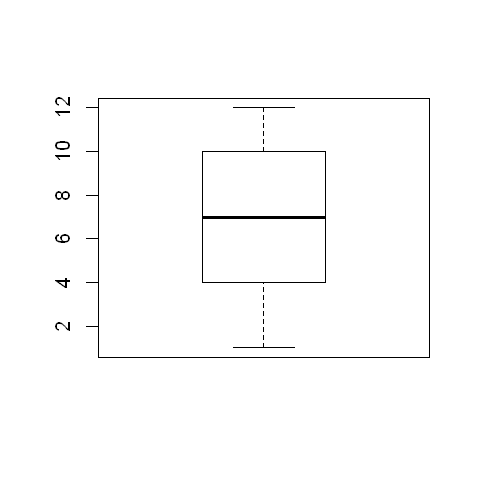

In [40]:
boxplot(df$release_month )

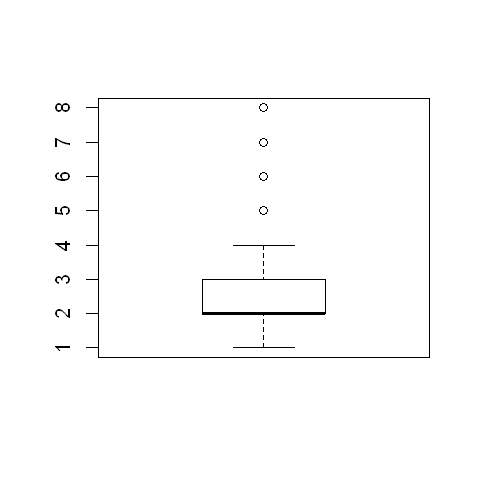

In [43]:
boxplot(df$cnt_genres)

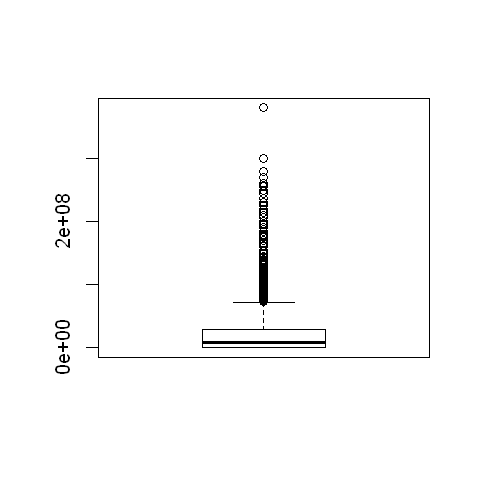

In [44]:
boxplot(df$budget)

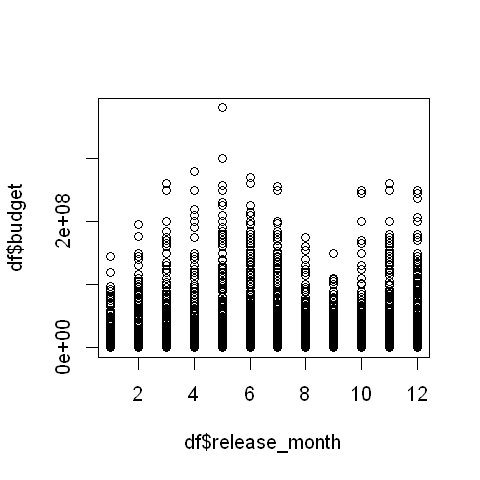

In [45]:
plot(df$budget ~ df$release_month)

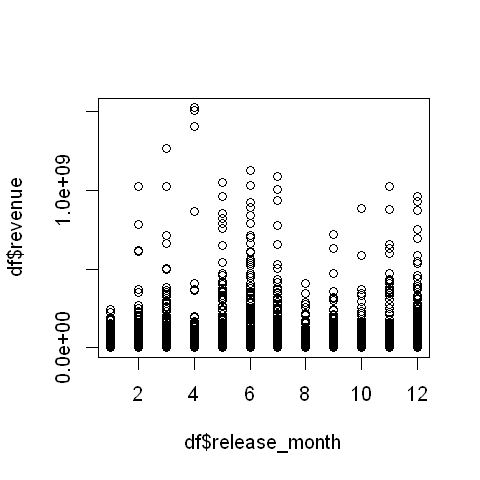

In [46]:
plot(df$revenue ~ df$release_month)

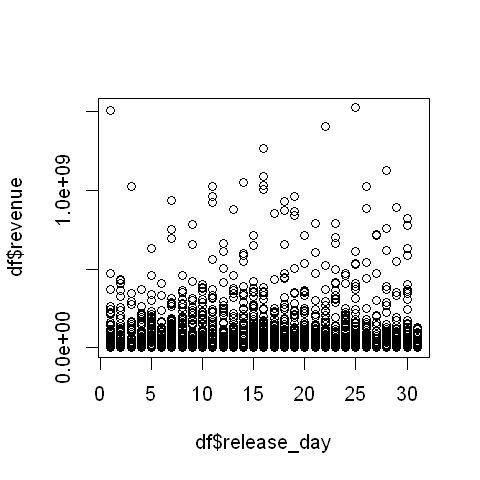

In [47]:
plot(df$revenue ~ df$release_day)

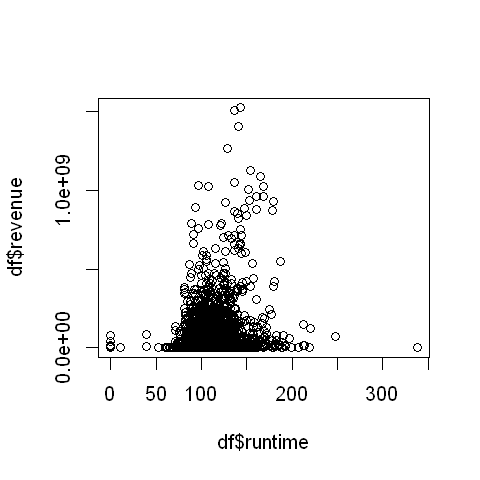

In [48]:
plot(df$revenue ~ df$runtime)

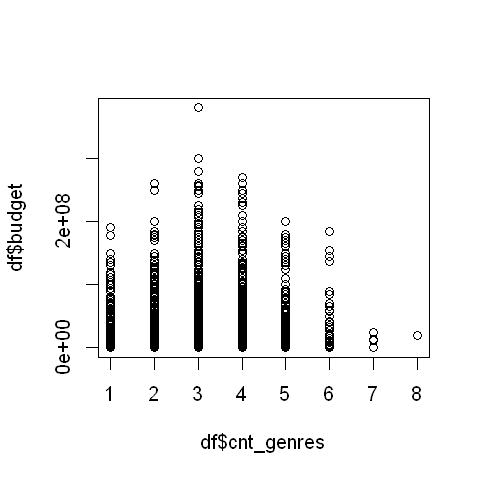

In [52]:
plot(df$budget ~ df$cnt_genres)

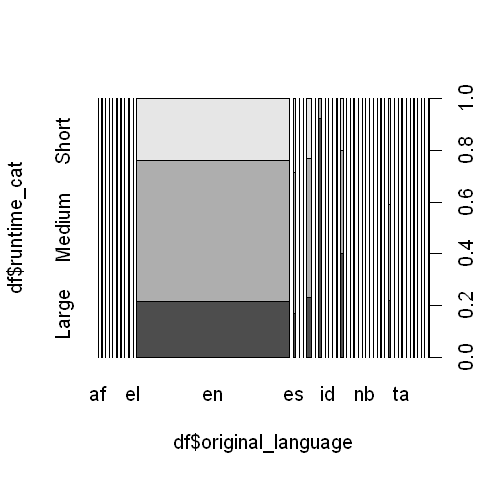

In [49]:
plot(df$runtime_cat ~ df$original_language)

In [ ]:
#מבחן נורמלי למשתנים רציפים

In [56]:
shapiro.test(df$popularity)

ERROR: Error in shapiro.test(df$popularity): sample size must be between 3 and 5000


In [54]:
shapiro.test(df$budget)

ERROR: Error in shapiro.test(df$budget): sample size must be between 3 and 5000


In [55]:
shapiro.test(df$runtime)

ERROR: Error in shapiro.test(df$runtime): sample size must be between 3 and 5000


In [57]:
# Data Cleansing
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}

In [58]:
df_out <- outlierMatrix(df)
head(df_out)

movie_id,budget,popularity,runtime,revenue,sw_lang_en,sw_web_presence,sw_has_poster,release_year,release_month,high_release_month,release_day,producers_cnt,countries_cnt,actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,director_movies_cnt,cnt_genres
0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0
0,0,1,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0
0,0,0,0,0,1,0,0,0,0,0,0,NA,0,NA,NA,NA,0,0
0,0,0,0,0,1,0,0,0,0,0,0,NA,0,NA,NA,NA,0,0
0,0,0,0,0,0,0,0,0,0,0,0,NA,1,NA,NA,NA,0,0


In [24]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}

getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [59]:
mm <- getMissingness(data = df)

[[1]]
                  var na.count  rate
1 actor0_prev_revenue     7375 100.0
2 actor1_prev_revenue     7375 100.0
3 actor2_prev_revenue     7375 100.0
4             revenue     4382  59.4
5       producers_cnt      395   5.4
6             runtime        5   0.1
7        release_year        1   0.0
8       release_month        1   0.0
9         release_day        1   0.0

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 7375 rows."



In [60]:
mm$missingness

var,na.count,rate
actor0_prev_revenue,7375,100.0
actor1_prev_revenue,7375,100.0
actor2_prev_revenue,7375,100.0
revenue,4382,59.4
producers_cnt,395,5.4
runtime,5,0.1
release_year,1,0.0
release_month,1,0.0
release_day,1,0.0


In [61]:
df_na <- missingMatrix(df)

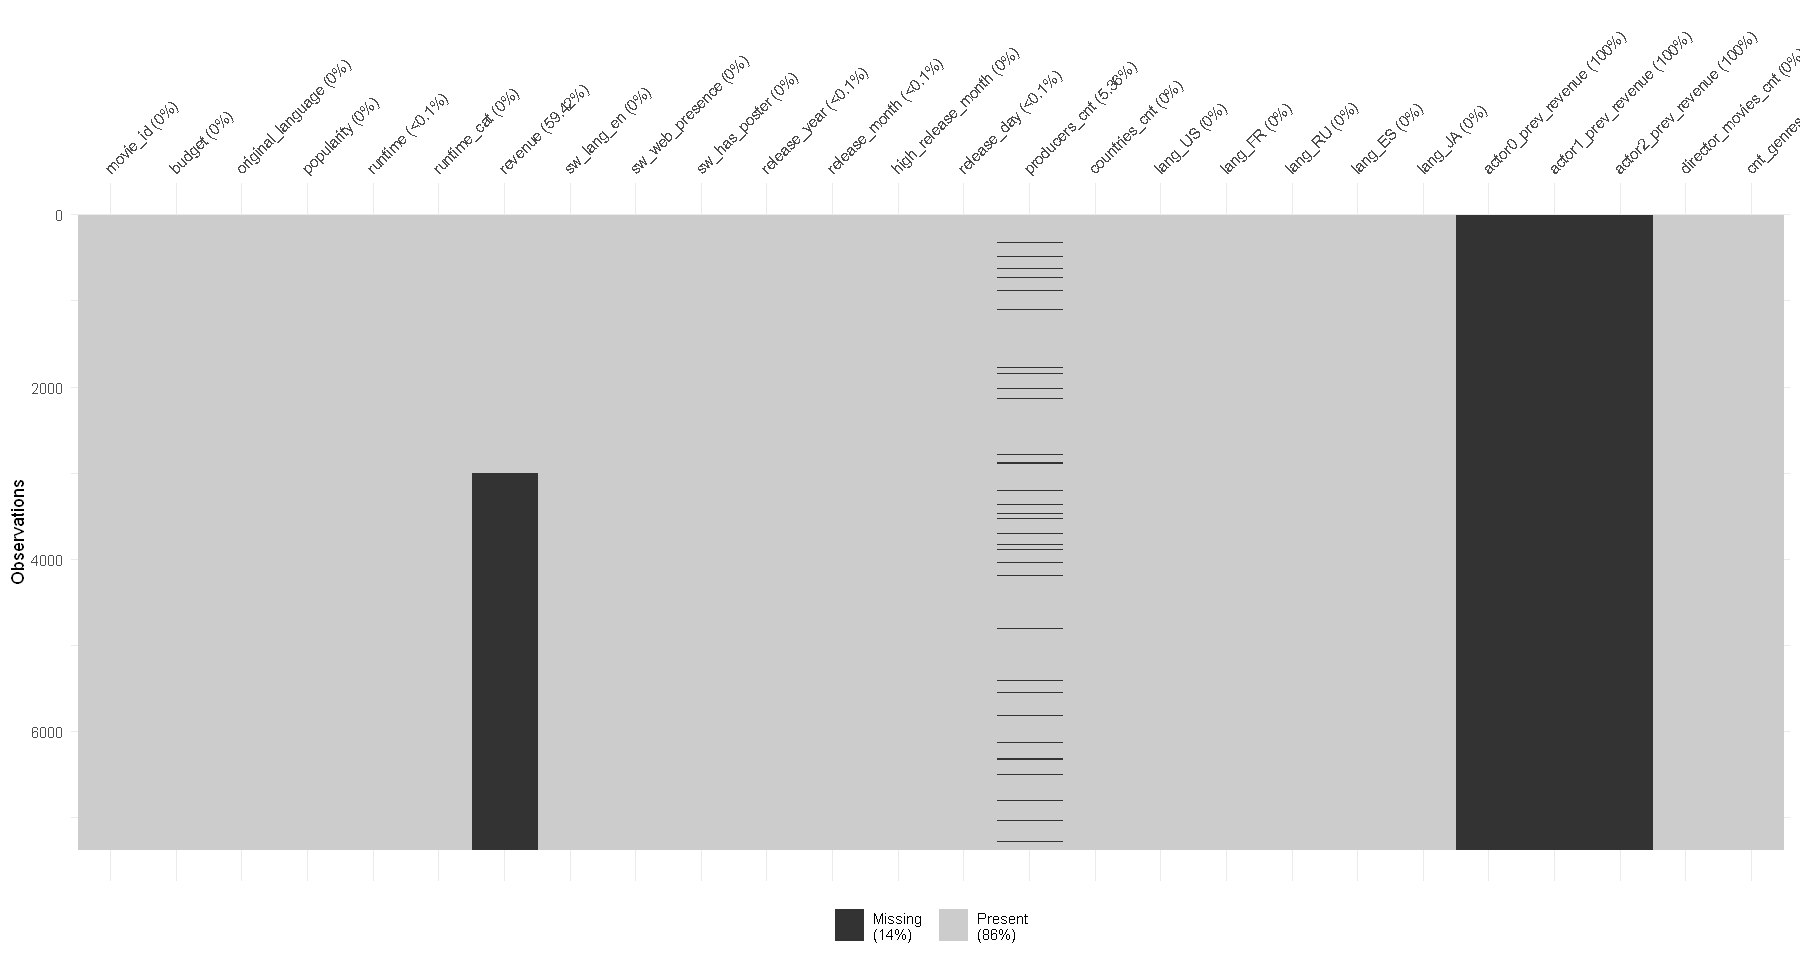

In [62]:
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 8)
vis_miss(df,warn_large_data=F)

In [63]:
df_na <- df_na[,mm$missingness$var]
head(df_na)

actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,revenue,producers_cnt,runtime,release_year,release_month,release_day
1,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0
1,1,1,0,1,0,0,0,0
1,1,1,0,1,0,0,0,0


In [67]:
corrgram(df_na, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  main="Missingness correlation")

Warning message in cor(x, use = "pairwise.complete.obs", method = cor.method):
"the standard deviation is zero"

ERROR: Error in eigen(cmat): infinite or missing values in 'x'


In [70]:
install.packages("MESS")

also installing the dependencies 'glue', 'tibble', 'tidyselect', 'pillar', 'rlang', 'tweenr', 'polyclip', 'haven', 'dplyr', 'ggplot2', 'ggstance', 'ggridges', 'mosaicCore', 'ggforce', 'labelled', 'quadprog', 'geepack', 'geeM', 'ggformula', 'kinship2'




  There are binary versions available but the source versions are later:
        binary source needs_compilation
tibble   3.1.1  3.1.2              TRUE
pillar   1.6.0  1.6.1             FALSE
dplyr    1.0.6  1.0.7              TRUE
ggplot2  3.3.3  3.3.5             FALSE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"

package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\glue\libs\x64\glue.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\glue\libs\x64\glue.dll: Permission denied"Warning message:
"restored 'glue'"

package 'tibble' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tibble'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tibble\libs\x64\tibble.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tibble\libs\x64\tibble.dll: Permission denied"Warning message:
"restored 'tibble'"

package 'tidyselect' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'tidyselect'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\tidyselect\libs\x64\tidyselect.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\tidyselect\libs\x64\tidyselect.dll: Permission denied"Warning message:
"restored 'tidyselect'"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\rona2_000\Anaconda3\envs\eda\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tweenr' successfully unpacked and MD5 sums checked
package 'polyclip' successfully unpacked and MD5 sums checked
package 'haven' successfully unpacked and MD5 sums checked
package 'ggstance' successfully unpacked and MD5 sums checked
package 'ggridges' successfully unpacked and MD5 sums checked
package 'mosaicCore' successfully unpacked and MD5 sums checked
package 'ggforce' successfully unpacked and MD5 sums checked
package 'labelled' successfully unpacked and MD5 sums checked
package 'quadprog' successfully unpacked and MD5 sums checked
package 'geepack' successfully unpacked and MD5 sums checked
package 'geeM' successfully unpacked and MD5 sums checked
package 'ggformula' successfully unpacked and MD5 sums checked
package 'kinship2' successfully unpacked and MD5 sums checked
package 'MESS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rona2_000\AppData\Local\Temp\RtmpMFQfq5\downloaded_packages


installing the source packages 'pillar', 'ggplot2'

Warning message in install.packages("MESS"):
"installation of package 'pillar' had non-zero exit status"Warning message in install.packages("MESS"):
"installation of package 'ggplot2' had non-zero exit status"

In [75]:
library("Hmisc")

In [305]:
#Now lets check the correlations between the numeric variables. We will use a correlation matrix from the Hmisc package.
vars <- c("revenue","budget","runtime","popularity","release_day","release_month","release_year")
res1 <- rcorr(as.matrix(df[,vars]), type="spearman")

In [306]:
res1


              revenue budget runtime popularity release_day release_month
revenue          1.00   0.69    0.26       0.59        0.06          0.04
budget           0.69   1.00    0.26       0.51        0.02          0.05
runtime          0.26   0.26    1.00       0.18        0.05          0.14
popularity       0.59   0.51    0.18       1.00        0.04          0.03
release_day      0.06   0.02    0.05       0.04        1.00          0.00
release_month    0.04   0.05    0.14       0.03        0.00          1.00
release_year     0.02   0.15    0.01       0.13       -0.01         -0.07
              release_year
revenue               0.02
budget                0.15
runtime               0.01
popularity            0.13
release_day          -0.01
release_month        -0.07
release_year          1.00

n
              revenue budget runtime popularity release_day release_month
revenue          2993   2993    2991       2993        2993          2993
budget           2993   2993    2991     

In [86]:
df$runtimecat <- as.numeric(df$runtime_cat)
vars <- c("runtime_cat")

res2 <- rcorr(as.matrix(df[,vars]),type="spearman")
res2


     [,1]
[1,]    1

n= 7375 


P
     [,1]
[1,]     

ERROR: Error in t.test.formula(df$runtime_cat ~ df$original_language, var.equal = T, : grouping factor must have exactly 2 levels


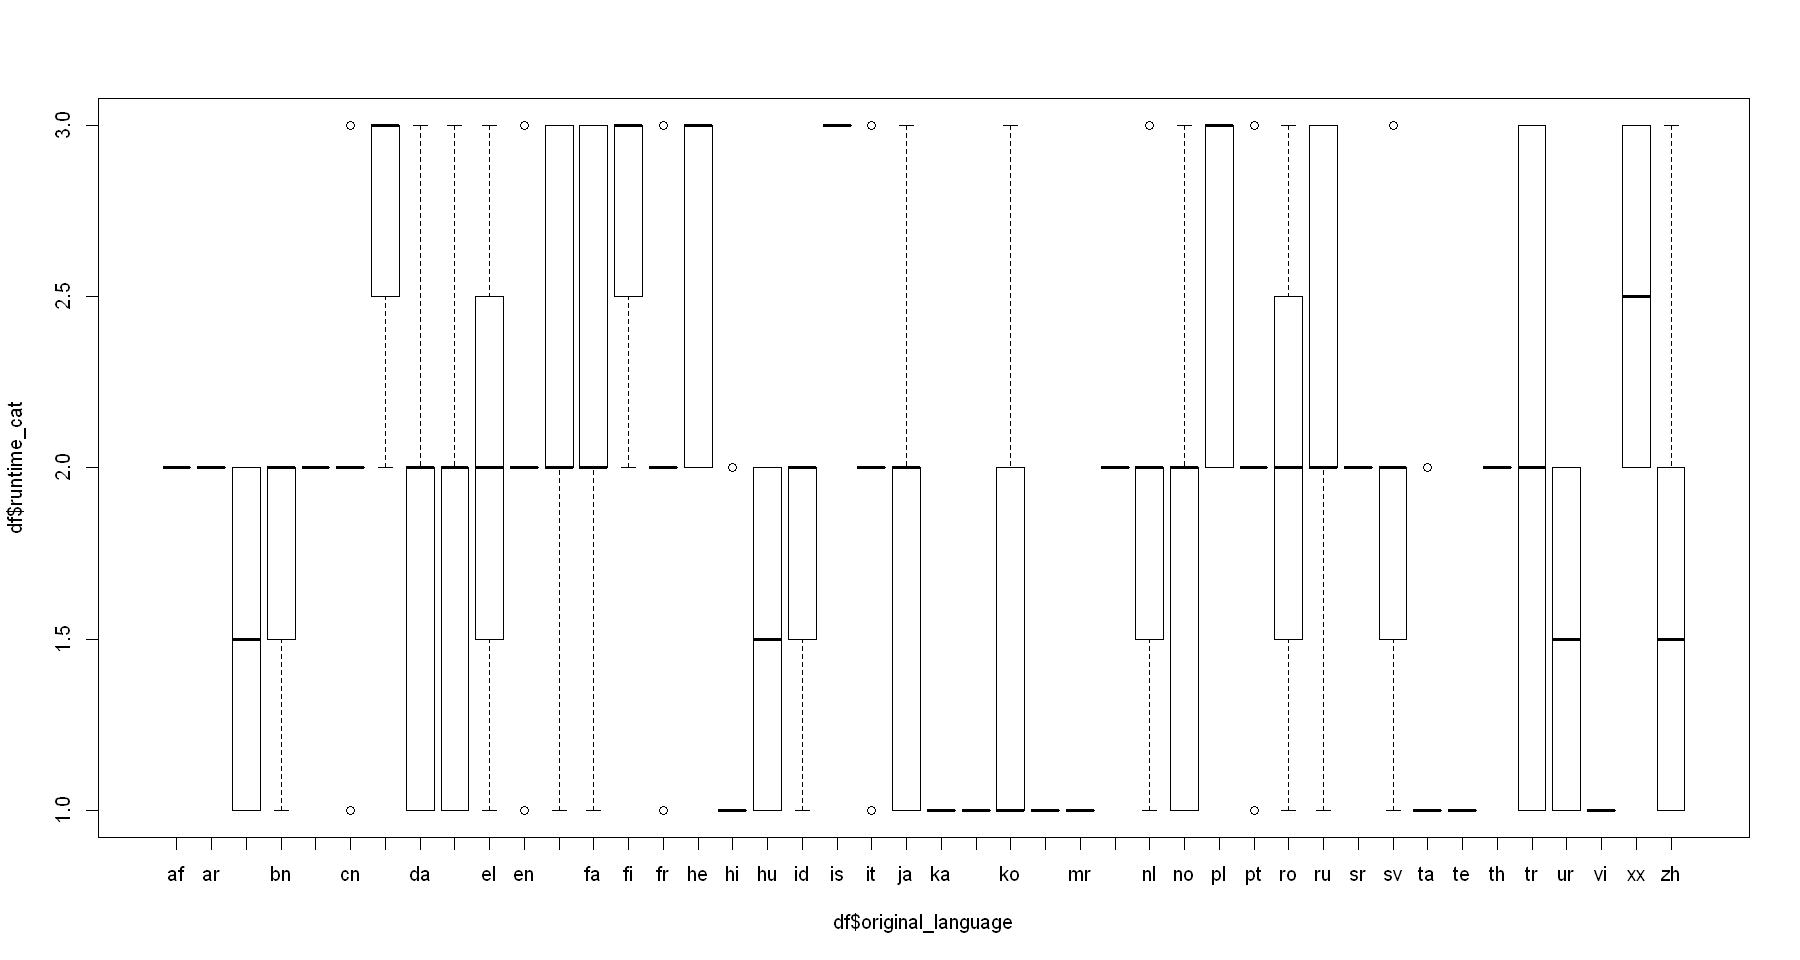

In [87]:
boxplot(df$runtime_cat ~ df$original_language)
t.test(df$runtime_cat ~ df$original_language,var.equal = T,paired = F)

In [89]:
boxplot(df$runtime_cat ~ df$poster_path )
t.test(df$runtime_cat ~ df$poster_path,var.equal = T,paired = F)

ERROR: Error in stats::model.frame.default(formula = df$runtime_cat ~ df$poster_path): invalid type (NULL) for variable 'df$poster_path'


In [90]:
table(df$original_language)


  af   ar   bm   bn   ca   cn   cs   da   de   el   en   es   fa   fi   fr   he 
   1    1    2    3    1   41    3   17   49    3 6336   95    5    3  199    6 
  hi   hu   id   is   it   ja   ka   kn   ko   ml   mr   nb   nl   no   pl   pt 
 118    4    3    1   55   90    1    1   48   12    1    1   11    5    5   13 
  ro   ru   sr   sv   ta   te   th   tr   ur   vi   xx   zh 
   8  105    3   20   31    9    5    9    2    1    2   46 

In [91]:
### differences between the average revenue by language?
df %>% 
    group_by(original_language) %>% 
    summarise(revenue_avg=mean(revenue,na.rm=T), revenue_sd=sd(revenue,na.rm=T),n=n()) %>% 
    arrange(desc(n))

original_language,revenue_avg,revenue_sd,n
en,74781023.5,146000315.8,6336
fr,17132565.7,51746646.0,199
hi,25346368.7,49616798.9,118
ru,7227709.7,12086653.5,105
es,8564790.2,13620381.7,95
ja,30651798.8,32415933.6,90
it,16927302.3,47183421.9,55
de,20530900.6,30979114.7,49
ko,13776704.3,21344783.6,48
zh,70376369.2,104571399.8,46


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."

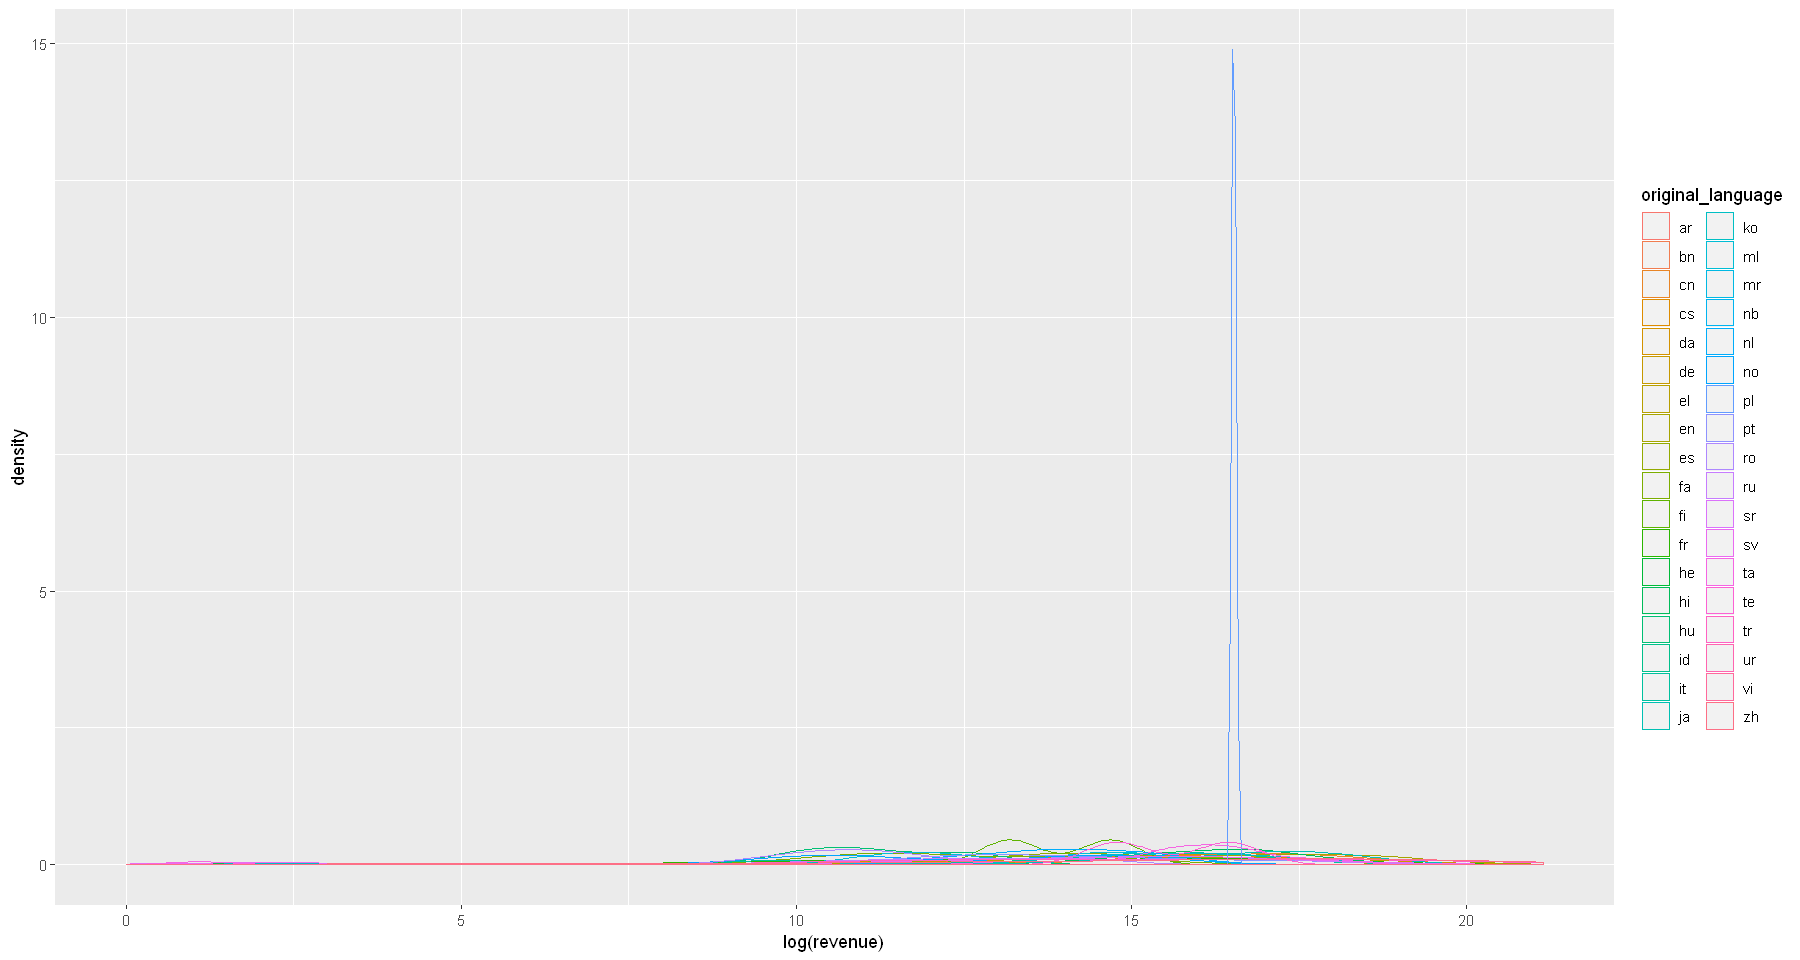

In [92]:
ggplot(data=df) +
    geom_density(aes(log(revenue), group=original_language, color=original_language))

In [93]:
df <- df %>% mutate(orig_lang_en=ifelse(original_language == "english",original_language,'other'))

In [94]:
df <- df %>% 
    mutate(orig_lang2=ifelse(original_language %in% c("en","fr","in","ru","es","ja"),original_language,'other'))

In [96]:
df %>% 
    group_by(orig_lang2) %>% 
    summarise(revenue_avg=mean(revenue,na.rm=T), revenue_sd=sd(revenue,na.rm=T),n=n()) %>% 
    arrange(desc(n))

orig_lang2,revenue_avg,revenue_sd,n
11,74781024,146000316,6336
other,21661090,47864635,550
15,17132566,51746646,199
34,7227710,12086653,105
12,8564790,13620382,95
22,30651799,32415934,90


Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."

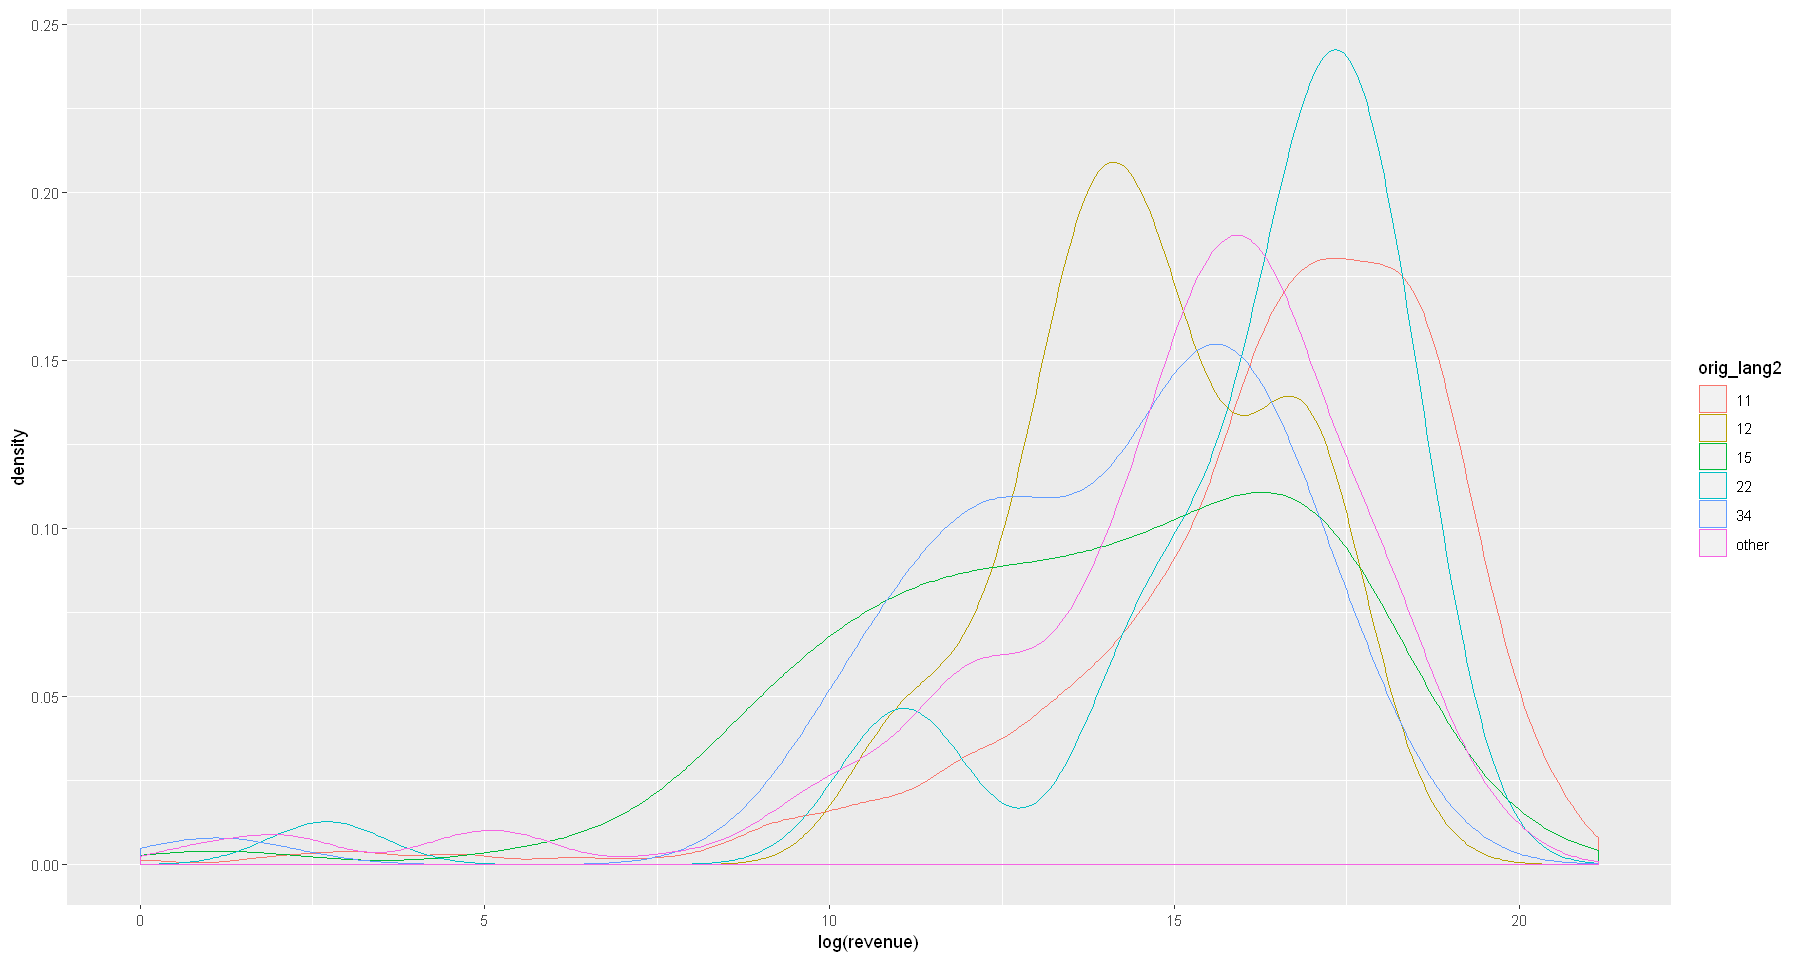

In [97]:
ggplot(data=df) +
    geom_density(aes(log(revenue), group=orig_lang2, color=orig_lang2))

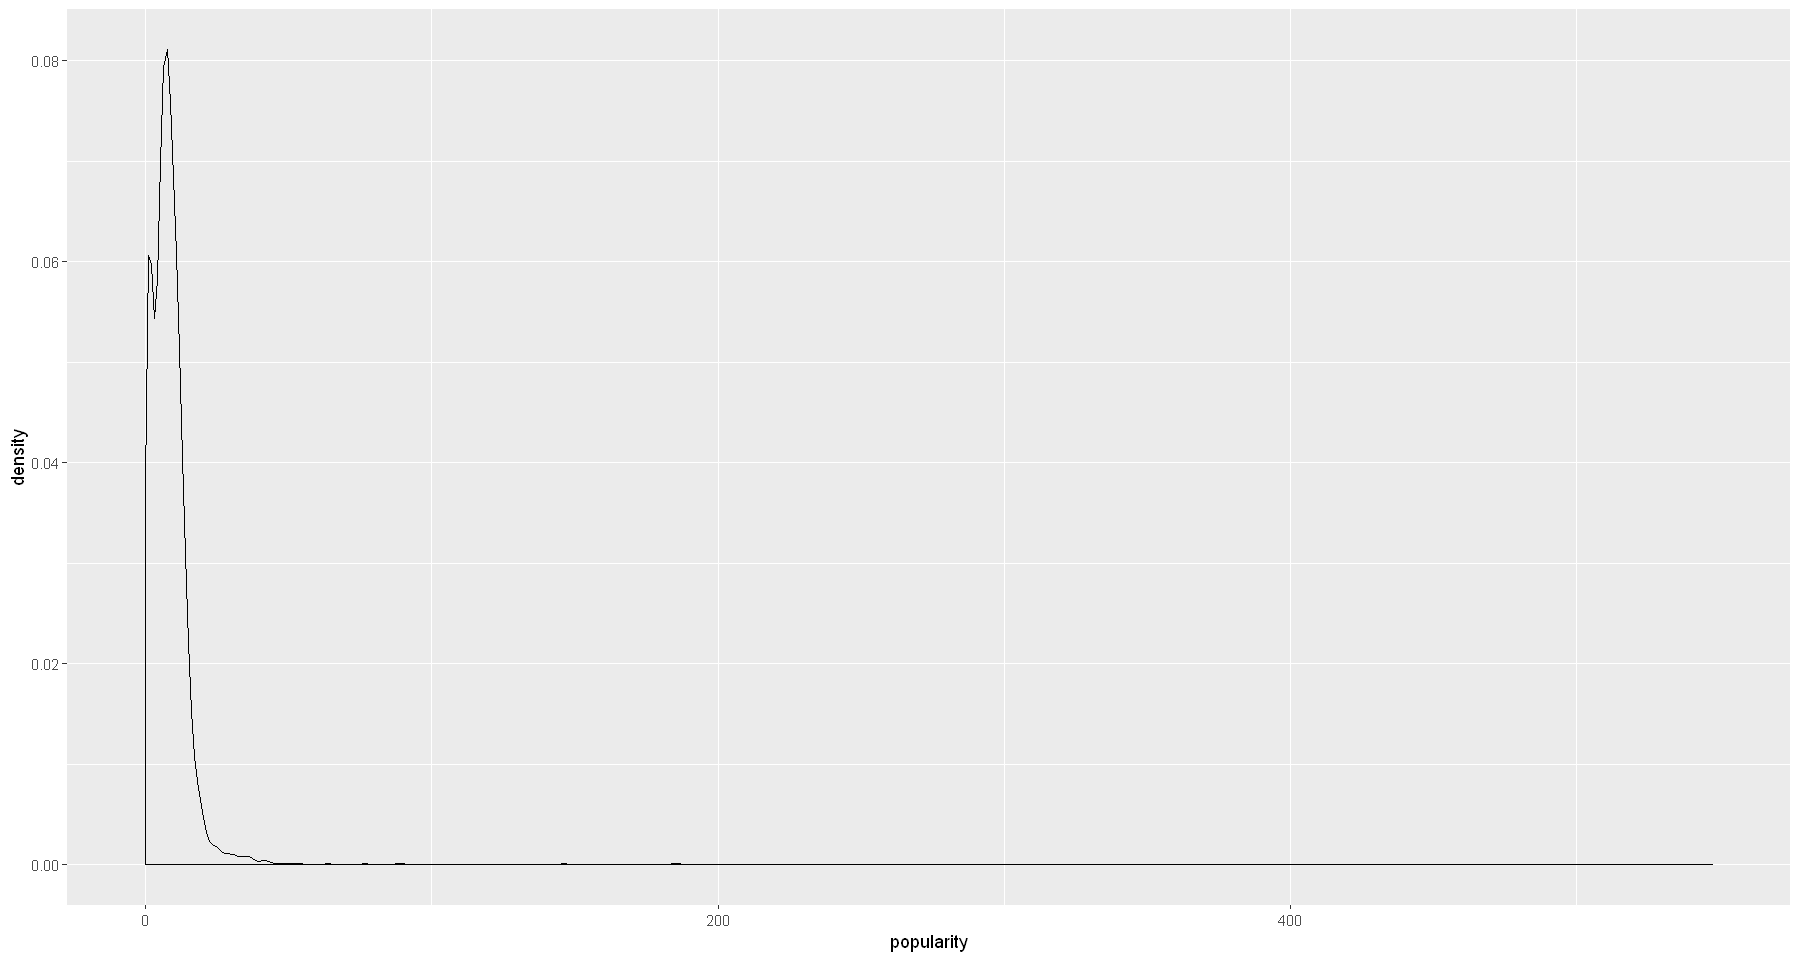

In [98]:
### popularity
ggplot(data=df) +
    geom_density(aes(popularity))

Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
ERROR while rich displaying an object: All columns in a tibble must be 1d or 2d objects:
* Column `x` is function
Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_cont

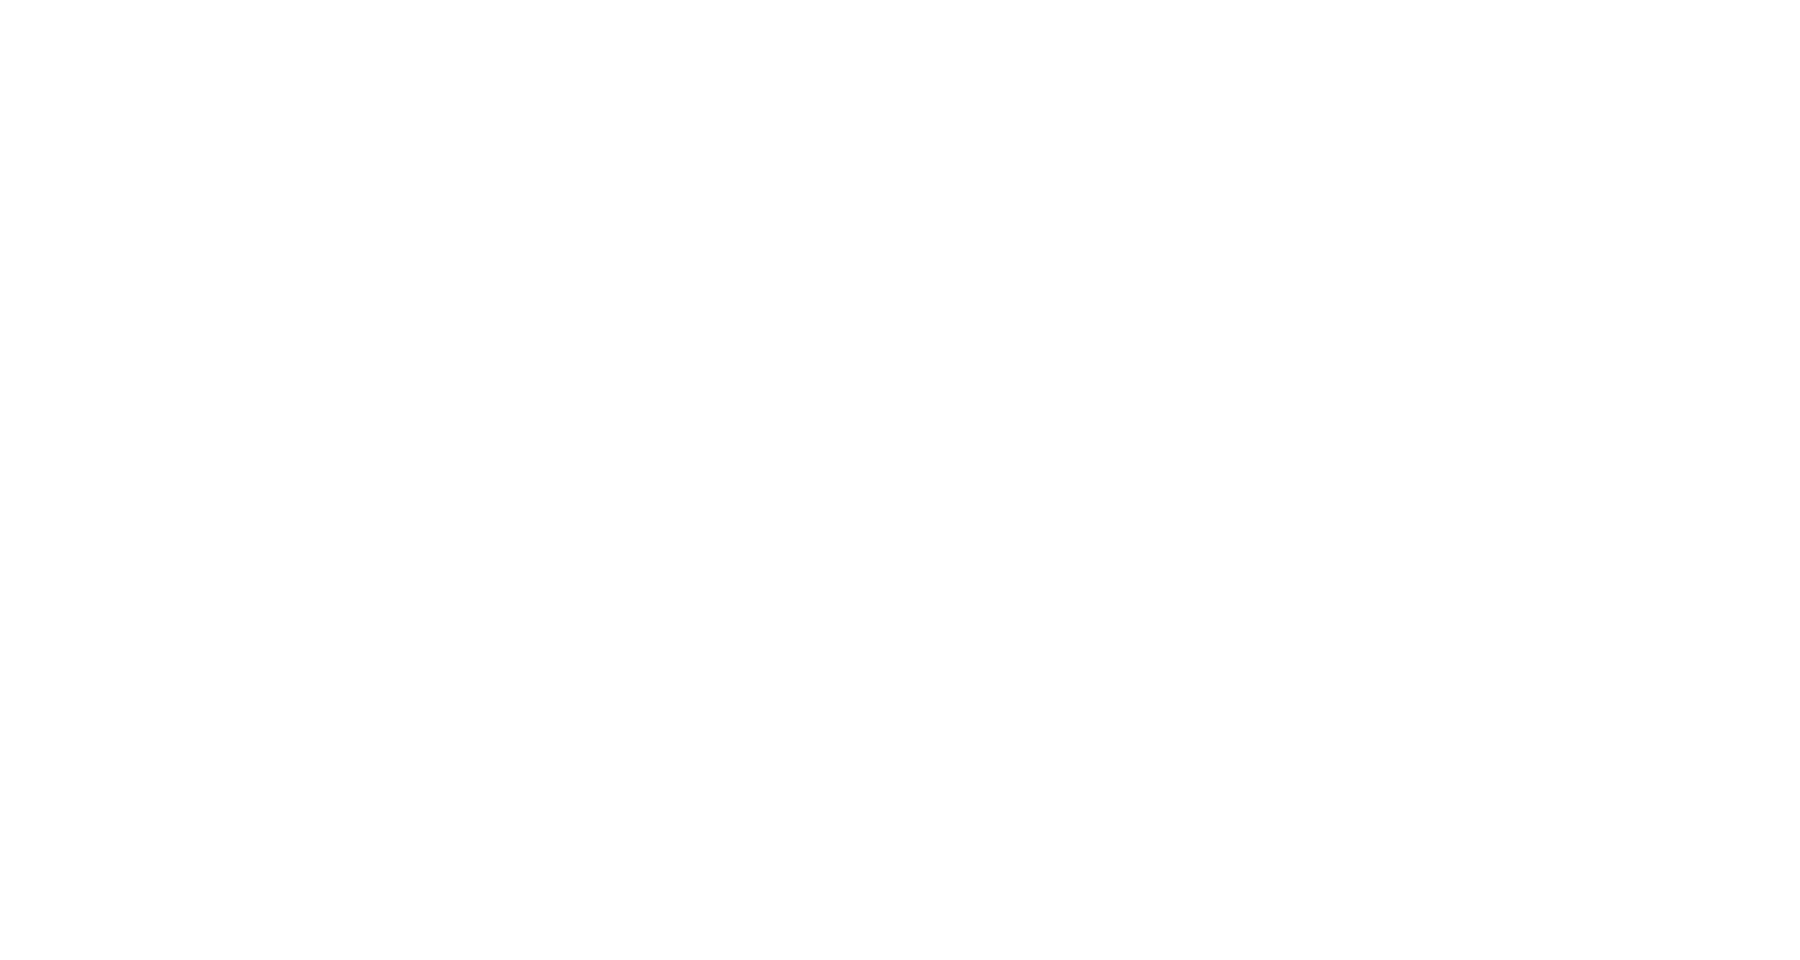

In [99]:
### popularity
ggplot(data=df) +
    geom_point(aes(x=id, y=popularity)) +
    geom_hline(yintercept = 25,color="red")

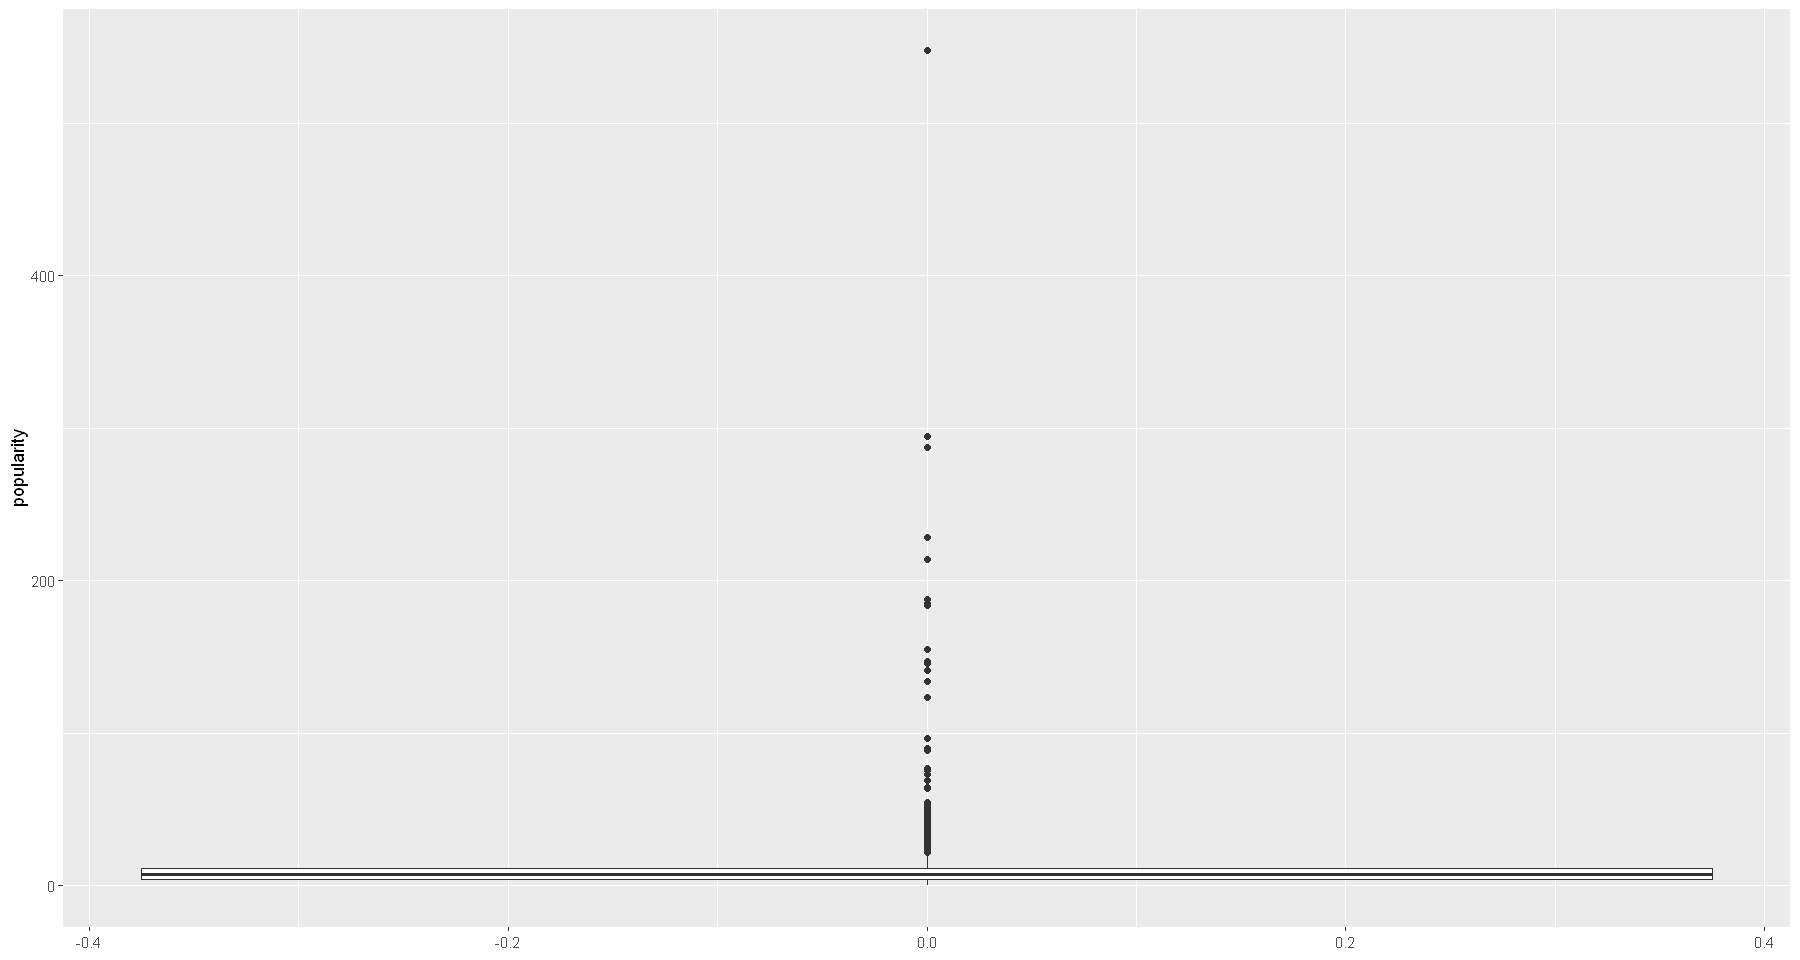

In [100]:
### popularity
ggplot(data=df) +
    geom_boxplot(aes(y = popularity))

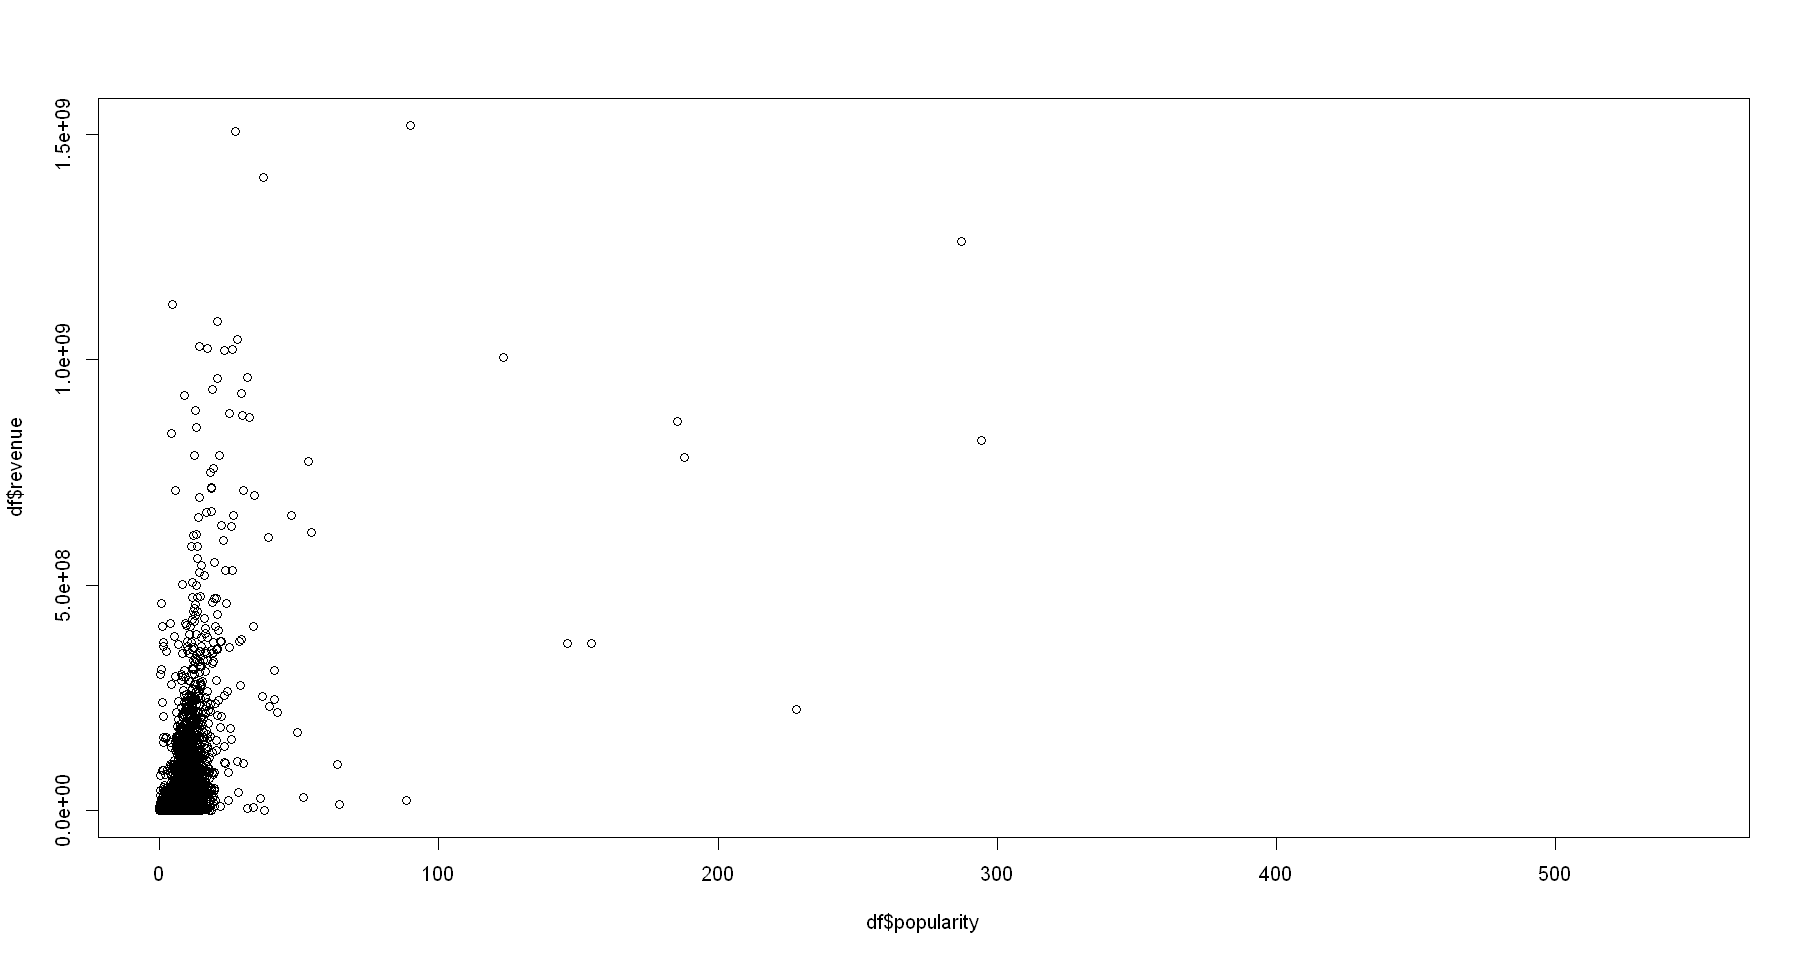

In [101]:
plot(df$revenue ~ df$popularity)

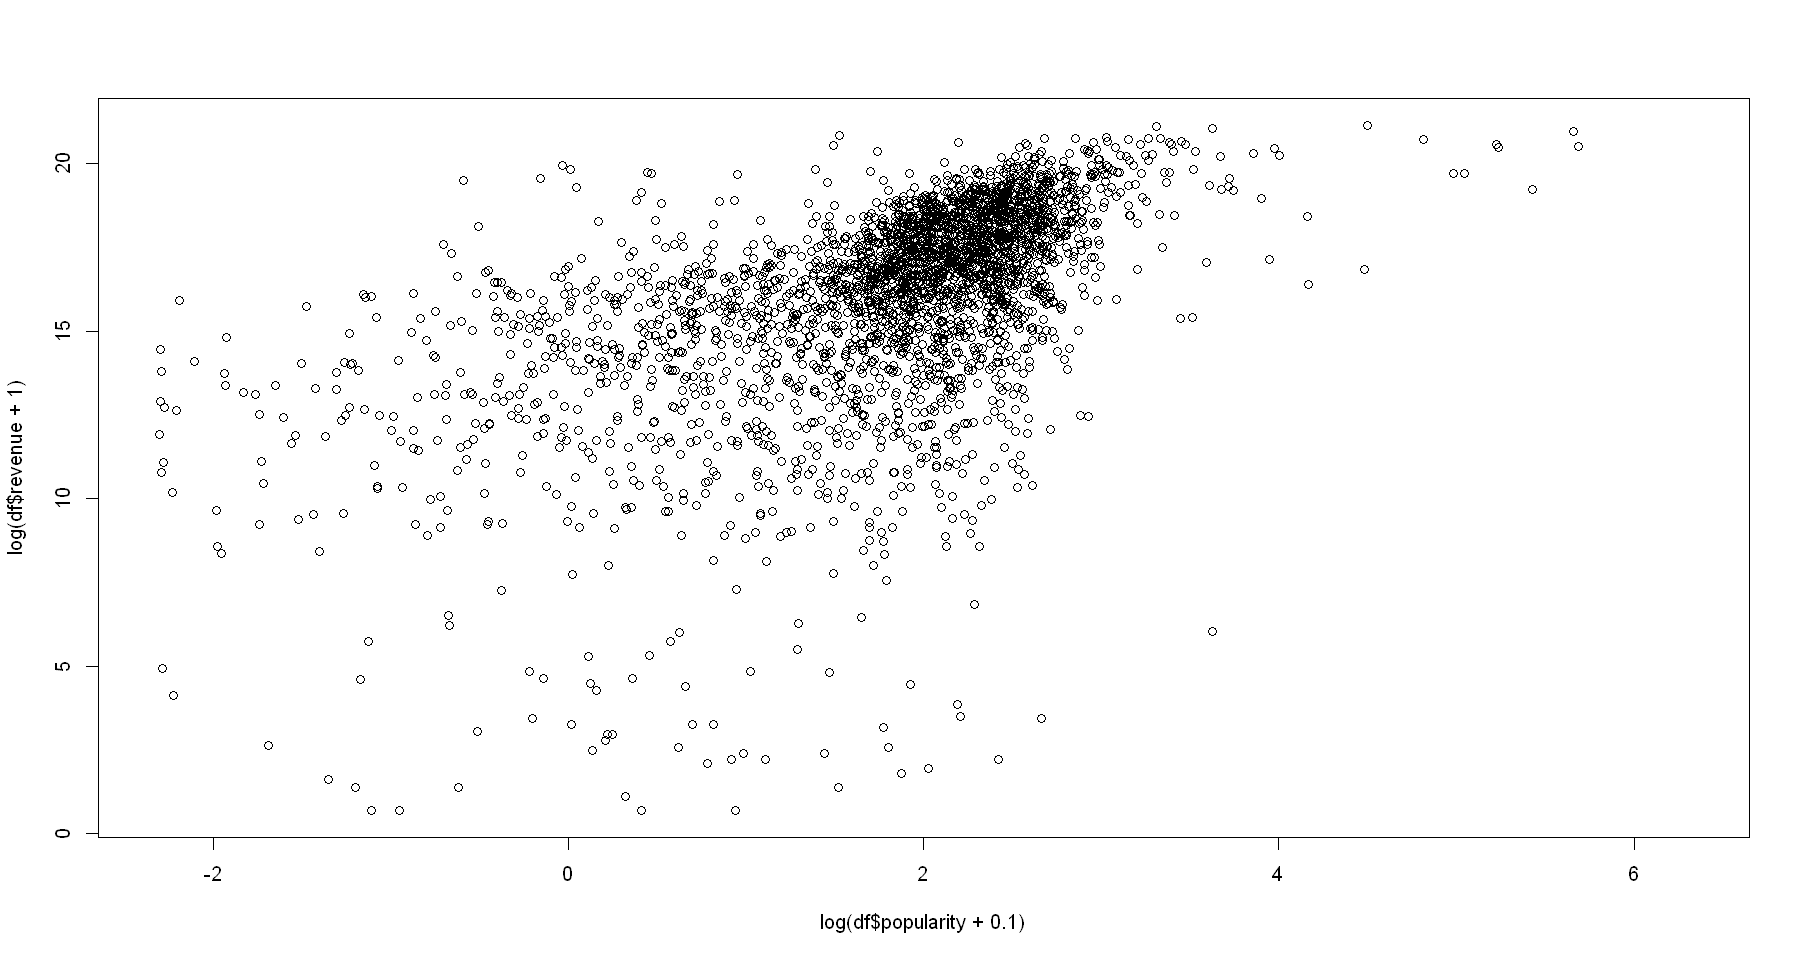

In [102]:
plot(log(df$revenue+1) ~ log(df$popularity+0.1))

In [107]:

install.packages("lubridate")

Warning message:
"package 'lubridate' is in use and will not be installed"

In [108]:
library(lubridate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    94.0   104.0   107.7   118.0   338.0       5 


  0  11  25  26  38  40  42  44  46  53  57  59  60  62  63  64  65  66  67  68 
 19   1   1   1   1   3   1   1   1   1   1   1   1   1   2   1   3   4   1   2 
 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88 
  2   5   7  12   7  10  21  16  14  22  21  53  34  44  58  76  86  93 112 123 
 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 
136 229 147 154 193 170 209 202 206 195 171 233 160 175 151 164 200 165 154 163 
109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 
114 149 103 120 144  93 124 108 101 105  98 118  81  72  78  95  69  58  62  57 
129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 
 54  74  35  40  40  41  35  40  35  37  37  34  26  13  18  27  26  16  12   8 
149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 
 18  21  11  12  13  14  15   7  21   9   8   9  10  11   8   4   8   2   5   5 
169 170 171 172 174 175 176

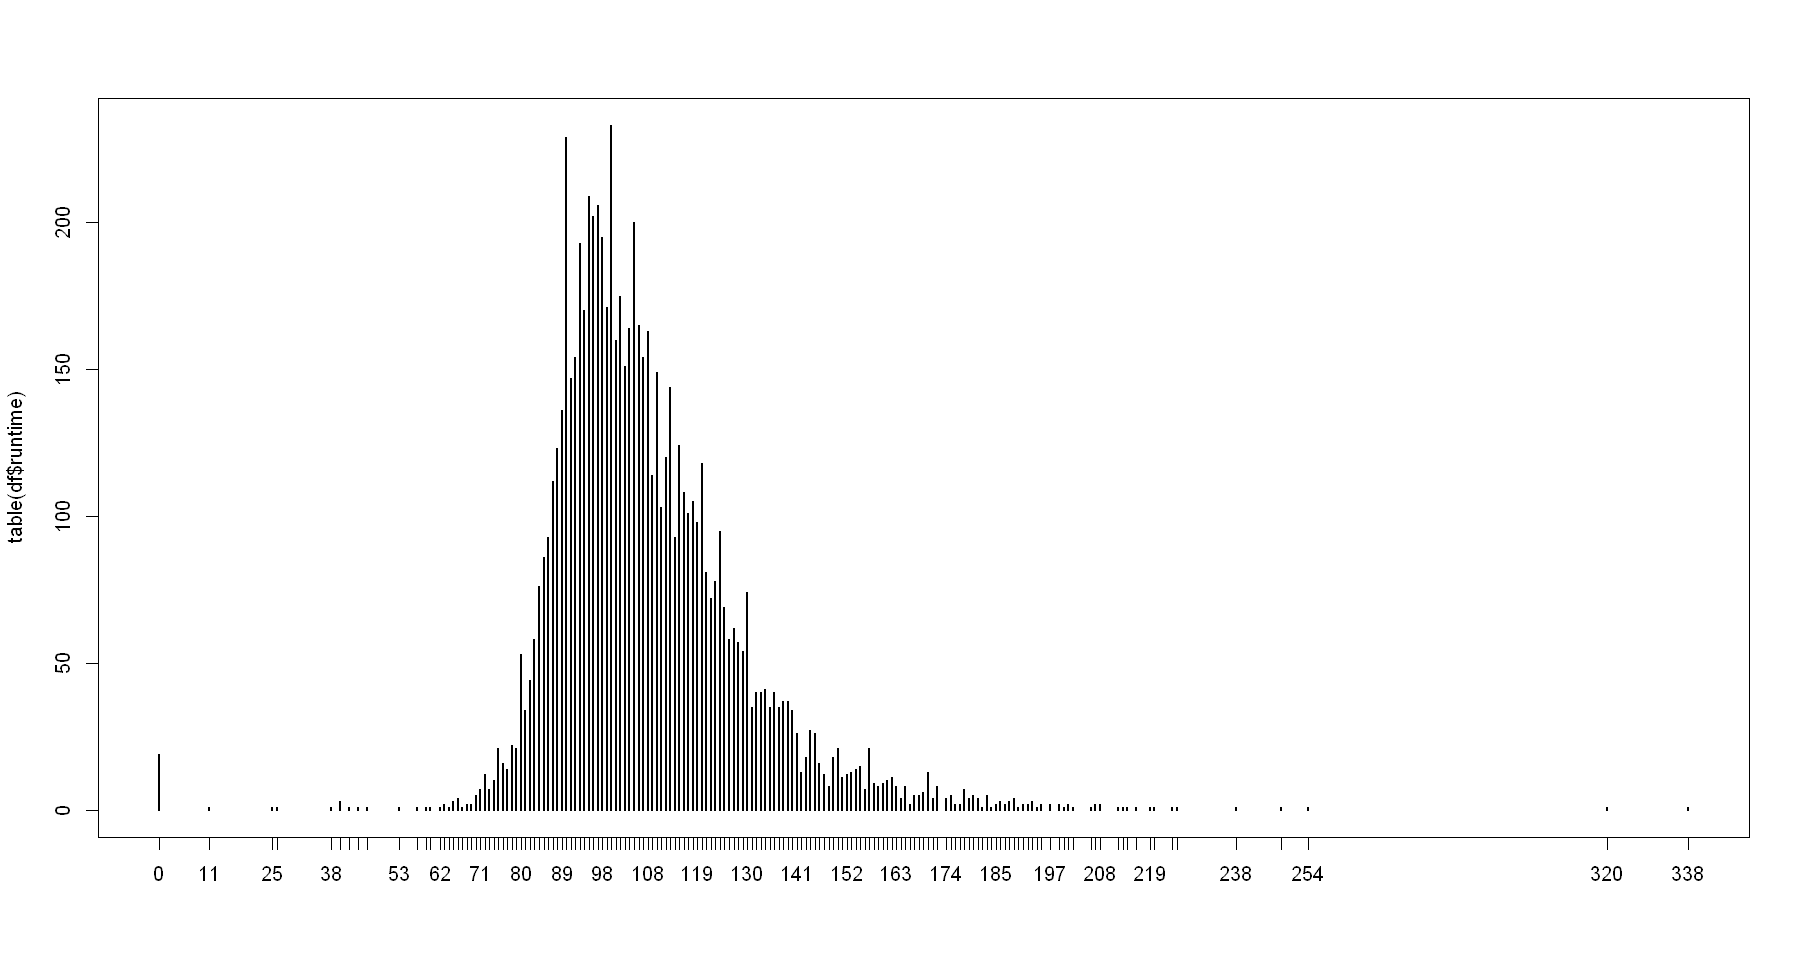

In [117]:
summary(df$runtime)
table(df$runtime)
plot(table(df$runtime))

In [119]:
df$runtime_cat <- factor(ifelse(df$runtime<94,1,ifelse(df$runtime>=118,3,2)),
                             levels=c(1,2,3),labels=c("Short","medium","large"))
summary(df$runtime_cat)

Short medium  large   NA's 
  1722   3774   1874      5

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
1.000e+00 2.405e+06 1.693e+07 6.688e+07 6.906e+07 1.520e+09      4382 

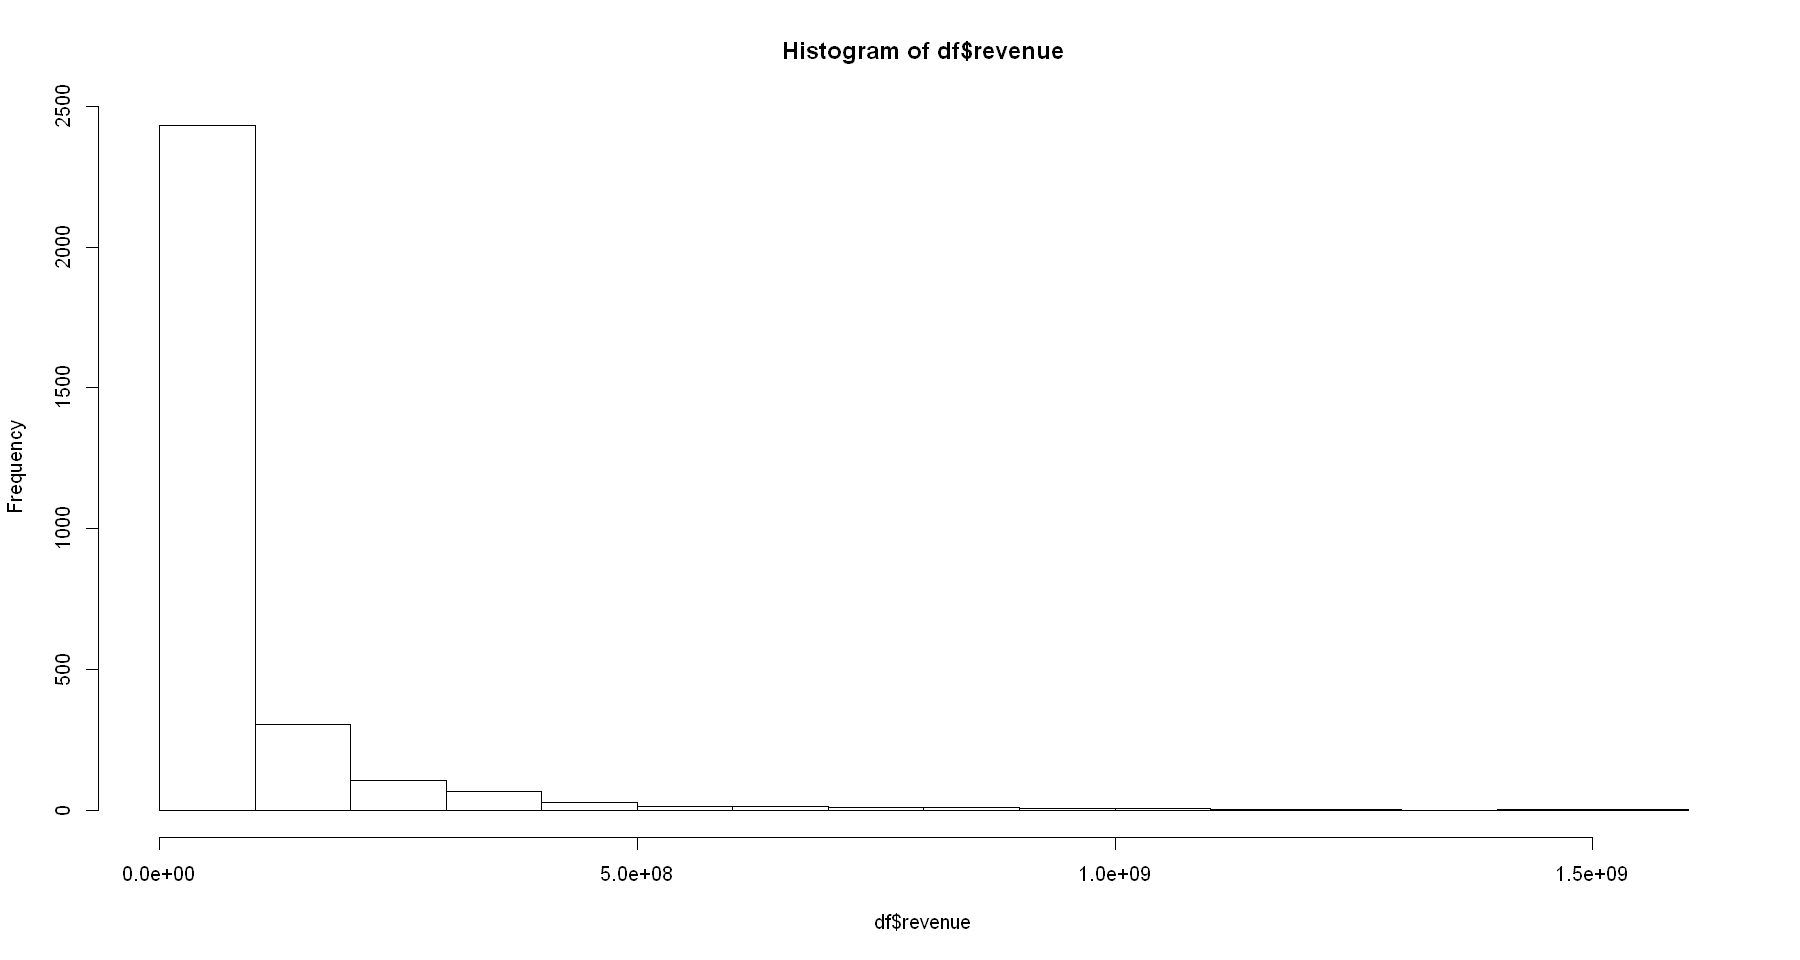

In [121]:
summary(df$revenue)
hist(df$revenue)

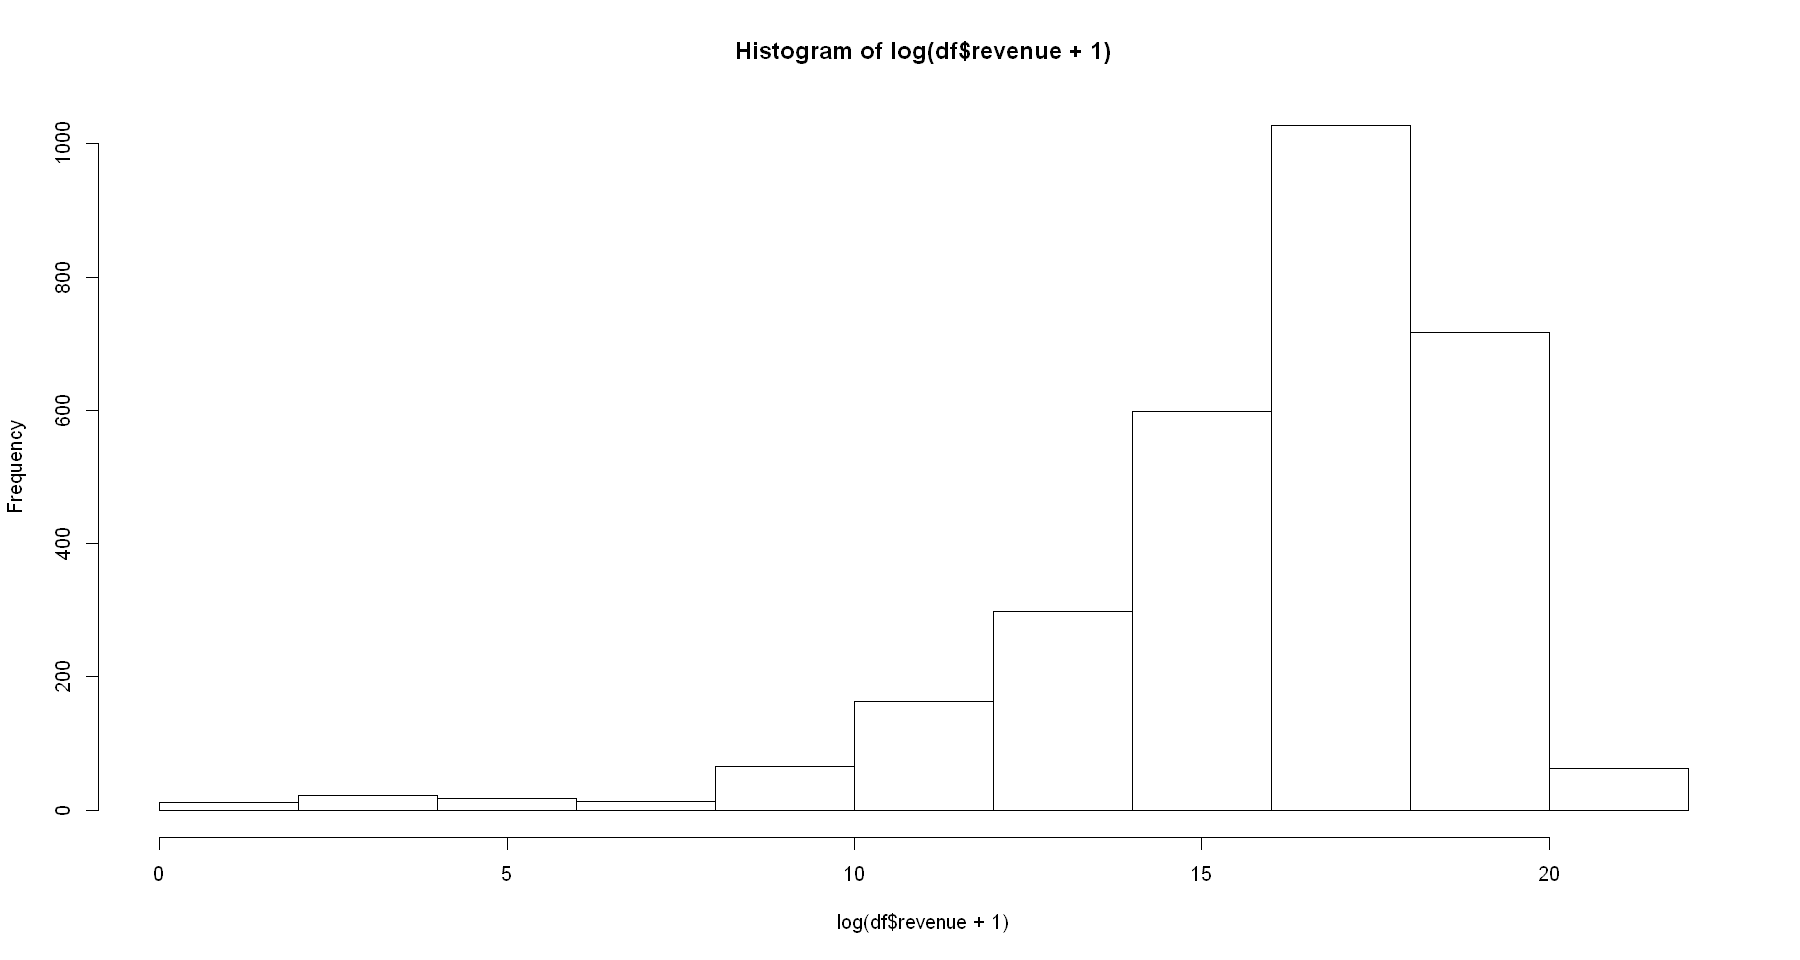

In [122]:
hist(log(df$revenue+1))

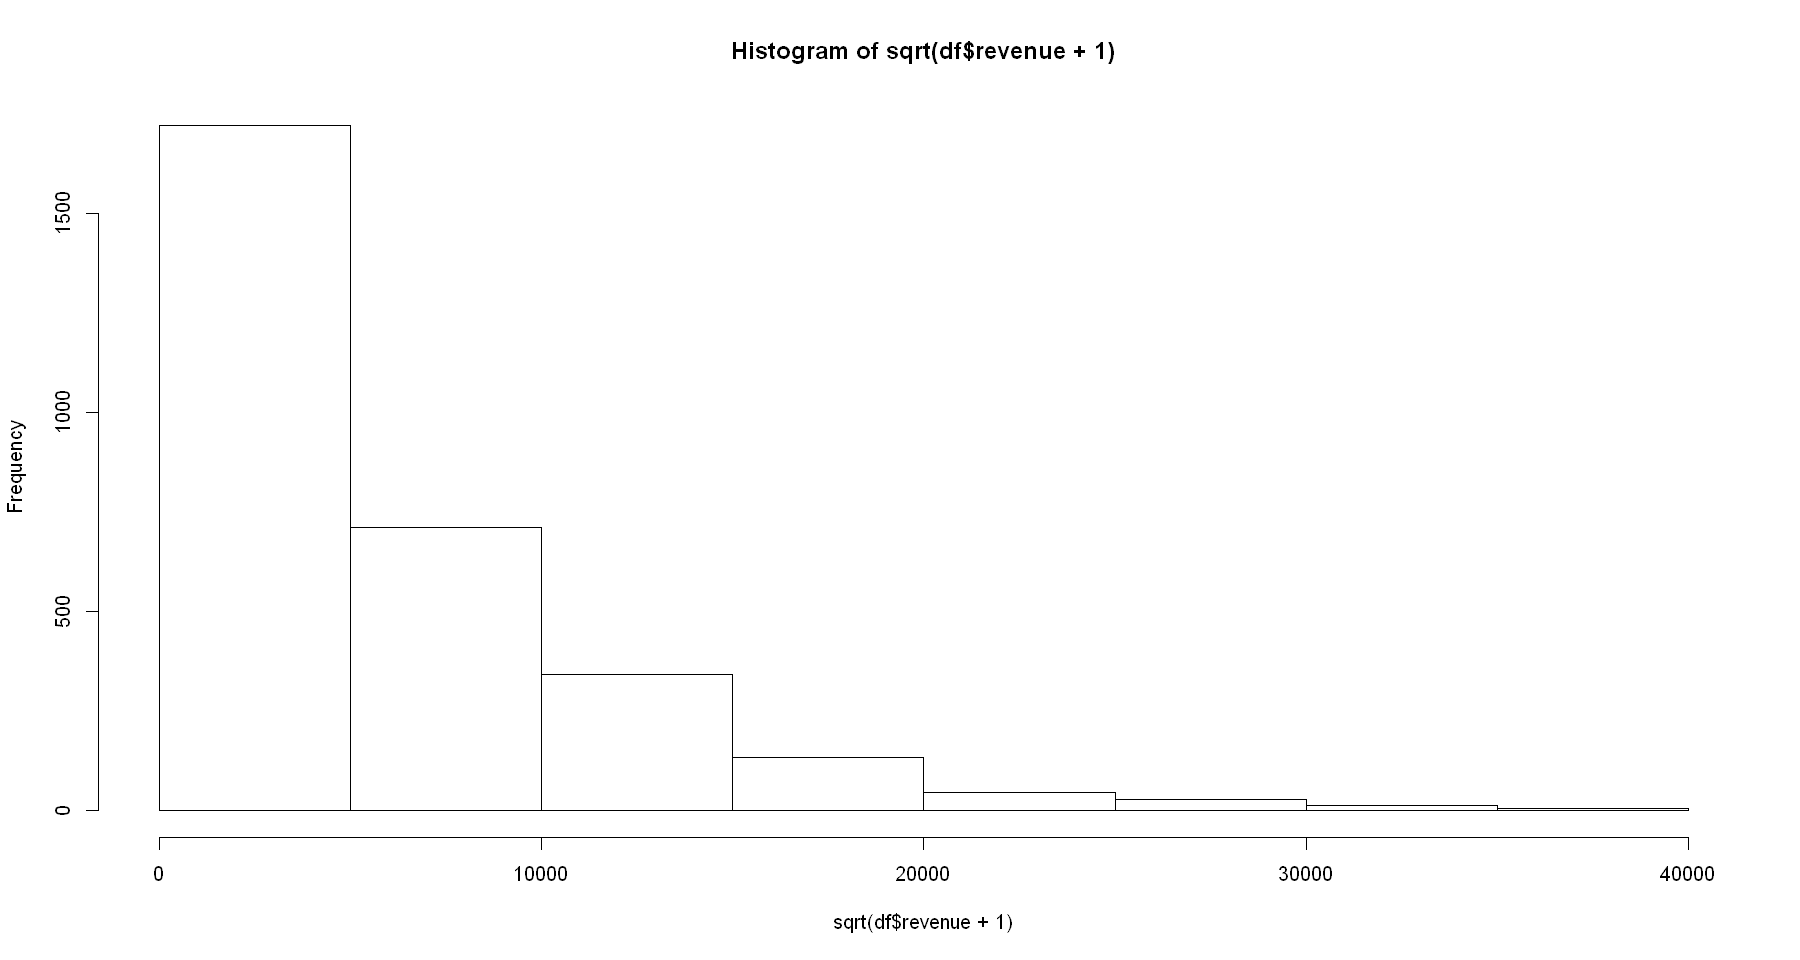

In [123]:
hist(sqrt(df$revenue+1))

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
        0         0   8000000  22666657  29000000 380000000 

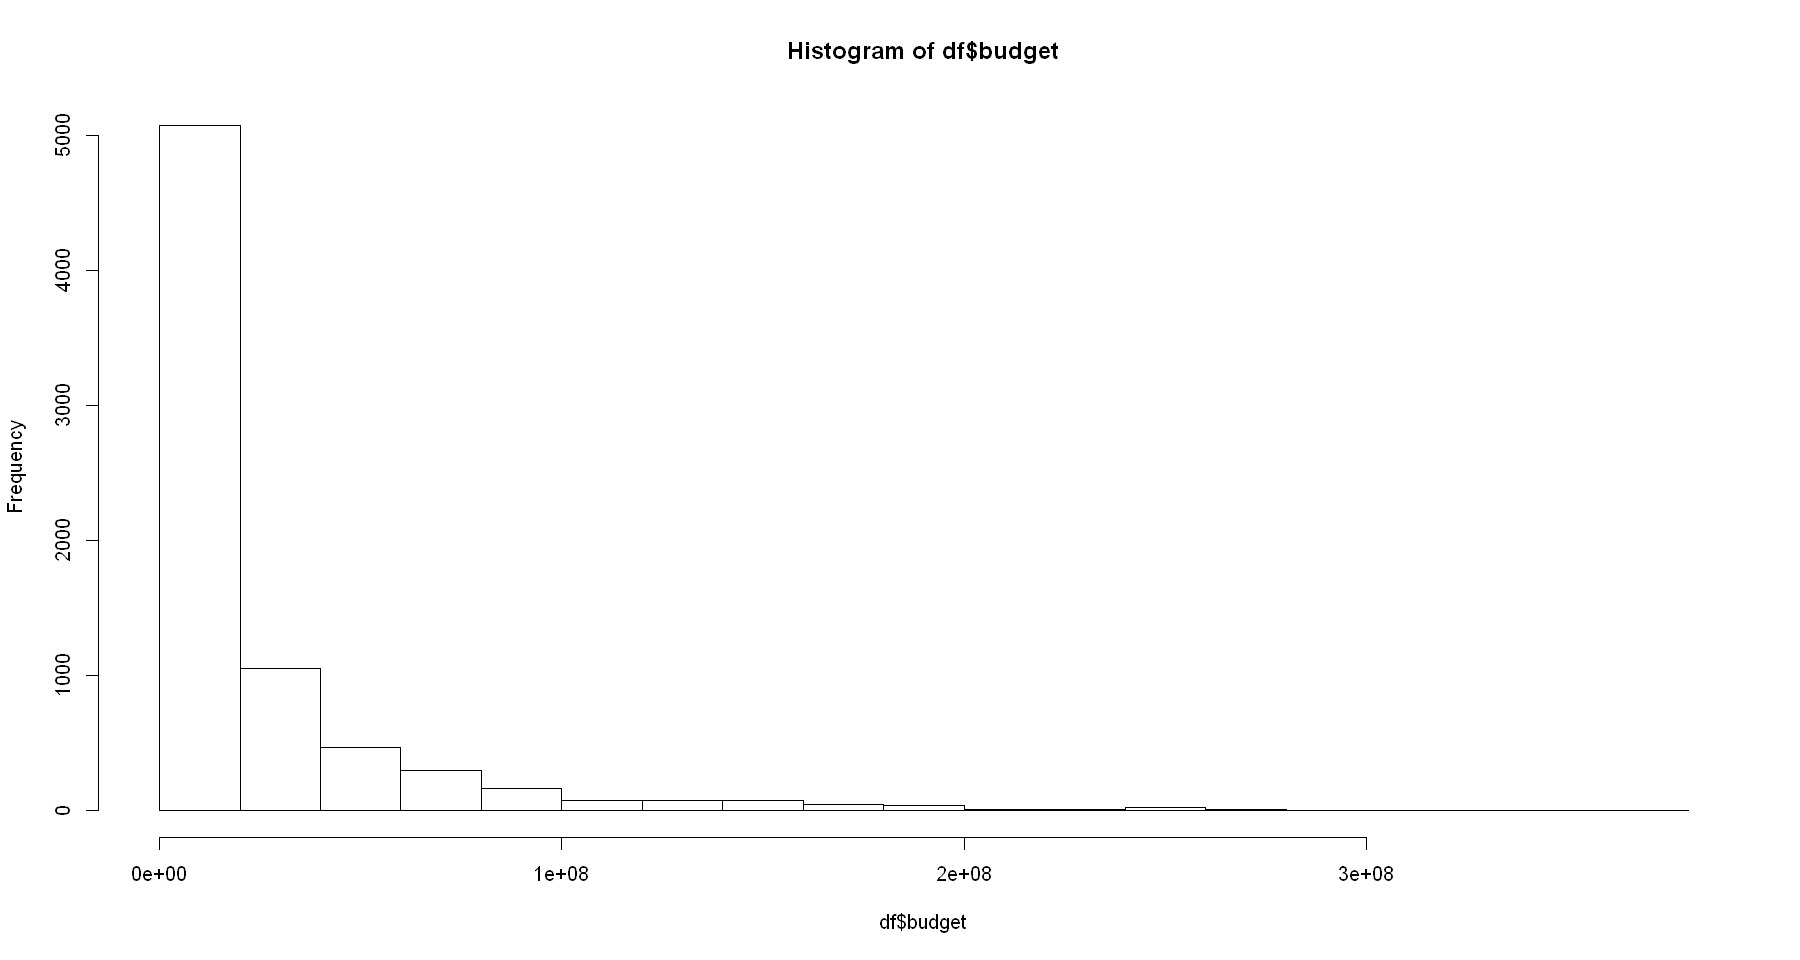

In [124]:
summary(df$budget)
hist(df$budget)

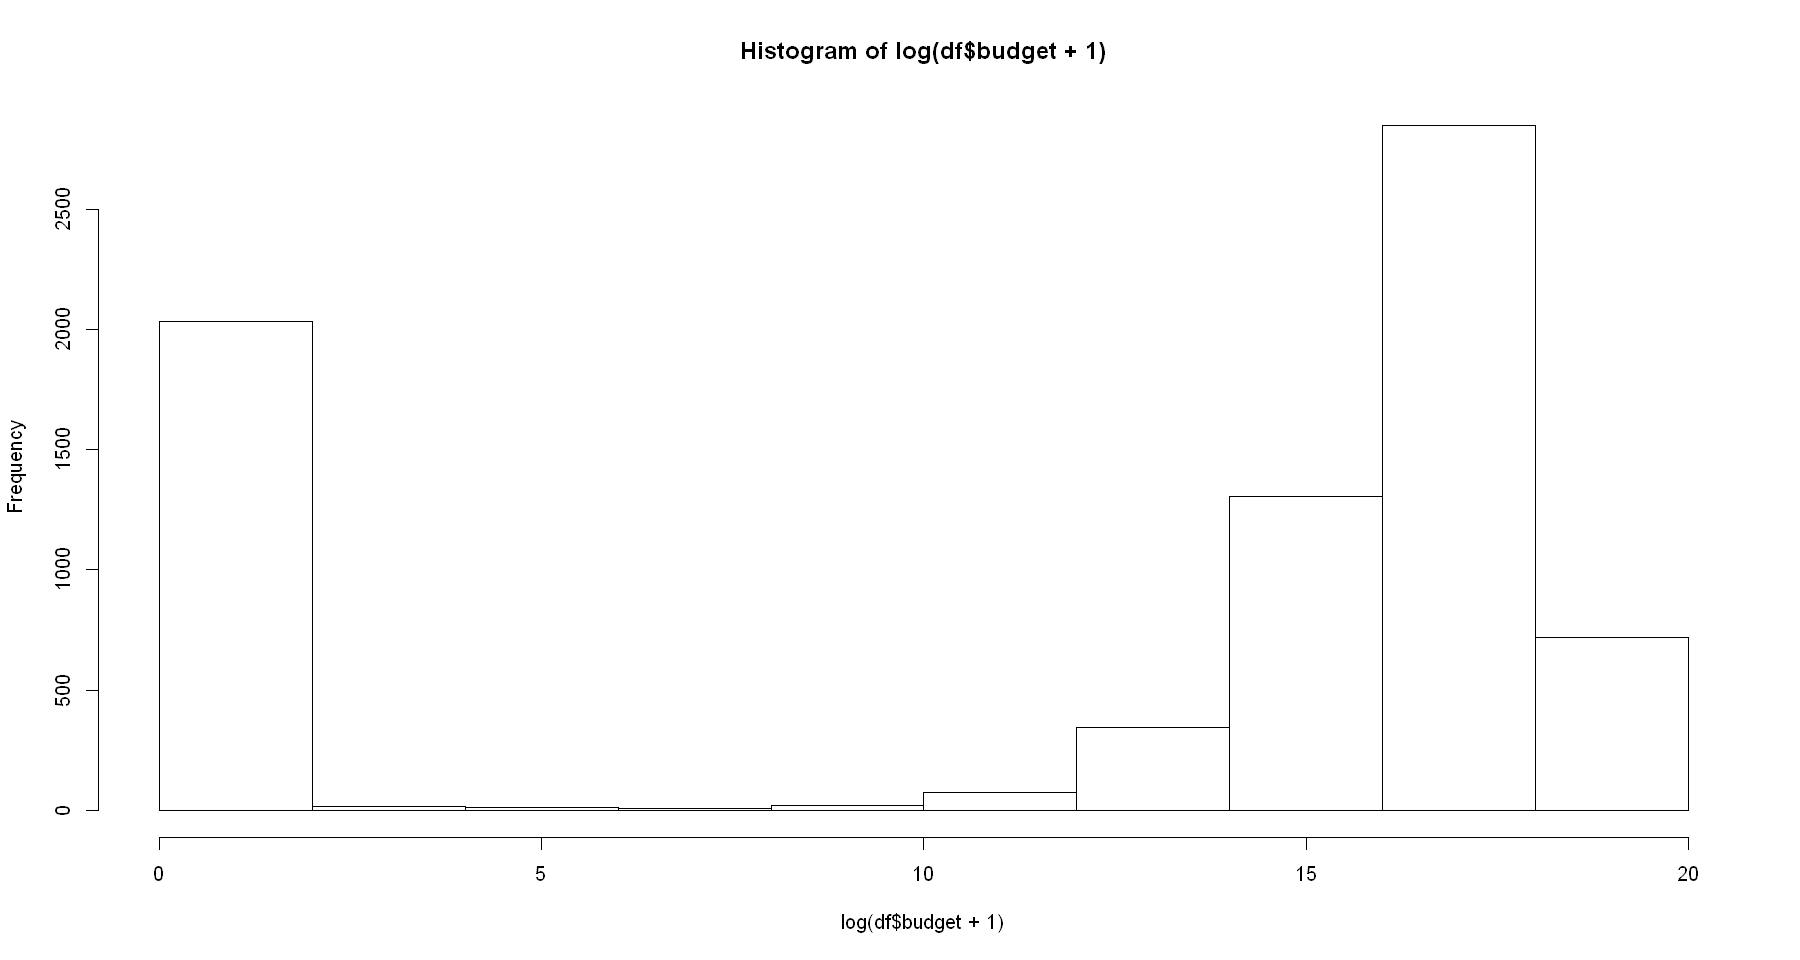

In [125]:
hist(log(df$budget+1))

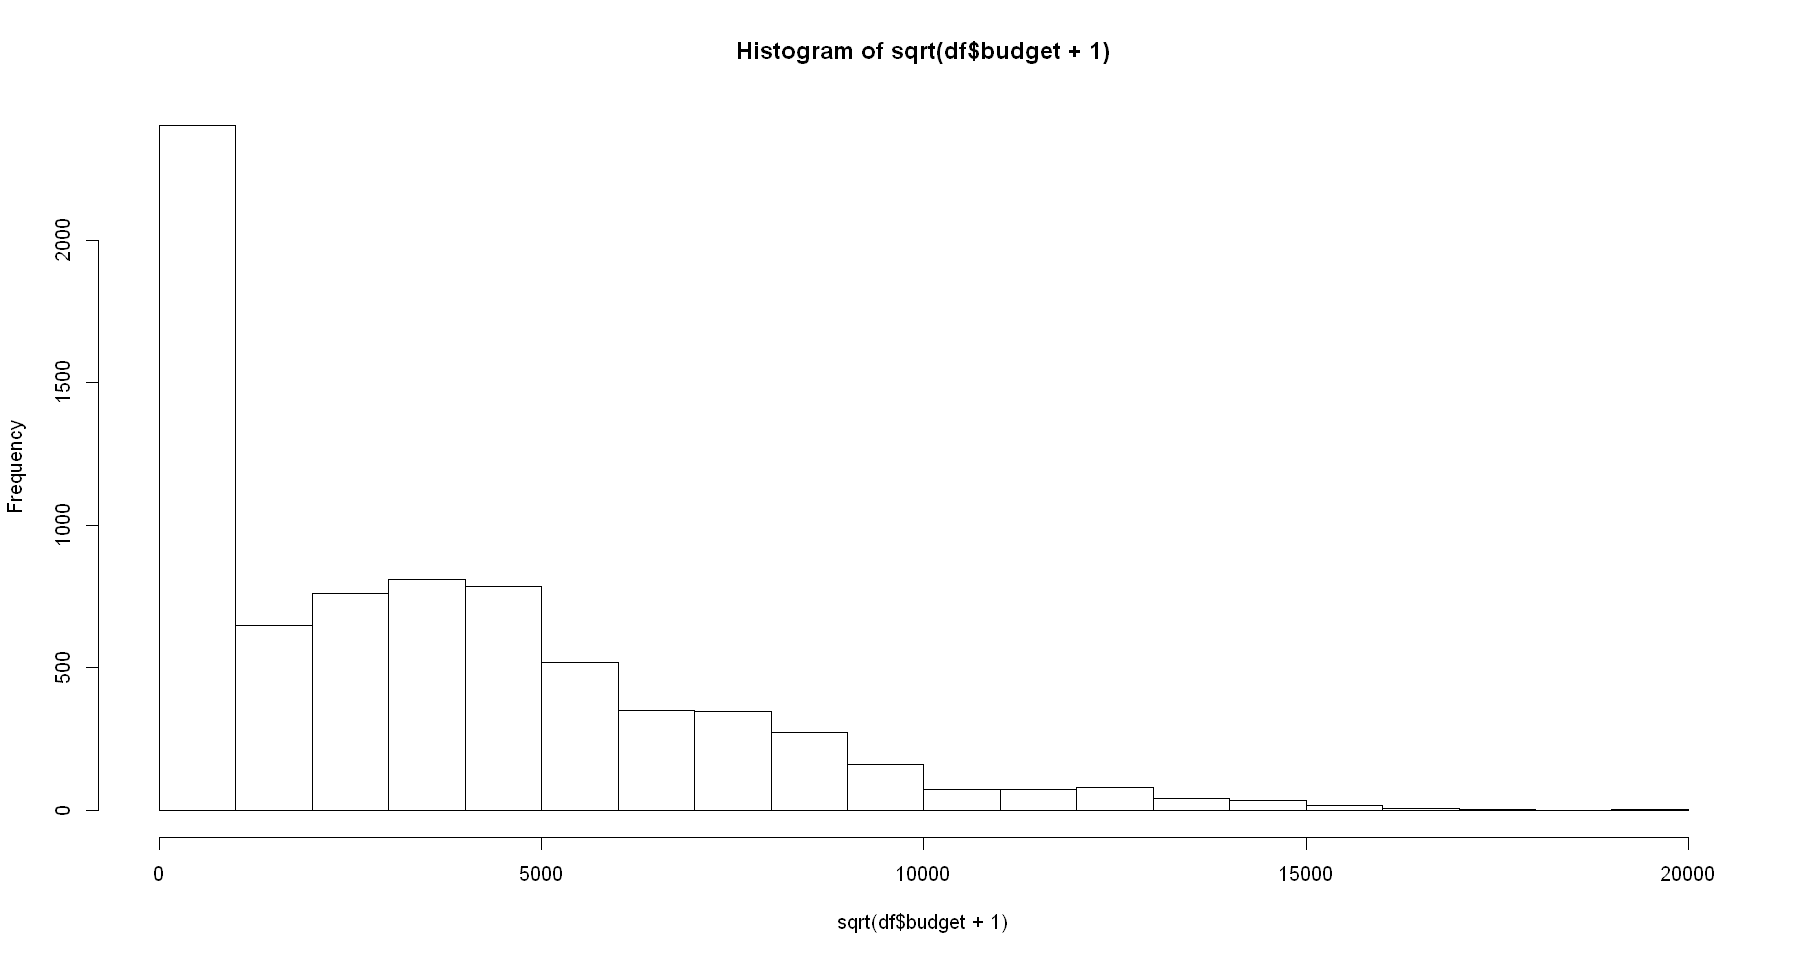

In [126]:
hist(sqrt(df$budget+1))

# Data Cleansing

### Outliers
 
We use the results from the exploreData report to take desicions on the outliers  

In [131]:
outlierMatrix <- function(data,threshold=1.5) {
    vn <- names(data)
    outdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        if(is.numeric(data[[v]])) {
            outlow <- quantile(data[[v]],probs = 0.25,na.rm = T) 
            outhigh <- quantile(data[[v]],probs = 0.75, na.rm = T)
            irq_level <- (outhigh - outlow) * threshold
            outlow <- outlow - irq_level
            outhigh <- outhigh +  irq_level
            mv <- ifelse(data[[v]] < outlow | data[[v]] > outhigh, 1, 0)
            outdata[v] <- mv
        } else {
            mv <- rep(0,nrow(data))
        }
    }
    outdata$row1 <- NULL
    return(outdata)
}


In [132]:
df_out <- outlierMatrix(df)
head(df_out)

movie_id,budget,popularity,runtime,revenue,sw_lang_en,sw_web_presence,sw_has_poster,release_year,release_month,high_release_month,release_day,producers_cnt,countries_cnt,actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,director_movies_cnt,cnt_genres,runtimecat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0
0,0,1,0,0,0,0,0,0,0,0,0,0,0,NA,NA,NA,0,0,0
0,0,0,0,0,1,0,0,0,0,0,0,NA,0,NA,NA,NA,0,0,1
0,0,0,0,0,1,0,0,0,0,0,0,NA,0,NA,NA,NA,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,NA,1,NA,NA,NA,0,0,1


#CORRELATION

In [133]:
library(corrplot)
corrplot(df, type = "upper", order = "hclust", 
         tl.col = "black", tl.srt = 45)

ERROR: Error in FUN(X[[i]], ...): only defined on a data frame with all numeric variables


In [134]:
table(df$revenue, df_out$popularity)
cor.test(as.numeric(df$revenue), df_out$popularity, method = "spearman")

            
              0  1
  1           4  0
  2           1  0
  3           3  0
  4           1  0
  5           1  0
  6           1  0
  7           1  0
  8           3  0
  10          2  0
  11          1  0
  12          2  0
  13          1  0
  15          1  0
  18          2  0
  20          1  0
  23          1  0
  25          3  0
  30          2  0
  32          1  0
  46          1  0
  60          1  0
  70          1  0
  79          1  0
  85          1  0
  88          1  0
  97          1  0
  100         2  0
  121         1  0
  125         1  0
  126         1  0
  135         1  0
  198         1  0
  204         1  0
  241         1  0
  306         1  0
  311         1  0
  404         1  0
  422         0  1
  500         1  0
  525         1  0
  641         1  0
  671         1  0
  923         1  0
  1404        1  0
  1469        1  0
  1938        1  0
  2303        1  0
  2340        1  0
  2970        1  0
  3003        1  0
  3358        1  0

Warning message in cor.test.default(as.numeric(df$revenue), df_out$popularity, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  as.numeric(df$revenue) and df_out$popularity
S = 3569641537, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2011674 


### Missing Values

In [158]:
missingMatrix <- function(data) {
    vn <- names(data)
    missdata <- data.frame(row1=1:nrow(data))
    for(v in vn) {
        mv <- ifelse(is.na(data[[v]]),1,0)
        missdata[v] <- mv
    }
    missdata$row1 <- NULL
    return(missdata)
}

getMissingness <- function (data, getRows = FALSE) {
    require(dplyr)
    l <- nrow(data)
    vn <- names(data)
    nadf <- data
    cnt <- NULL
    miss <- function(x) return(sum(is.na(x)))
    for (n in vn) {
        nadf[[n]] <- ifelse(is.na(nadf[[n]]) == T, 1, 0)
        cnt <- rbind(cnt, data.frame(n, sum(nadf[[n]])))
    }
    names(cnt) <- c("var", "na.count")
    cnt$rate <- round((cnt$na.count/nrow(nadf)) * 100, 1)
    nadf$na.cnt <- 0
    nadf$na.cnt <- rowSums(nadf)
    cnt <- cnt %>% dplyr::arrange(desc(na.count)) %>% dplyr::filter(na.count > 
        0)
    totmiss <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::tally()
    idx <- NULL
    msg <- (paste("This dataset has ", as.character(totmiss), 
        " (", as.character(round(totmiss/nrow(data) * 100, 1)), 
        "%)", " complete rows. Original data has ", nrow(data), 
        " rows.", sep = ""))
    if (getRows == TRUE & totmiss != 0) {
        nadf$rn <- seq_len(nrow(data))
        idx <- nadf %>% dplyr::filter(na.cnt == 0) %>% dplyr::select(rn)
    }
    print(list(head(cnt, n = 10), msg))
    return(list(missingness = cnt, message = msg, rows = idx$rn))
}

In [159]:
mm <- getMissingness(data = df)

[[1]]
                   var na.count  rate
1  actor0_prev_revenue     7375 100.0
2  actor1_prev_revenue     7375 100.0
3  actor2_prev_revenue     7375 100.0
4              revenue     4382  59.4
5        producers_cnt      395   5.4
6              runtime        5   0.1
7          runtime_cat        5   0.1
8         release_year        1   0.0
9        release_month        1   0.0
10         release_day        1   0.0

[[2]]
[1] "This dataset has 0 (0%) complete rows. Original data has 7375 rows."



In [160]:
mm$missingness

var,na.count,rate
actor0_prev_revenue,7375,100.0
actor1_prev_revenue,7375,100.0
actor2_prev_revenue,7375,100.0
revenue,4382,59.4
producers_cnt,395,5.4
runtime,5,0.1
runtime_cat,5,0.1
release_year,1,0.0
release_month,1,0.0
release_day,1,0.0


In [162]:
mm$missingness$var

[1] actor0_prev_revenue actor1_prev_revenue actor2_prev_revenue
 [4] revenue             producers_cnt       runtime            
 [7] runtime_cat         release_year        release_month      
[10] release_day        
29 Levels: movie_id budget original_language popularity runtime ... orig_lang2

In [163]:
#generate a missing matrix
df_na <- missingMatrix(df)

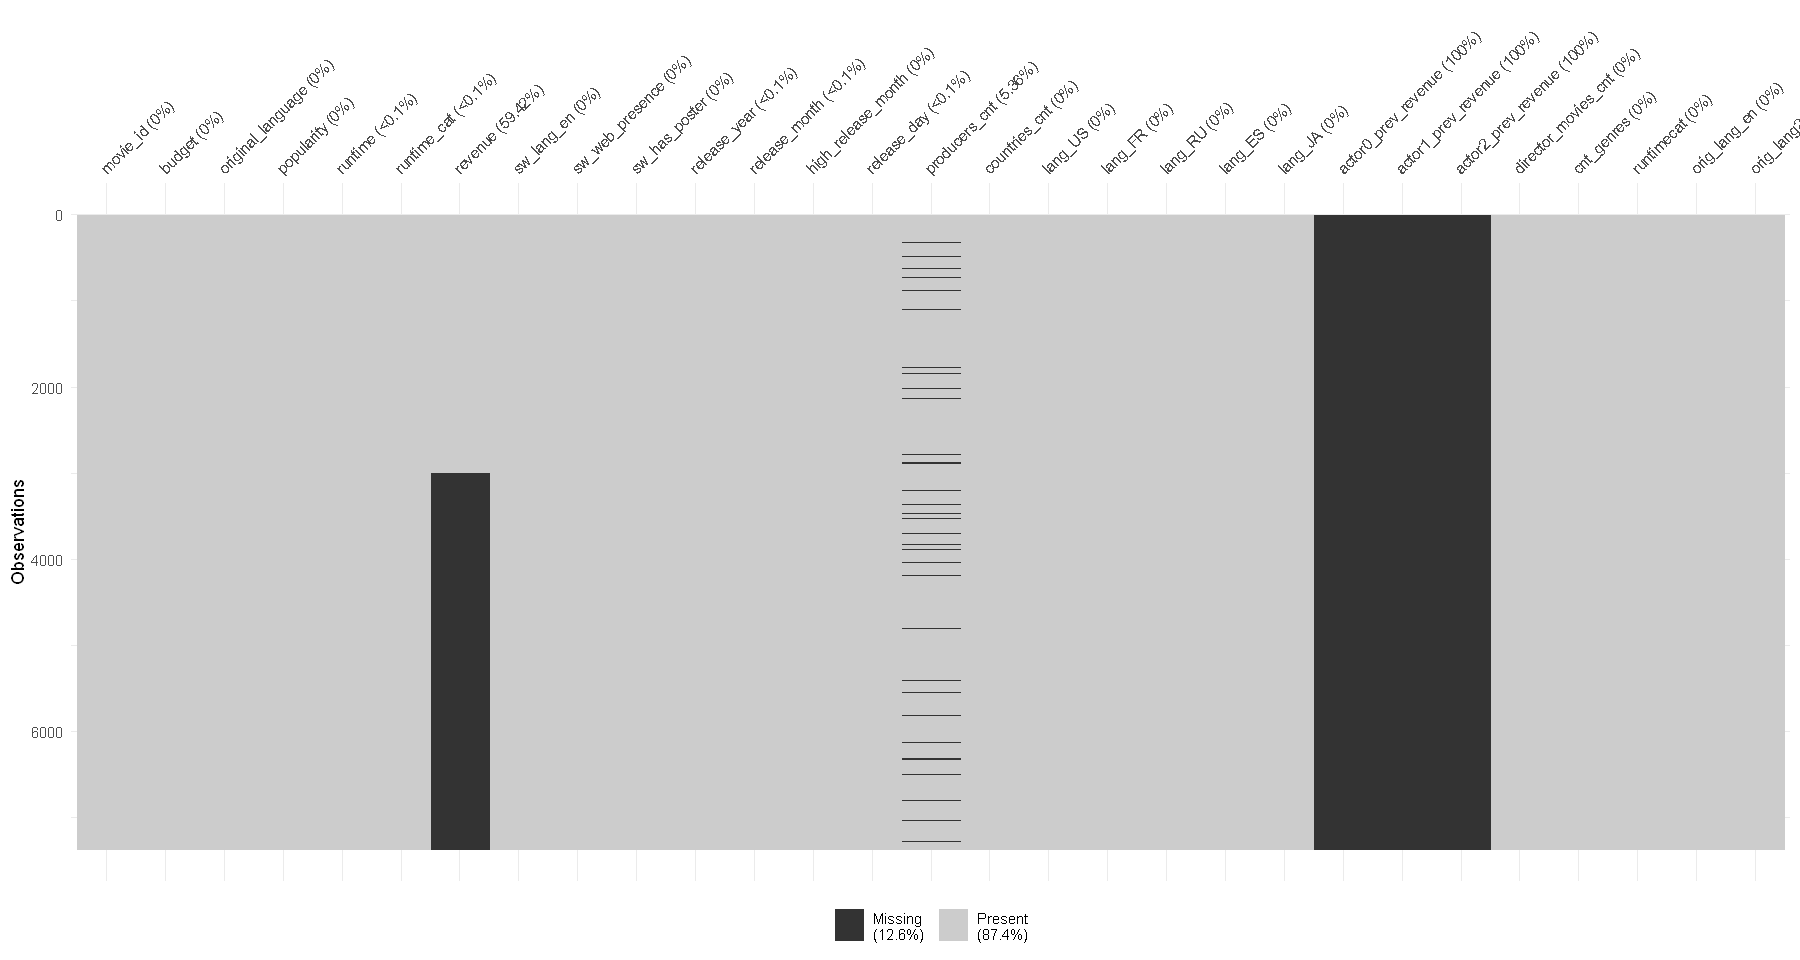

In [140]:
library(naniar)
options(repr.plot.width = 15, repr.plot.height = 8)
vis_miss(df,warn_large_data=F)

We can check if there is any correlation between the missing values by making a correlation matrix for the missingness (missing matrix)

In [164]:
df_na <- df_na[,mm$missingness$var]
head(df_na)

actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,revenue,producers_cnt,runtime,runtime_cat,release_year,release_month,release_day
1,1,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0
1,1,1,0,1,0,0,0,0,0


Additionally, we can check for the correlation between the missing indicators. This can show variables that have similar patterns of missingness.

In [165]:
#install.packages("corrgram")
library(corrgram)
corrgram(df_na, order=TRUE, lower.panel=panel.shade,
  upper.panel=panel.pie, text.panel=panel.txt,
  main="Missingness correlation")

Warning message in cor(x, use = "pairwise.complete.obs", method = cor.method):
"the standard deviation is zero"

ERROR: Error in eigen(cmat): infinite or missing values in 'x'



Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 

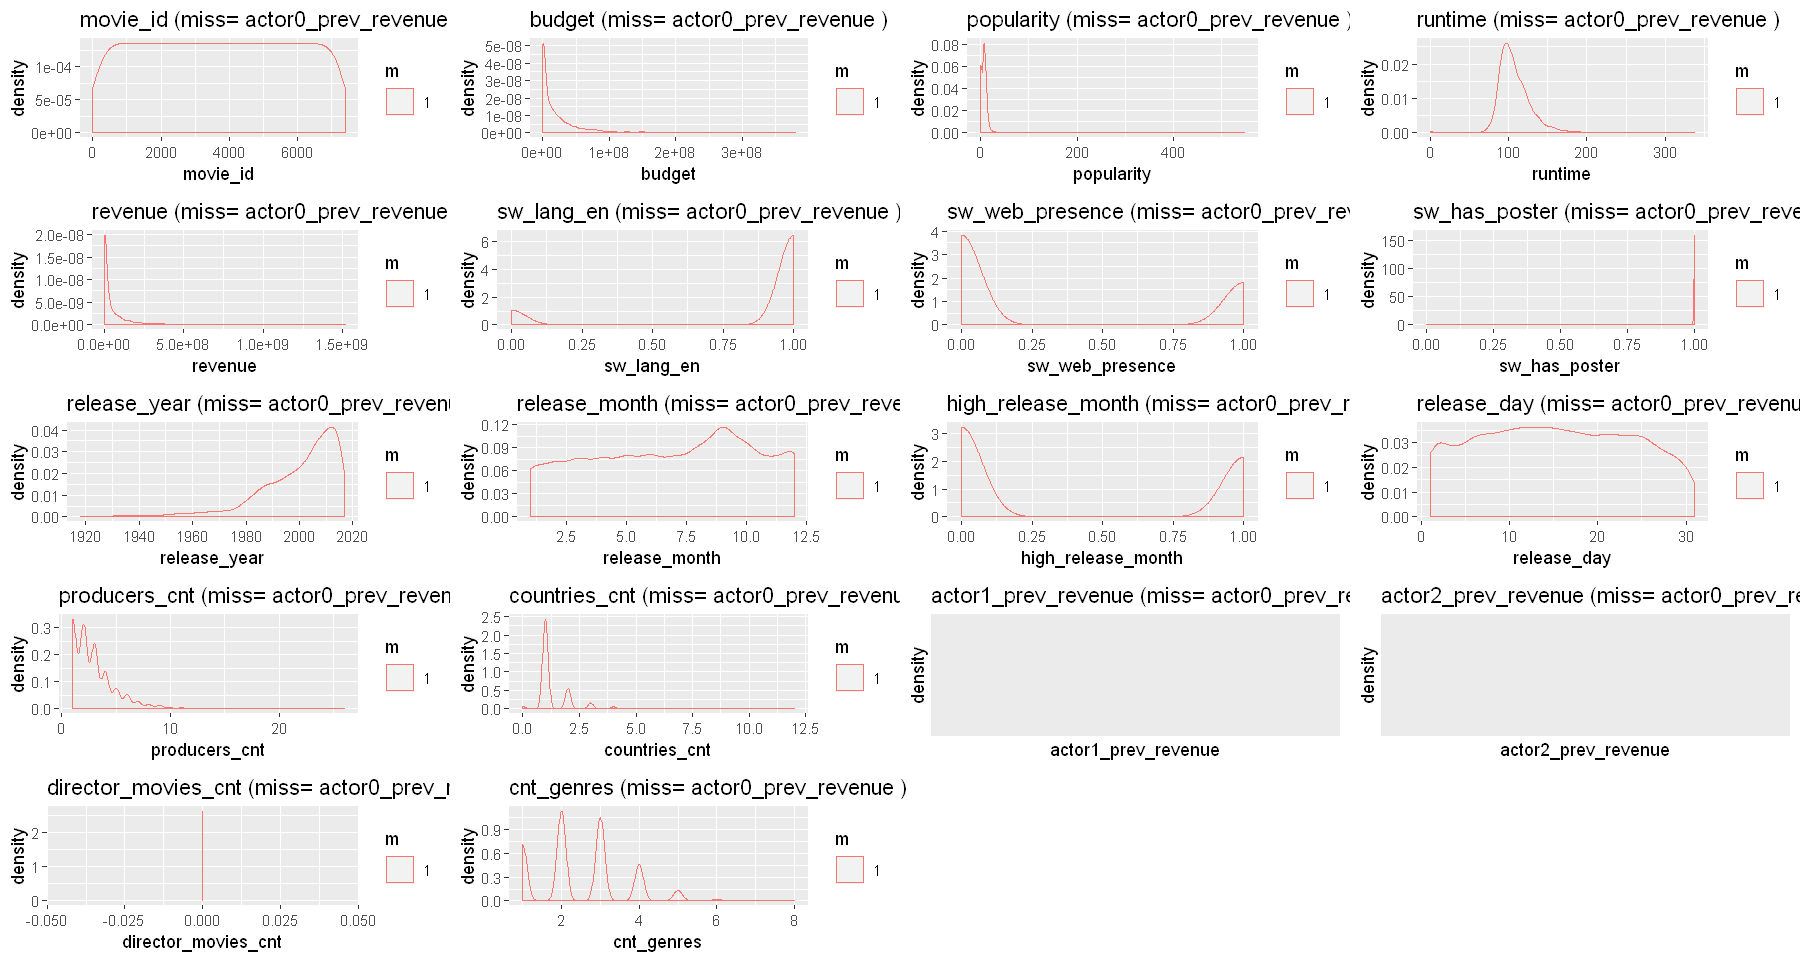

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."

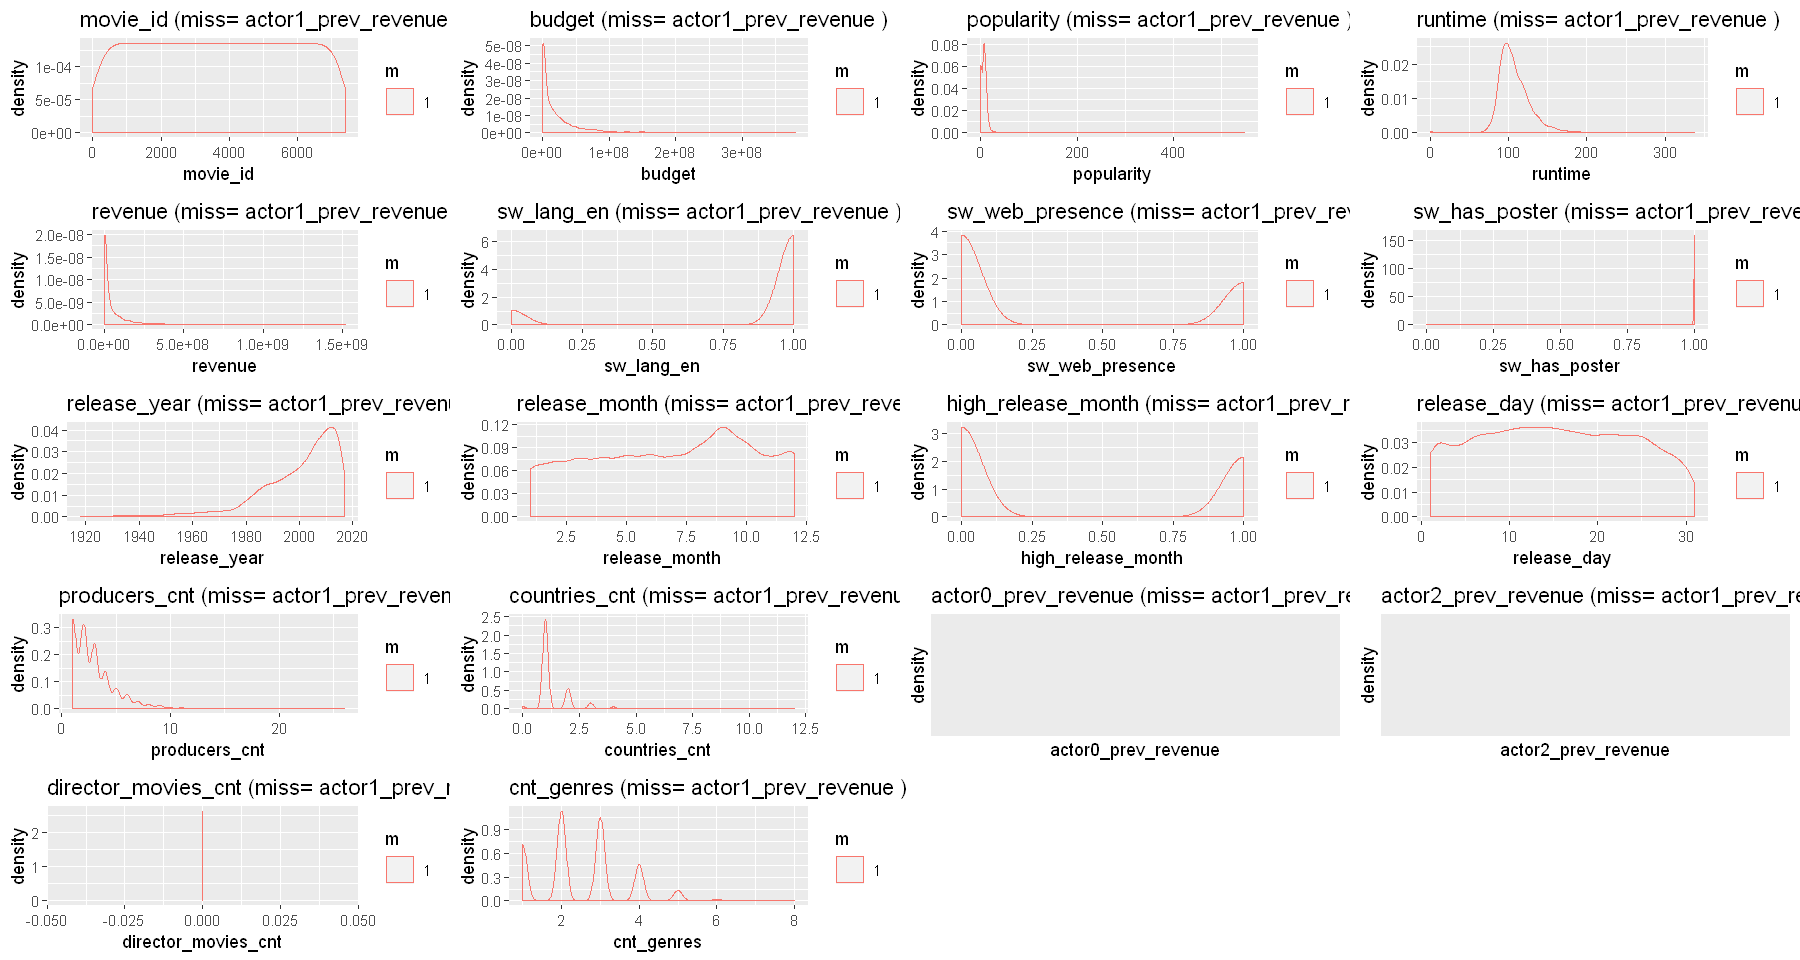

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."

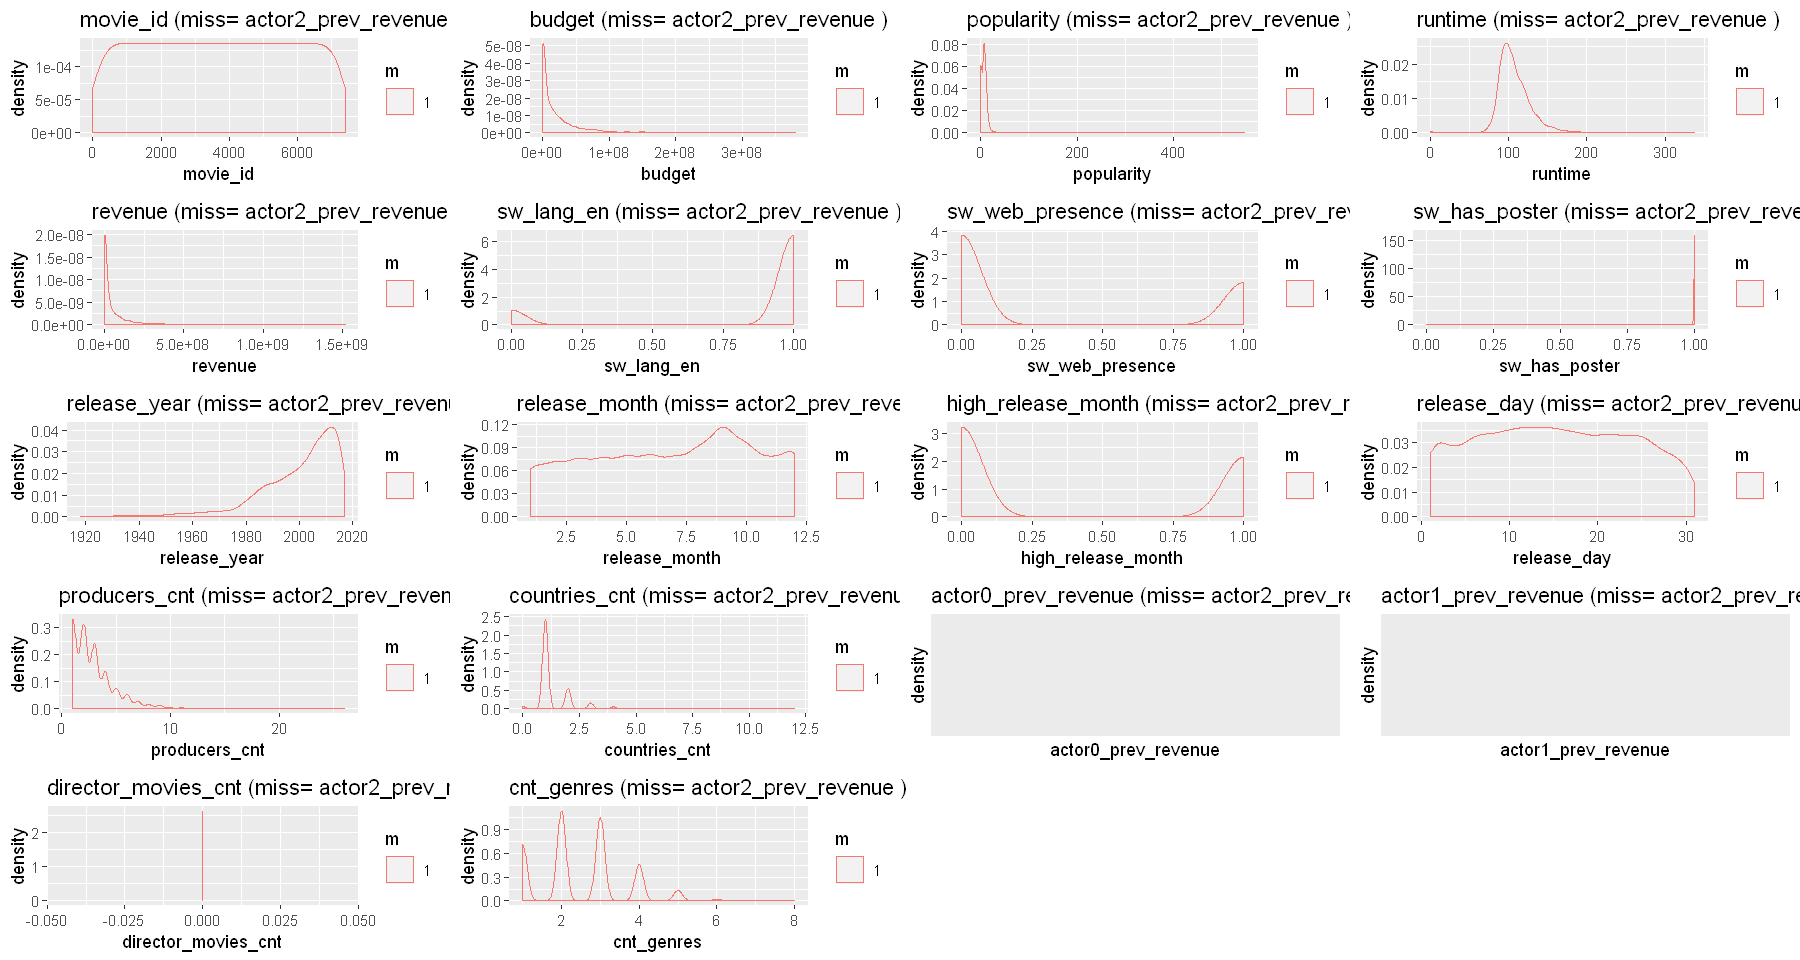

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."

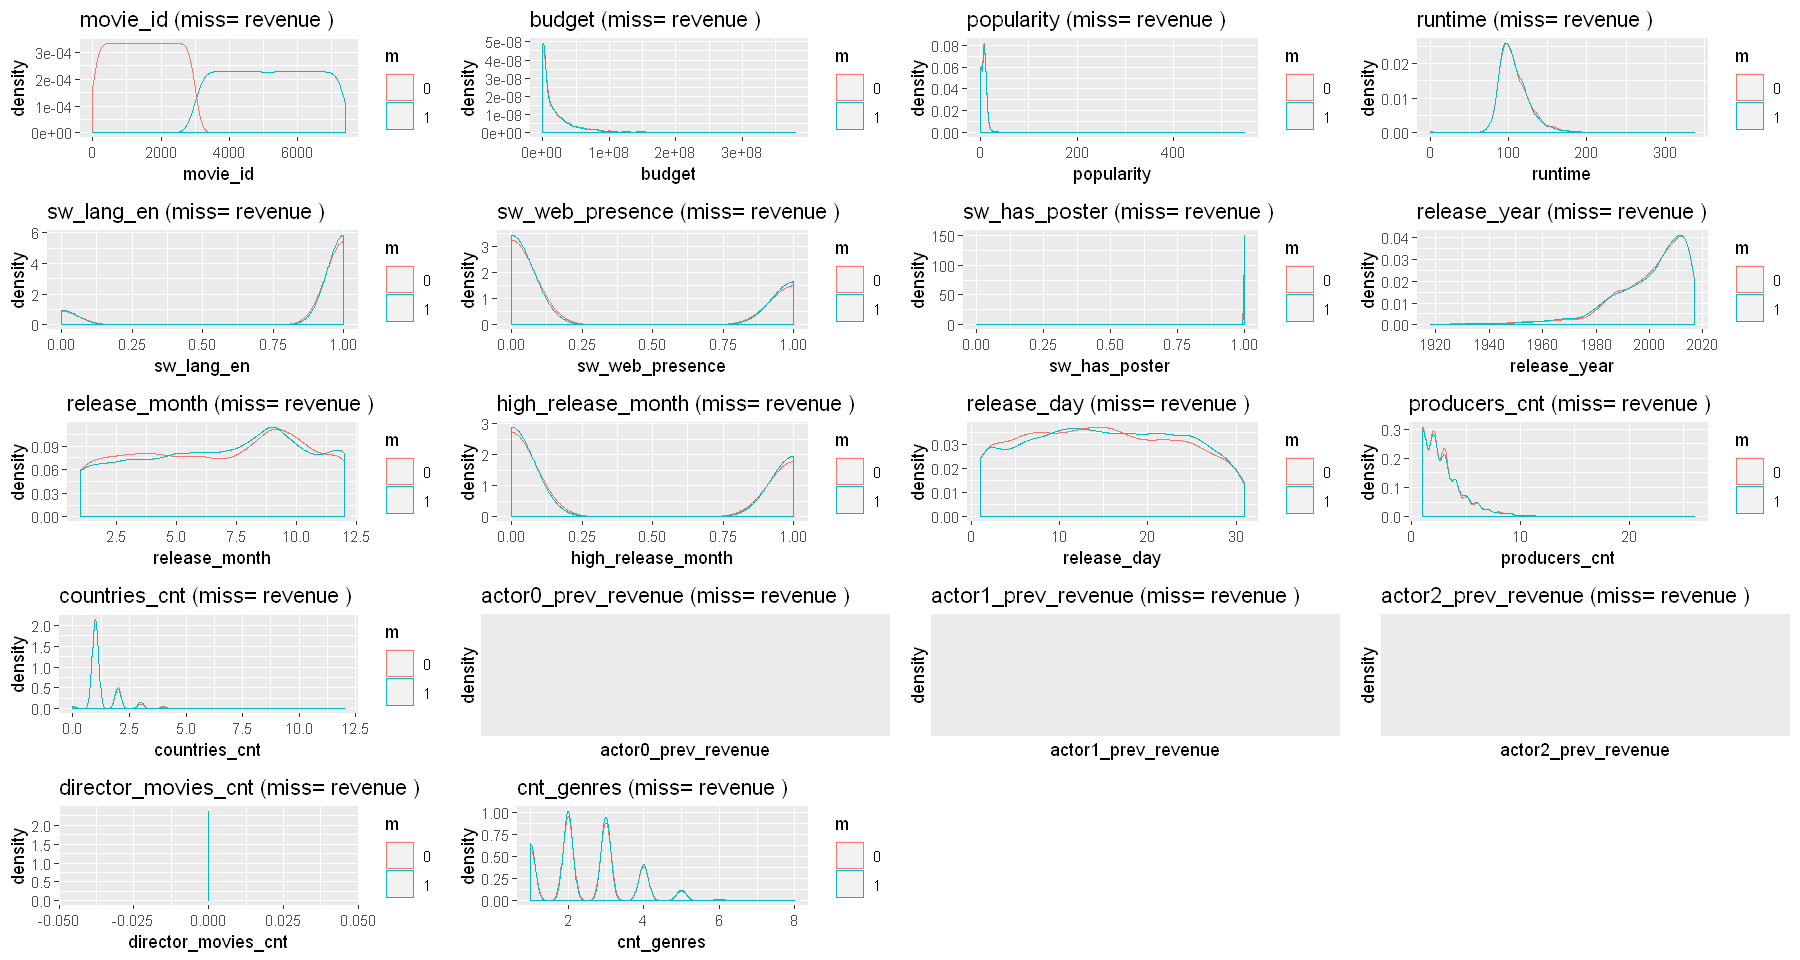

Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."

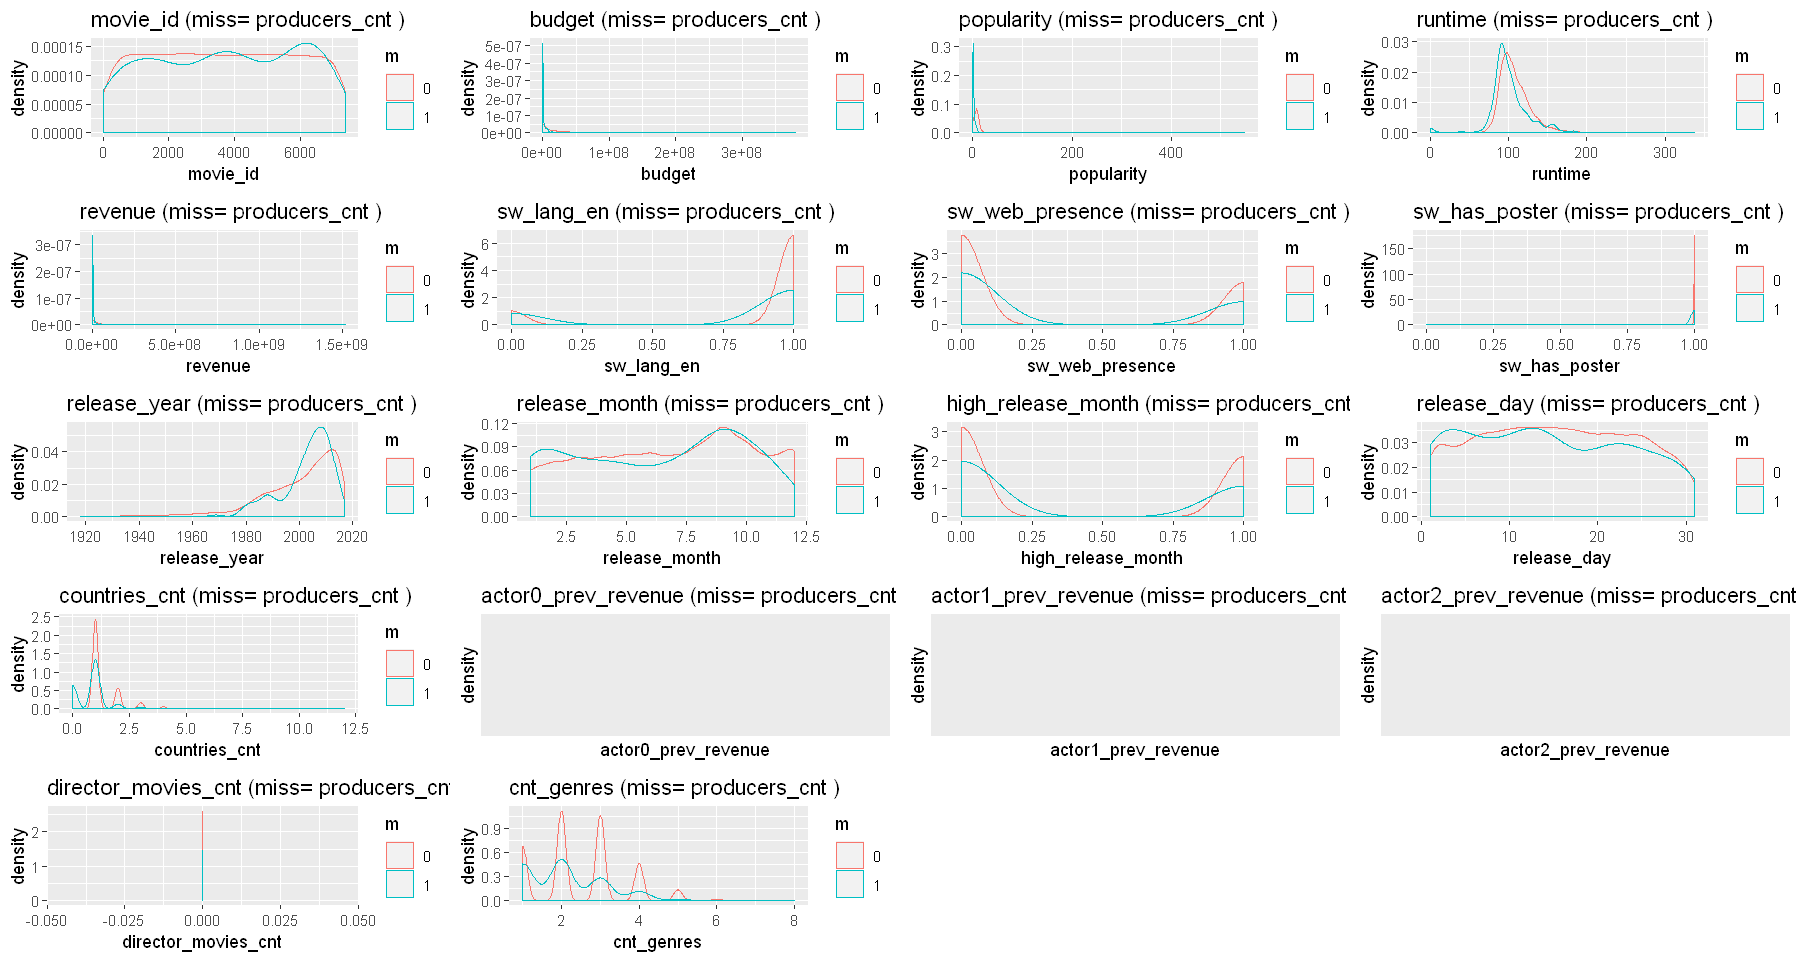

Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."Warning message:
"Removed 7375 rows containing non-finite values (stat_density)."

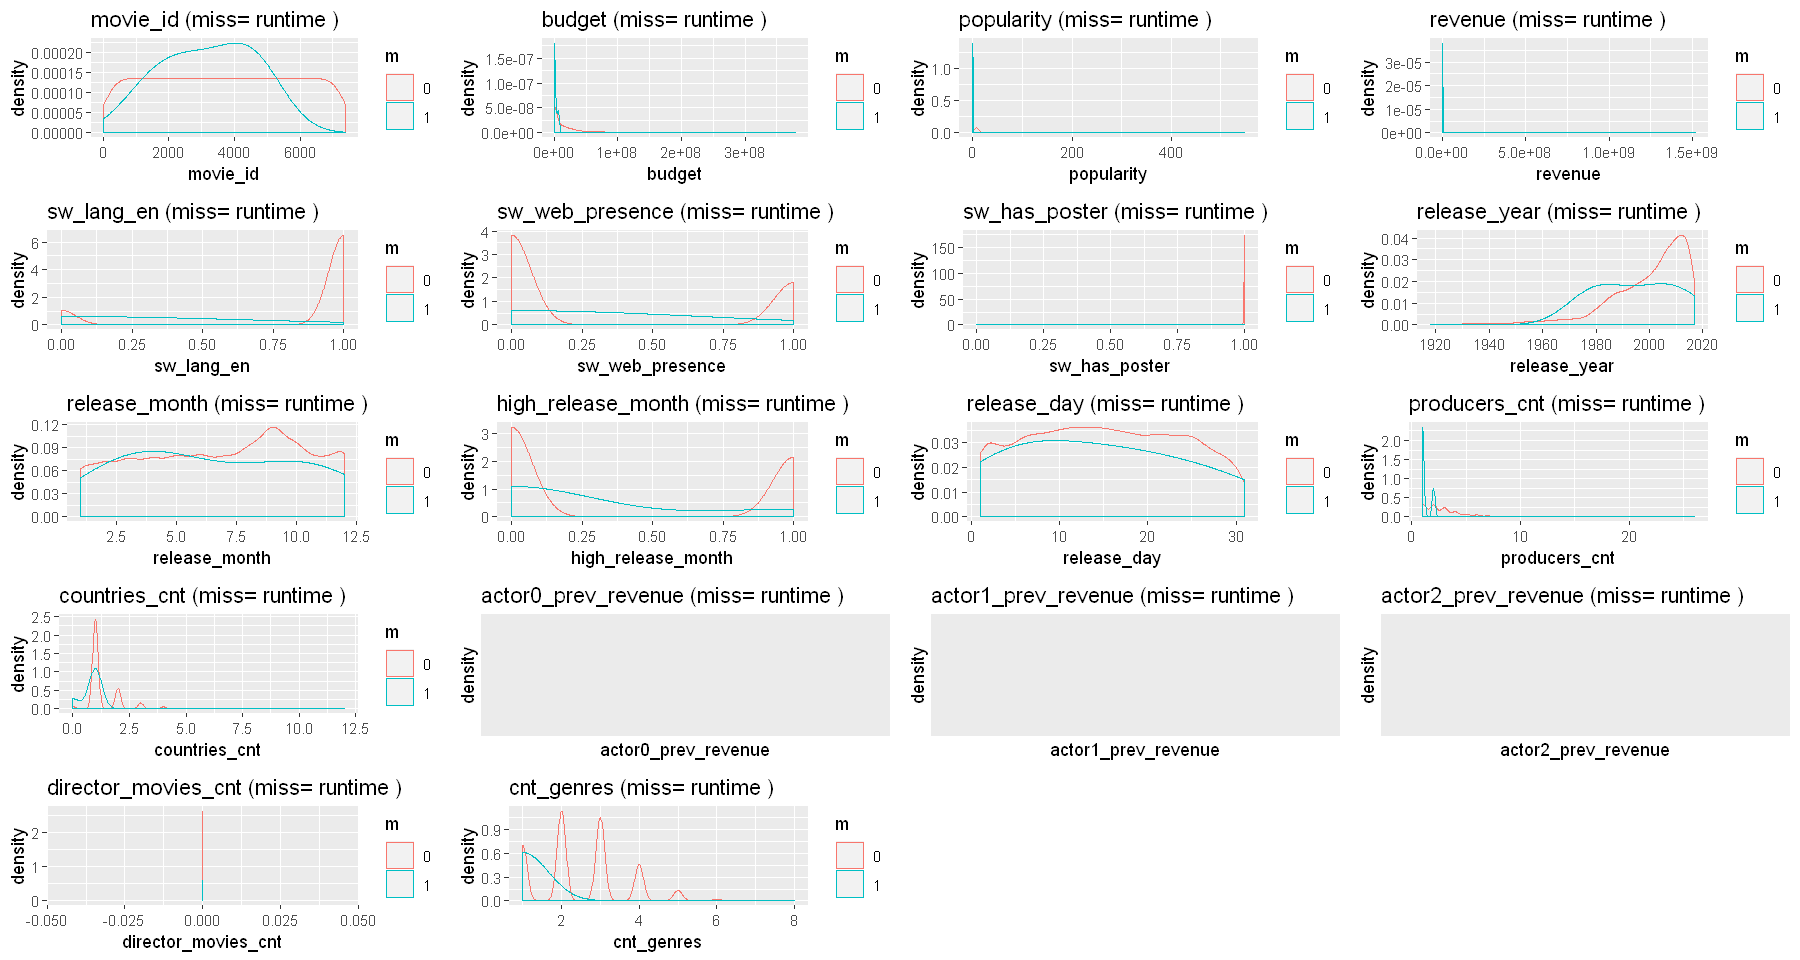

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density

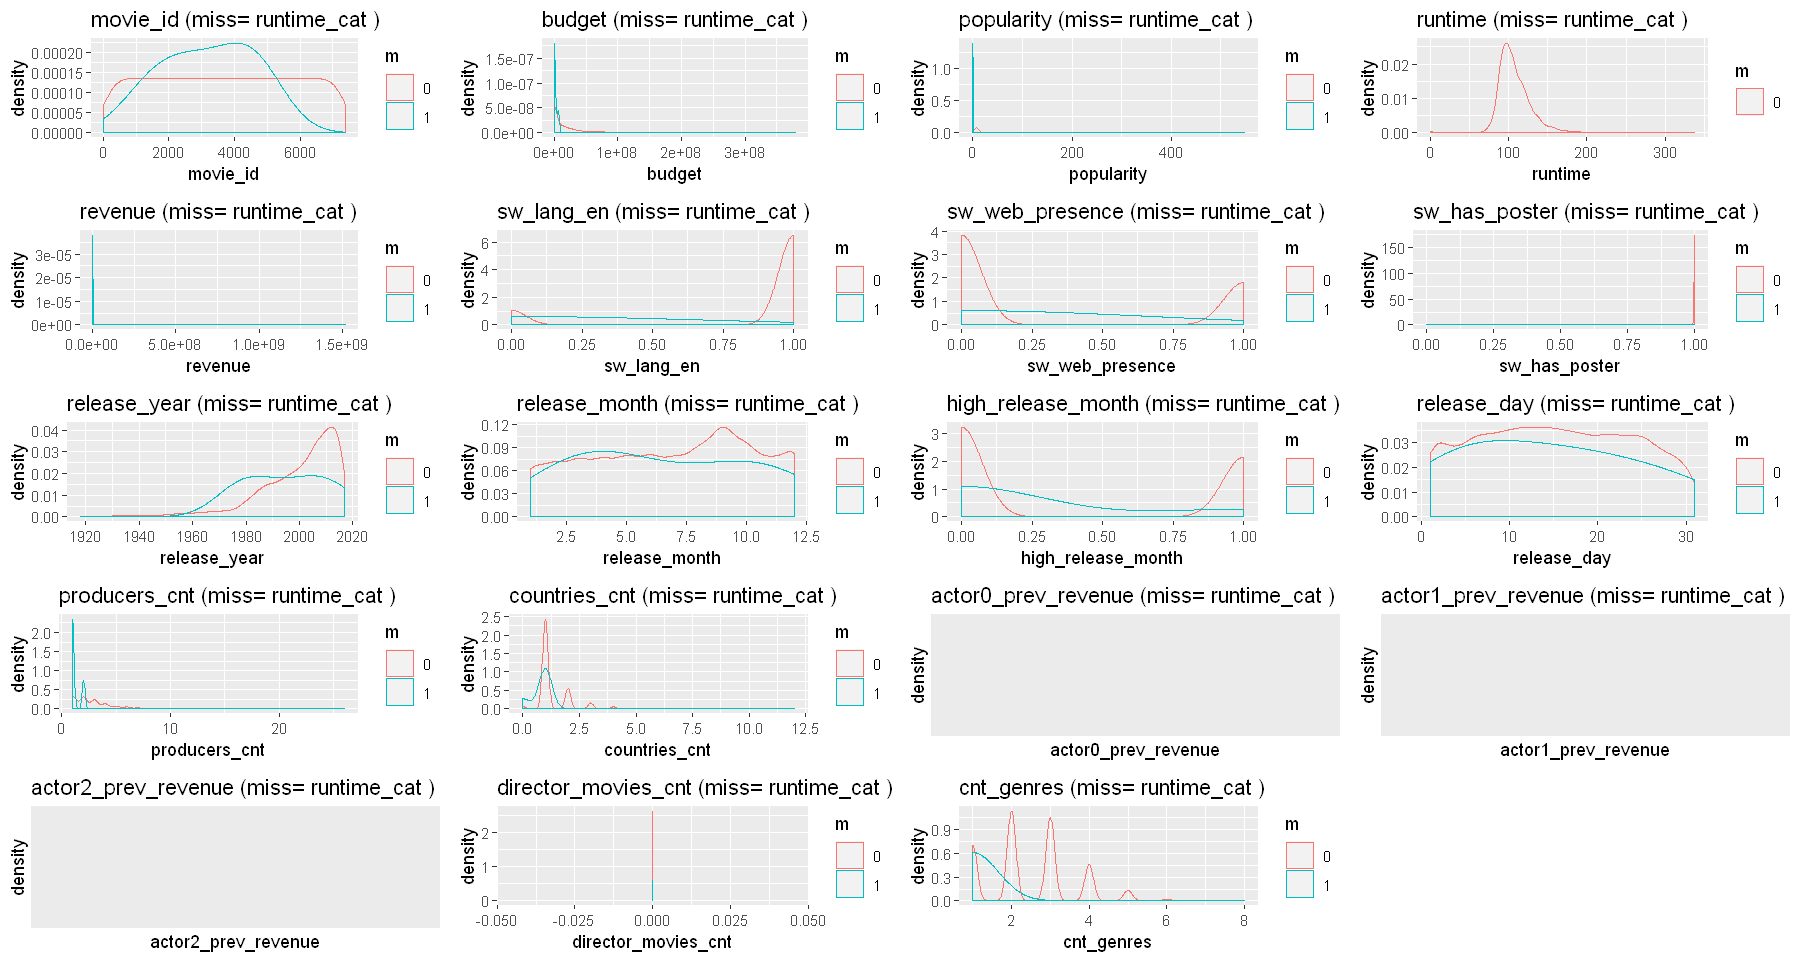

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 395 rows containing non-finite values (stat_density

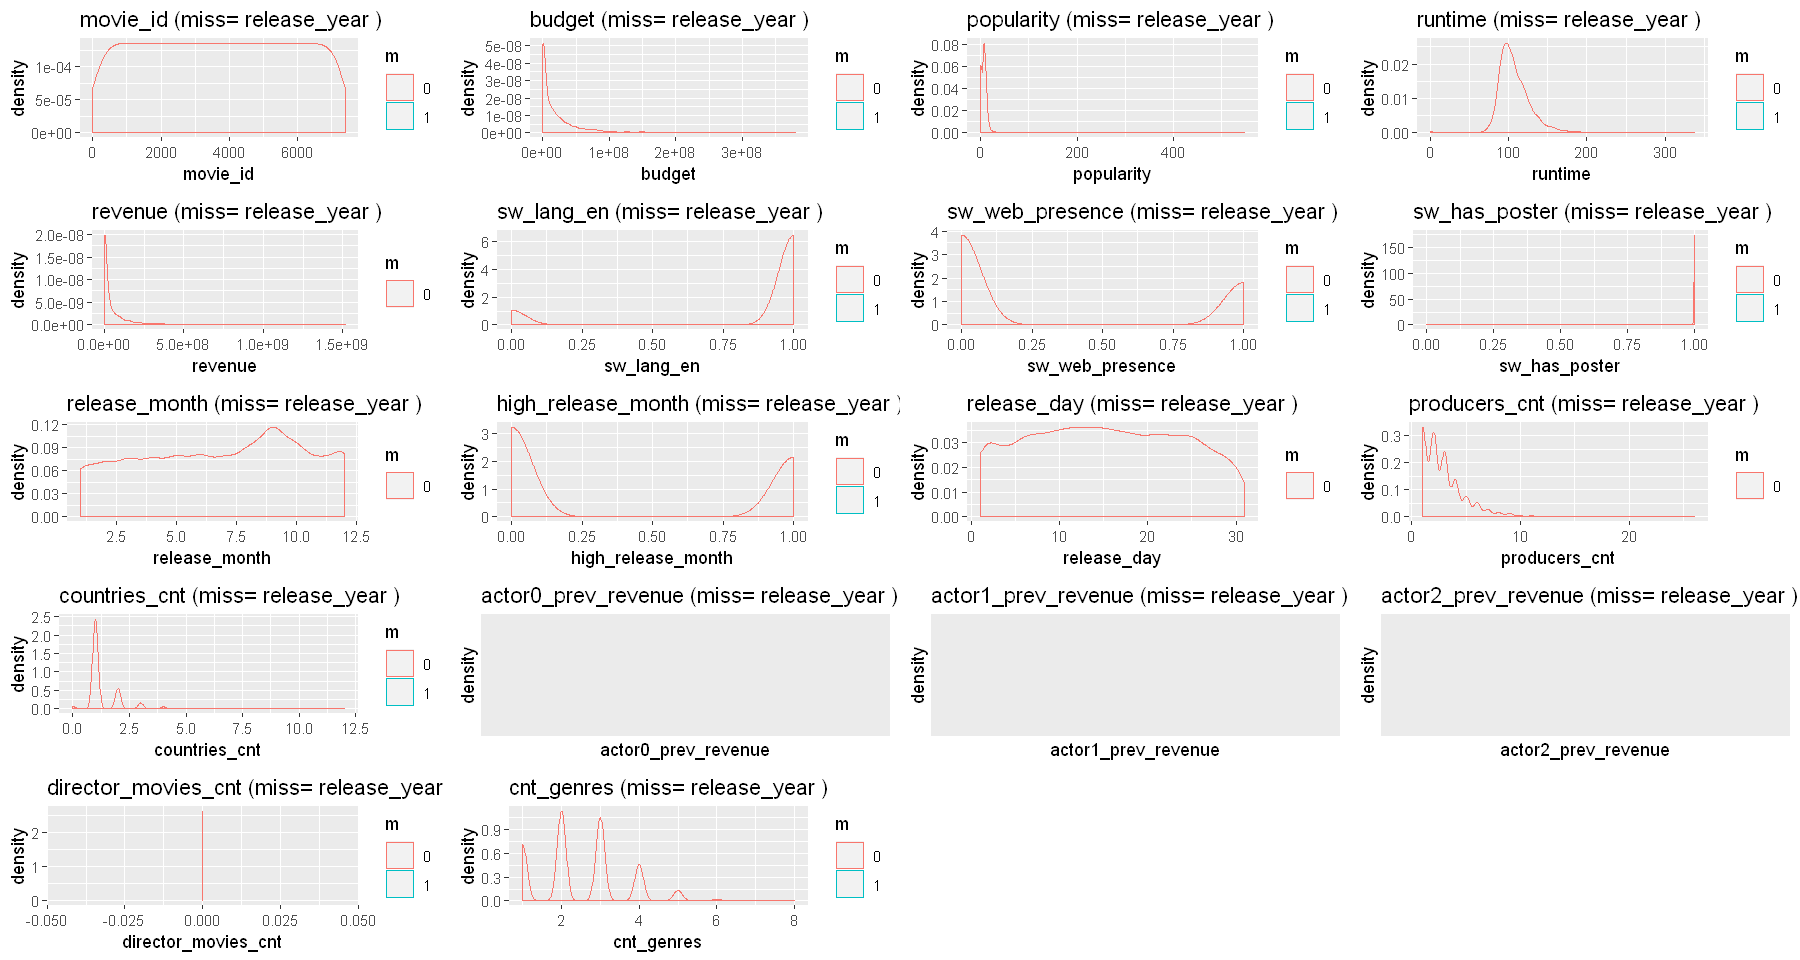

Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 5 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 4382 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Removed 1 rows containing non-finite values (stat_density)."Warning message:
"Groups with fewer than two data points have been dropped."Warning message:
"Removed 395 rows containing non-finite values (stat_density

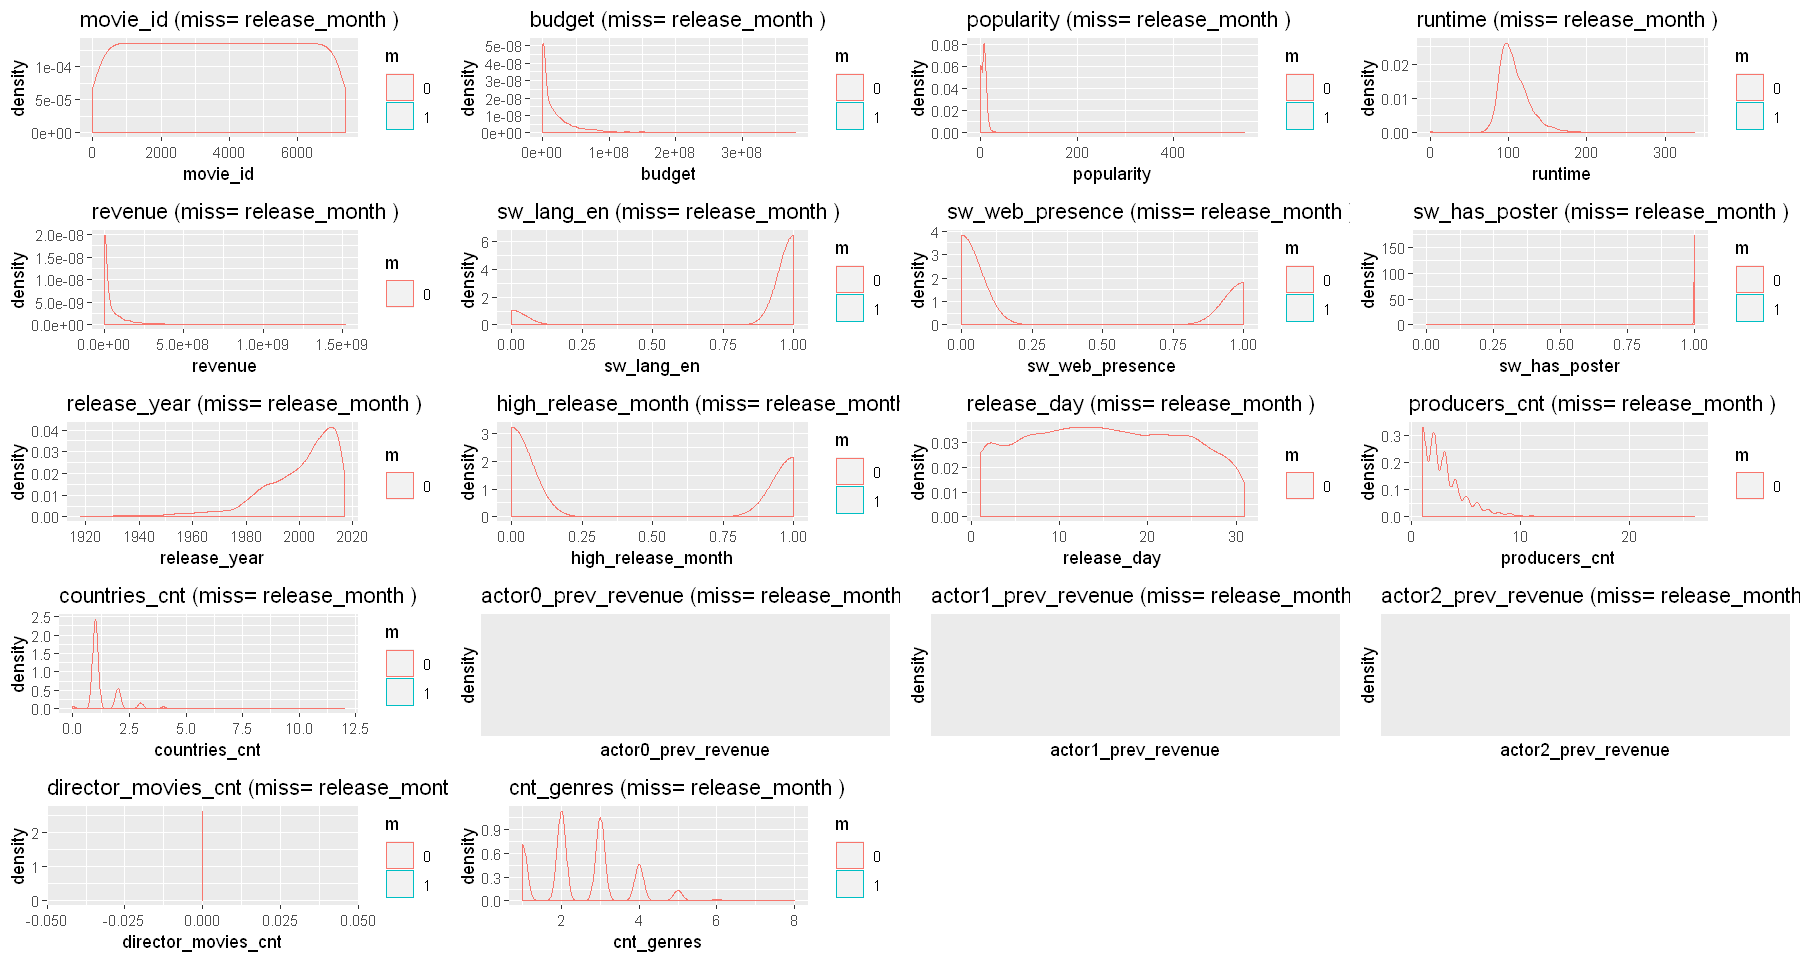

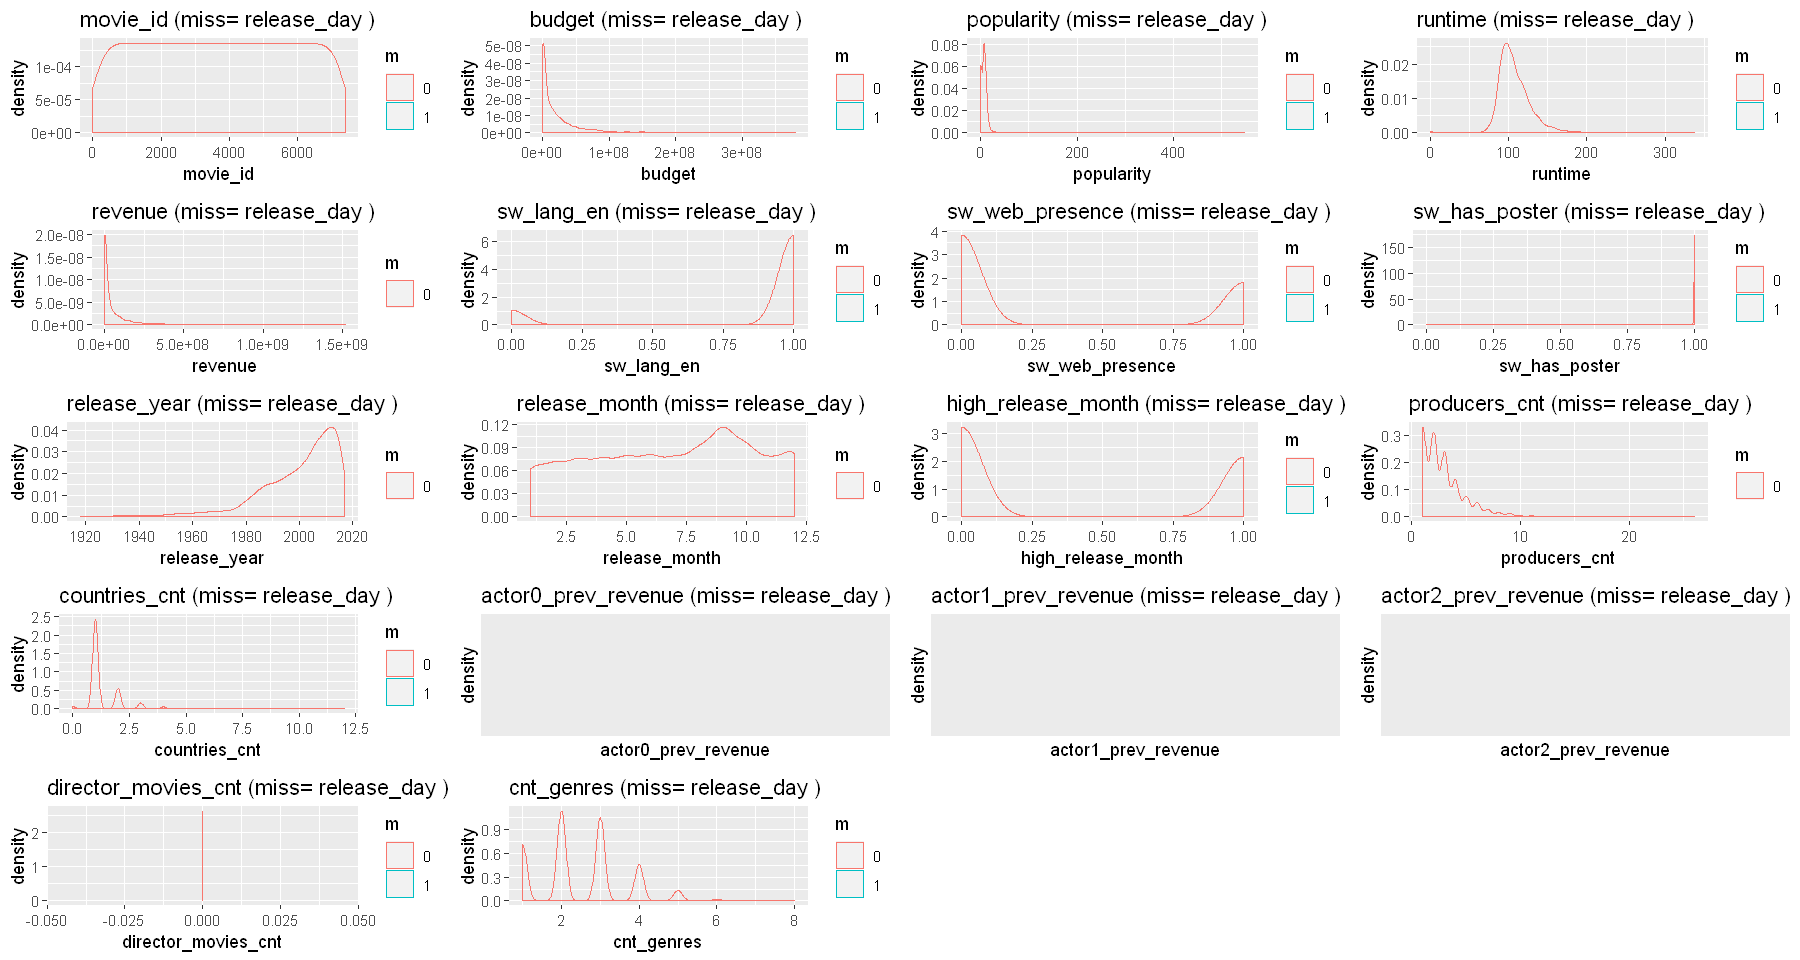

In [143]:
library(gridExtra)
library(ggplot2)

for (m in mm$missingness$var) {
    p <- list()
    i <- 1
    for (v in numlst) {
        if (v != m) {
            ff <- data.frame(v=df[[v]],m=factor(df_na[[m]]))
            p[[i]] <- suppressMessages(ggplot(data=ff,aes(x=v,group=m,color=m)) +
              geom_density()+labs(title=paste(v, "(miss=", m,")"),x =v))
            i <- i + 1
        }
    }
    do.call(grid.arrange,p)
}

#do.call(grid.arrange,p)


In [170]:
m <- mm$missingness$var[4]
m

[1] revenue
29 Levels: movie_id budget original_language popularity runtime ... orig_lang2

In [175]:

nm <- setdiff(names(df),c("actor0_prev_revenue","actor1_prev_revenue","actor2_prev_revenue"))
nm <- nm[1:length(nm)-1]
nm

[1] "movie_id"            "budget"              "original_language"  
 [4] "popularity"          "runtime"             "runtime_cat"        
 [7] "revenue"             "sw_lang_en"          "sw_web_presence"    
[10] "sw_has_poster"       "release_year"        "release_month"      
[13] "high_release_month"  "release_day"         "producers_cnt"      
[16] "countries_cnt"       "lang_US"             "lang_FR"            
[19] "lang_RU"             "lang_ES"             "lang_JA"            
[22] "director_movies_cnt" "cnt_genres"          "runtimecat"         
[25] "orig_lang_en"

In [176]:
### test the missing mechanism using glm
res <- NULL
for (m in mm$missingness$var) {
    ## change the current tested variable with the missing indicator for this variable
    ff <- df[,nm]
    ff[[m]] <- df_na[[m]]
    mod <- glm(ff[[m]] ~.,data=ff,family="binomial")
    sm <- summary(mod)
    if(is.null(sm)==F) {
      sm2 <- data.frame(var=row.names(sm$coefficients),pvalue=sm$coefficients[,4])
      res <- rbind(res, cbind(m,sm2))
      #append(res, sm, m)
    } else {
      print(sm)
    }
}

row.names(res) <- NULL
res

ERROR: Error in `contrasts<-`(`*tmp*`, value = contr.funs[1 + isOF[nn]]): contrasts can be applied only to factors with 2 or more levels


In [177]:
install.packages("cocor")

package 'cocor' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\rona2_000\AppData\Local\Temp\RtmpMFQfq5\downloaded_packages


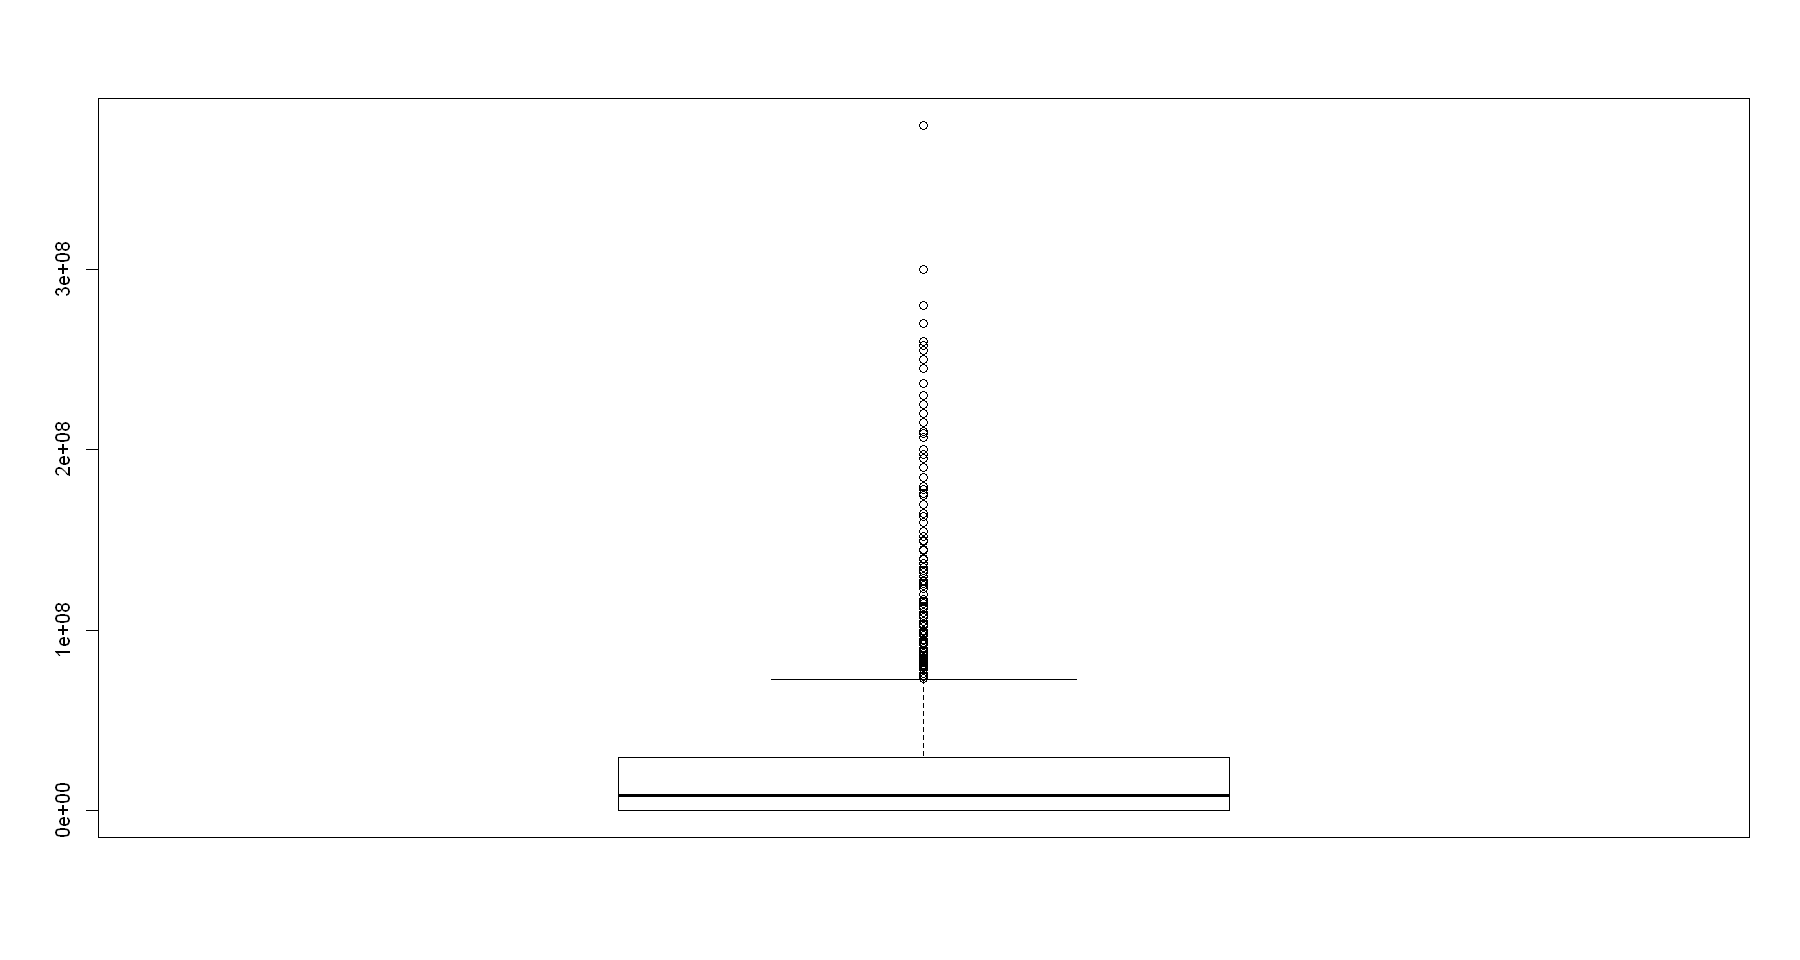

In [185]:
boxplot(df$budget)       

In [193]:
budget_na <- df$budget[!df$budget %in% boxplot.stats(df$budget)$out]  

In [195]:
length(df$budget) - length(budget_na)     

[1] 624

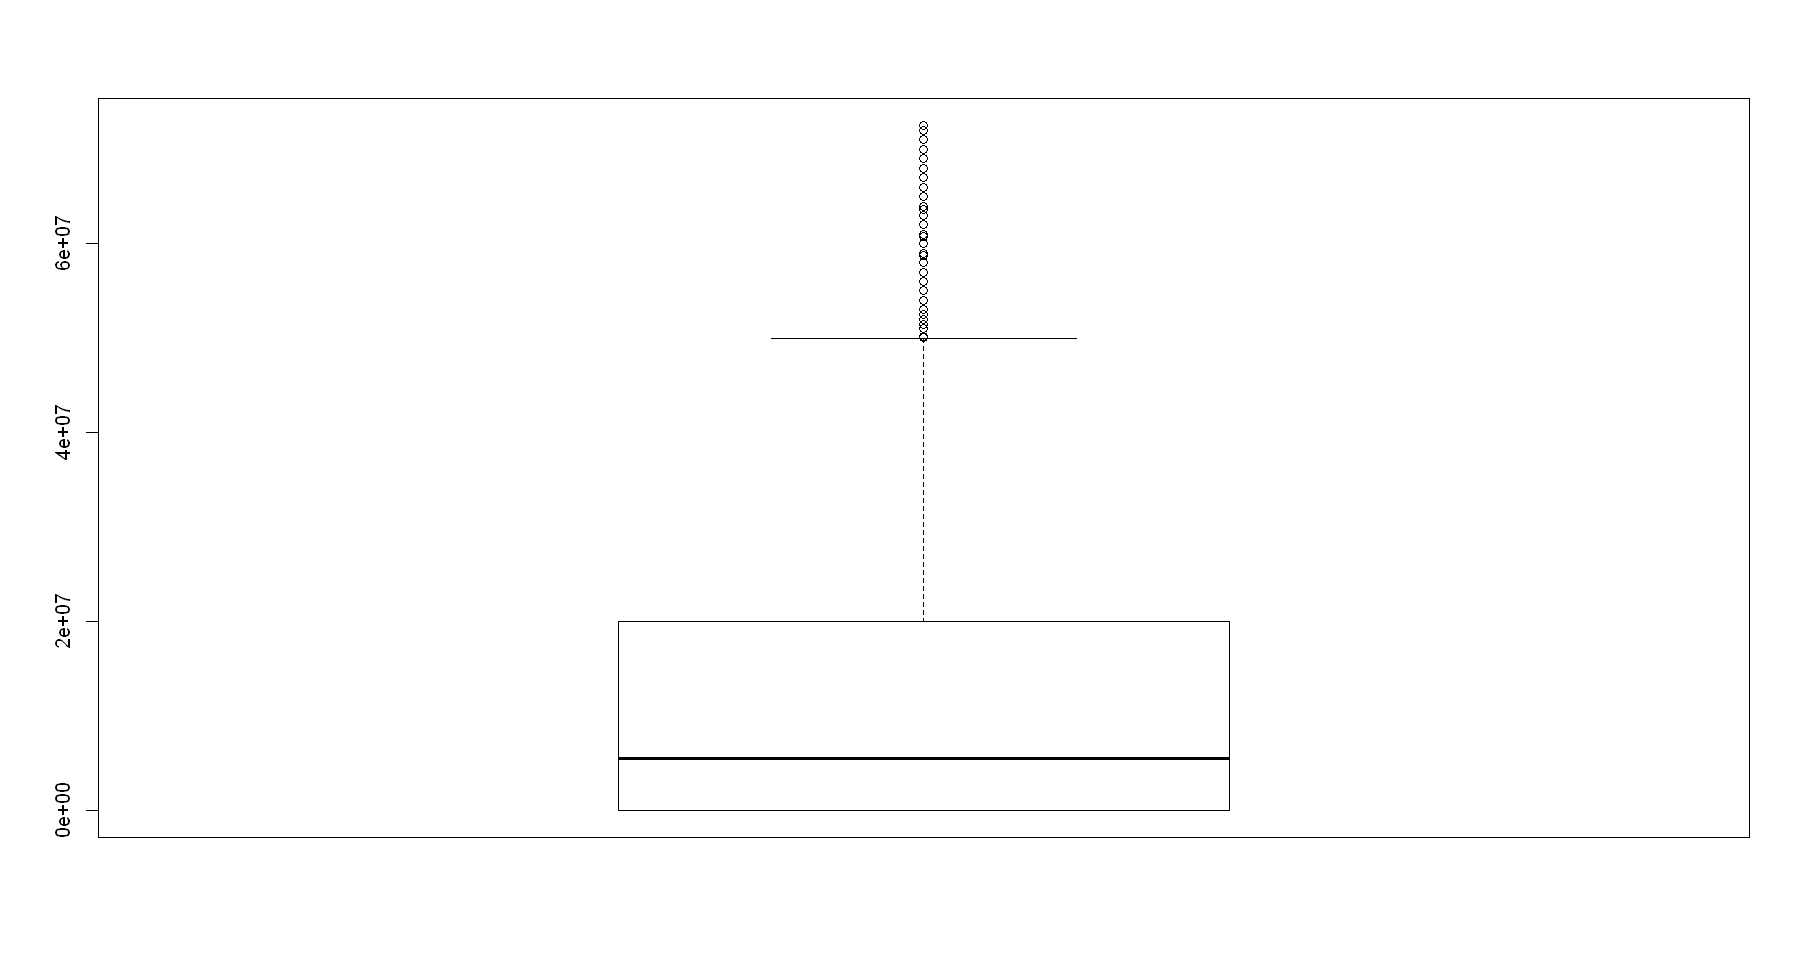

In [196]:
boxplot(budget_na) 

In [197]:
Rev_na <- df$revenue[!df$revenue %in% boxplot.stats(df$revenue)$out]  

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"

Warning message in x[floor(d)] + x[ceiling(d)]:
"NAs produced by integer overflow"

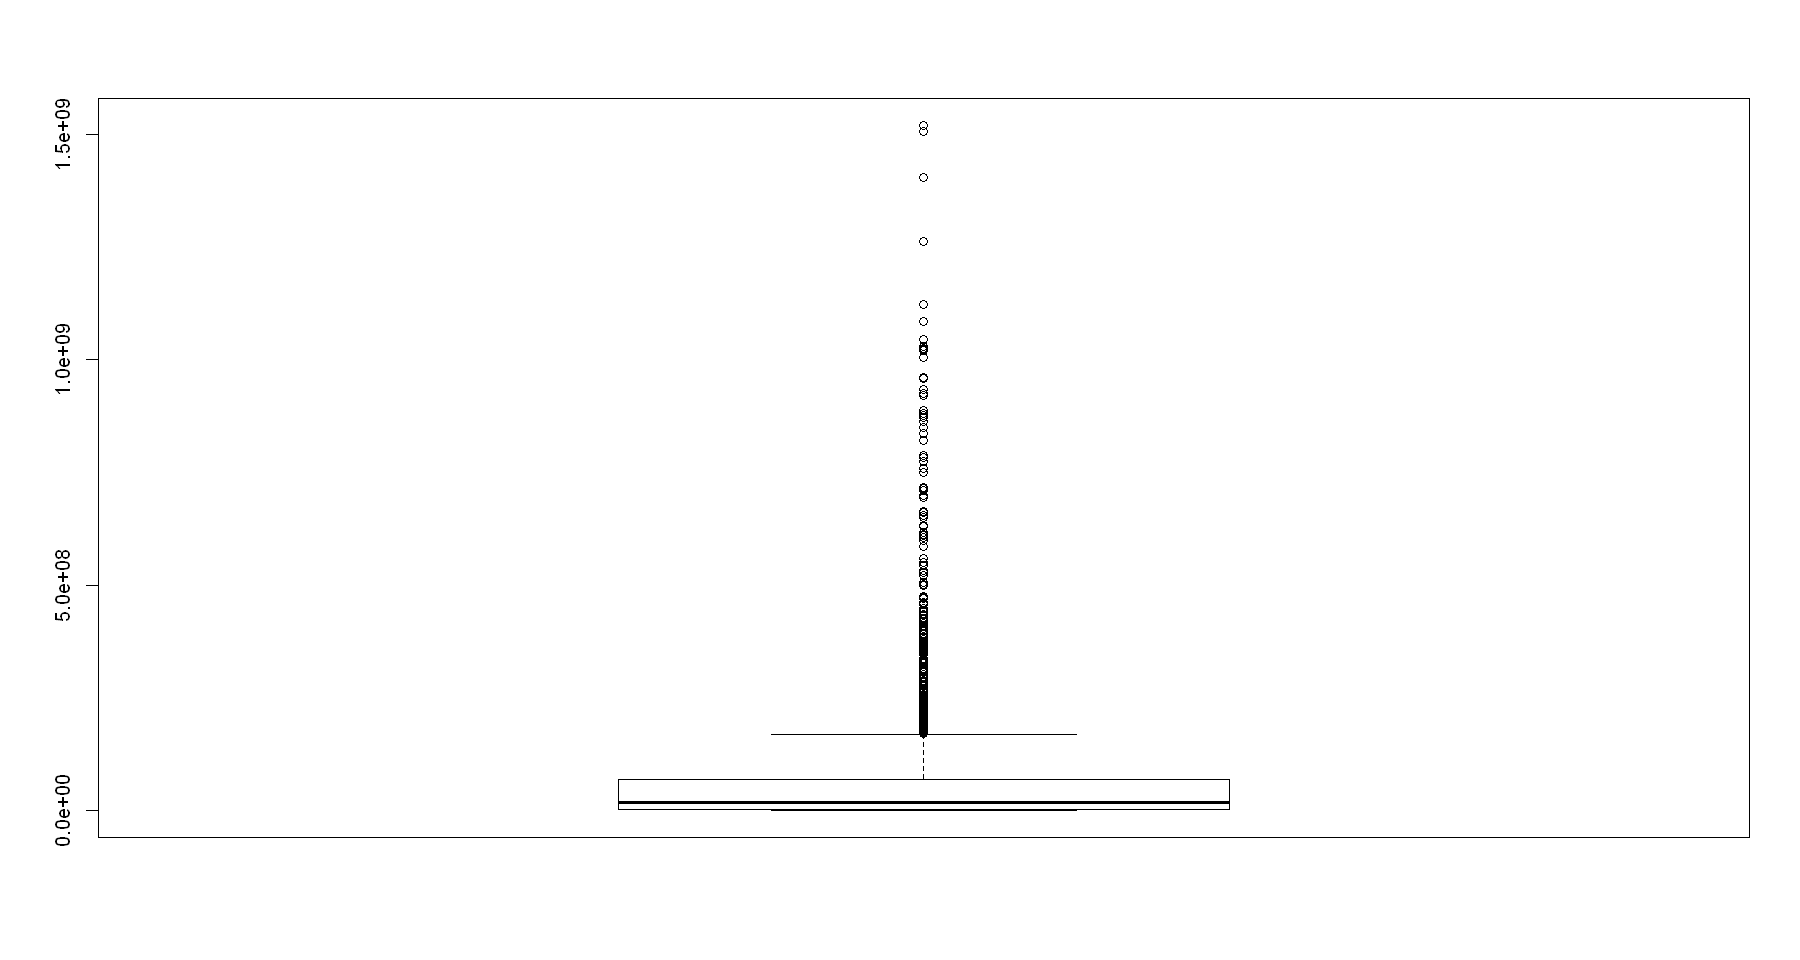

In [198]:
boxplot(df$revenue)

In [219]:
df1 <- df[!is.na(df$revenue), ]                 # Omit NA by column via is.na
df1  

movie_id,budget,original_language,popularity,runtime,runtime_cat,revenue,sw_lang_en,sw_web_presence,sw_has_poster,...,lang_ES,lang_JA,actor0_prev_revenue,actor1_prev_revenue,actor2_prev_revenue,director_movies_cnt,cnt_genres,runtimecat,orig_lang_en,orig_lang2
1,14000000,en,6.575393,93,Short,12314651,1,0,1,...,0,0,NA,NA,NA,0,1,3,other,11
2,40000000,en,8.248895,113,medium,95149435,1,0,1,...,0,0,NA,NA,NA,0,4,2,other,11
3,3300000,en,64.299988,105,medium,13092000,1,1,1,...,0,0,NA,NA,NA,0,1,2,other,11
4,1200000,hi,3.174936,122,large,16000000,0,1,1,...,0,0,NA,NA,NA,0,2,1,other,other
5,0,ko,1.148070,118,large,3923970,0,0,1,...,0,0,NA,NA,NA,0,2,2,other,other
6,8000000,en,0.743274,83,Short,3261638,1,0,1,...,0,0,NA,NA,NA,0,3,3,other,11
7,14000000,en,7.286477,92,Short,85446075,1,1,1,...,0,0,NA,NA,NA,0,2,3,other,11
8,0,en,1.949044,84,Short,2586511,1,0,1,...,0,0,NA,NA,NA,0,1,3,other,11
9,0,en,6.902423,100,medium,34327391,1,0,1,...,0,0,NA,NA,NA,0,5,2,other,11
10,6000000,en,4.672036,91,Short,18750246,1,0,1,...,0,0,NA,NA,NA,0,2,3,other,11


In [220]:
summary(df1)

    movie_id        budget          original_language   popularity     
 Min.   :   1   Min.   :        0   en     :2571      Min.   :  0.000  
 1st Qu.: 750   1st Qu.:        0   fr     :  78      1st Qu.:  4.071  
 Median :1498   Median :  8000000   ru     :  45      Median :  7.392  
 Mean   :1499   Mean   : 22582092   es     :  43      Mean   :  8.482  
 3rd Qu.:2249   3rd Qu.: 29000000   hi     :  42      3rd Qu.: 10.896  
 Max.   :3000   Max.   :380000000   ja     :  37      Max.   :294.337  
                                    (Other): 177                       
    runtime      runtime_cat      revenue            sw_lang_en   
 Min.   :  0.0   Short : 696   Min.   :1.000e+00   Min.   :0.000  
 1st Qu.: 94.0   medium:1521   1st Qu.:2.405e+06   1st Qu.:1.000  
 Median :104.0   large : 774   Median :1.693e+07   Median :1.000  
 Mean   :107.9   NA's  :   2   Mean   :6.688e+07   Mean   :0.859  
 3rd Qu.:118.0                 3rd Qu.:6.906e+07   3rd Qu.:1.000  
 Max.   :338.0        

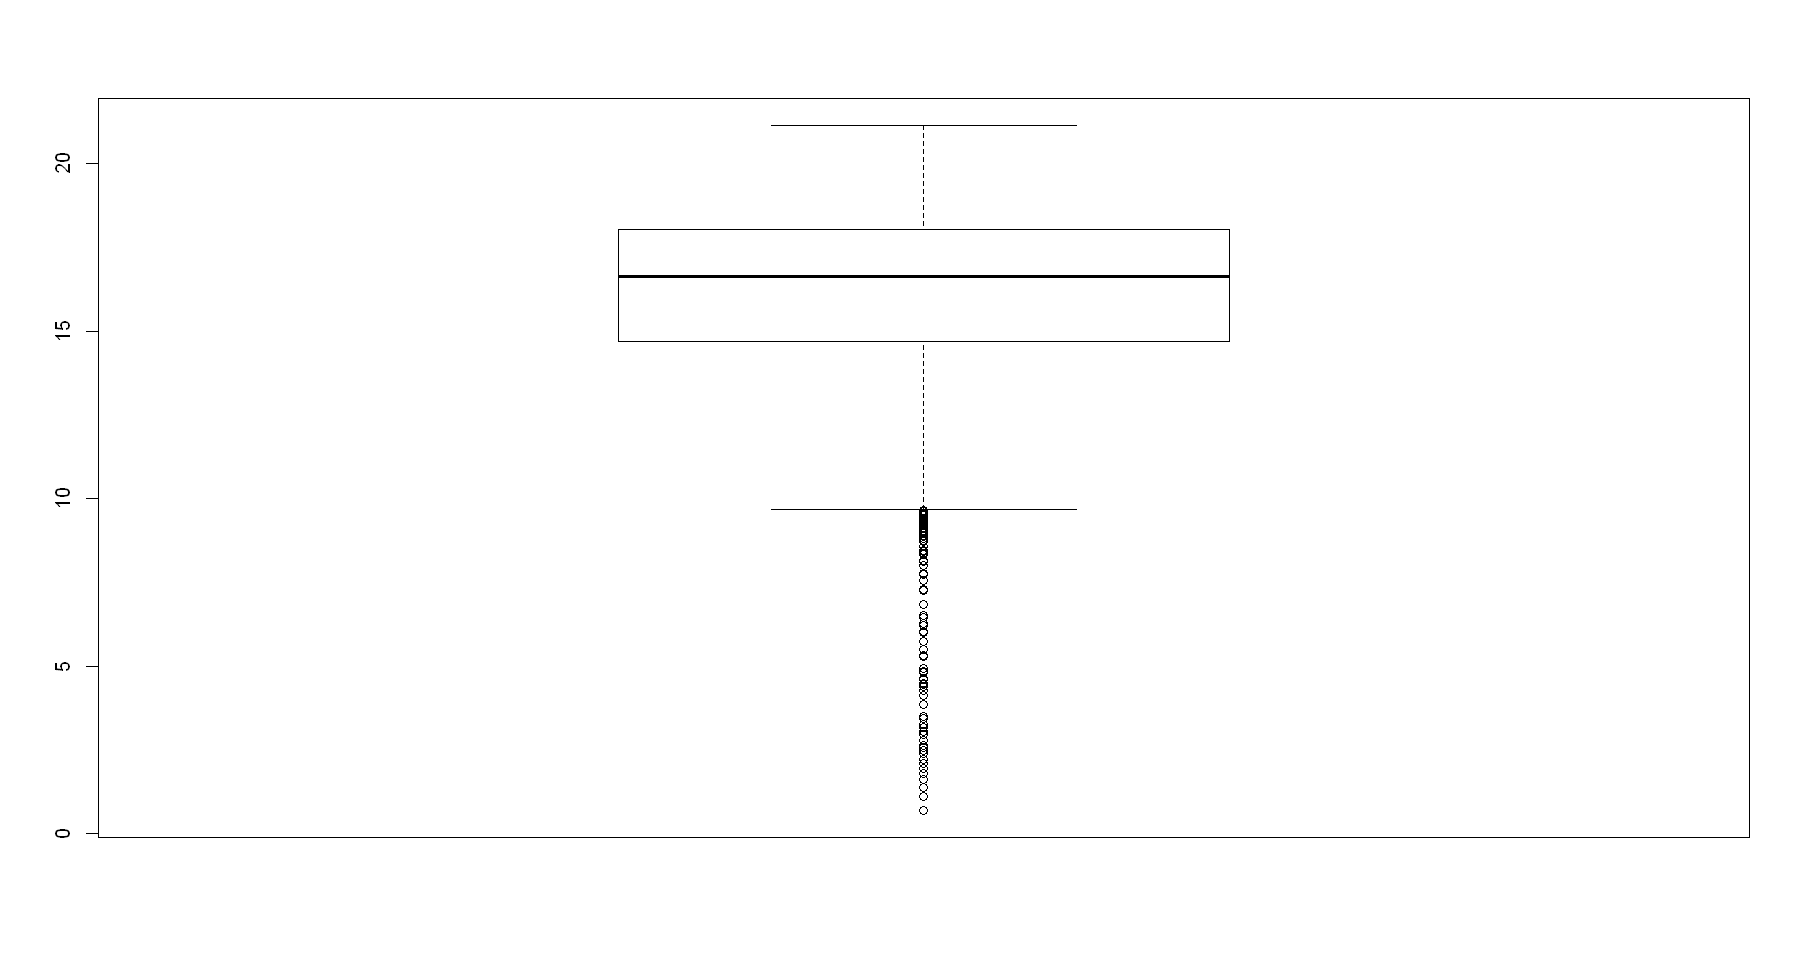

In [221]:
boxplot(log(df1$revenue+1))

In [224]:
Q <- quantile(df1$revenue, probs=c(.25, .75), na.rm = FALSE)


In [259]:
iqr <- IQR(df1$revenue)
iqr

[1] 66650275

In [227]:
up <-  Q[2]+1.5*iqr # Upper Range  
low<- Q[1]-1.5*iqr # Lower Range

In [230]:
eliminated<- subset(df1,df1$revenue > (Q[1] - 1.5*iqr) & df1$revenue < (Q[2]+1.5*iqr))


In [257]:
summary(eliminated)

    movie_id          budget          original_language   popularity    
 Min.   :   1.0   Min.   :        0   en     :2261      Min.   : 0.000  
 1st Qu.: 751.2   1st Qu.:        0   fr     :  77      1st Qu.: 3.554  
 Median :1499.0   Median :  5000000   ru     :  45      Median : 6.790  
 Mean   :1501.7   Mean   : 14781862   es     :  43      Mean   : 7.140  
 3rd Qu.:2250.8   3rd Qu.: 20000000   hi     :  41      3rd Qu.: 9.926  
 Max.   :3000.0   Max.   :197471676   ja     :  37      Max.   :88.439  
                                      (Other): 174                      
    runtime      runtime_cat      revenue            sw_lang_en    
 Min.   :  0.0   Short : 654   Min.   :        1   Min.   :0.0000  
 1st Qu.: 94.0   medium:1391   1st Qu.:  1749265   1st Qu.:1.0000  
 Median :103.0   large : 631   Median : 12000000   Median :1.0000  
 Mean   :106.7   NA's  :   2   Mean   : 30454231   Mean   :0.8443  
 3rd Qu.:116.0                 3rd Qu.: 42763574   3rd Qu.:1.0000  
 Max.   

In [260]:
summary(df)

    movie_id        budget          original_language   popularity     
 Min.   :   1   Min.   :        0   en     :2571      Min.   :  0.000  
 1st Qu.: 750   1st Qu.:        0   fr     :  78      1st Qu.:  4.071  
 Median :1498   Median :  8000000   ru     :  45      Median :  7.392  
 Mean   :1499   Mean   : 22582092   es     :  43      Mean   :  8.482  
 3rd Qu.:2249   3rd Qu.: 29000000   hi     :  42      3rd Qu.: 10.896  
 Max.   :3000   Max.   :380000000   ja     :  37      Max.   :294.337  
                                    (Other): 177                       
    runtime      runtime_cat      revenue            sw_lang_en   
 Min.   :  0.0   Short : 696   Min.   :1.000e+00   Min.   :0.000  
 1st Qu.: 94.0   medium:1521   1st Qu.:2.405e+06   1st Qu.:1.000  
 Median :104.0   large : 774   Median :1.693e+07   Median :1.000  
 Mean   :107.9   NA's  :   2   Mean   :6.688e+07   Mean   :0.859  
 3rd Qu.:118.0                 3rd Qu.:6.906e+07   3rd Qu.:1.000  
 Max.   :338.0        

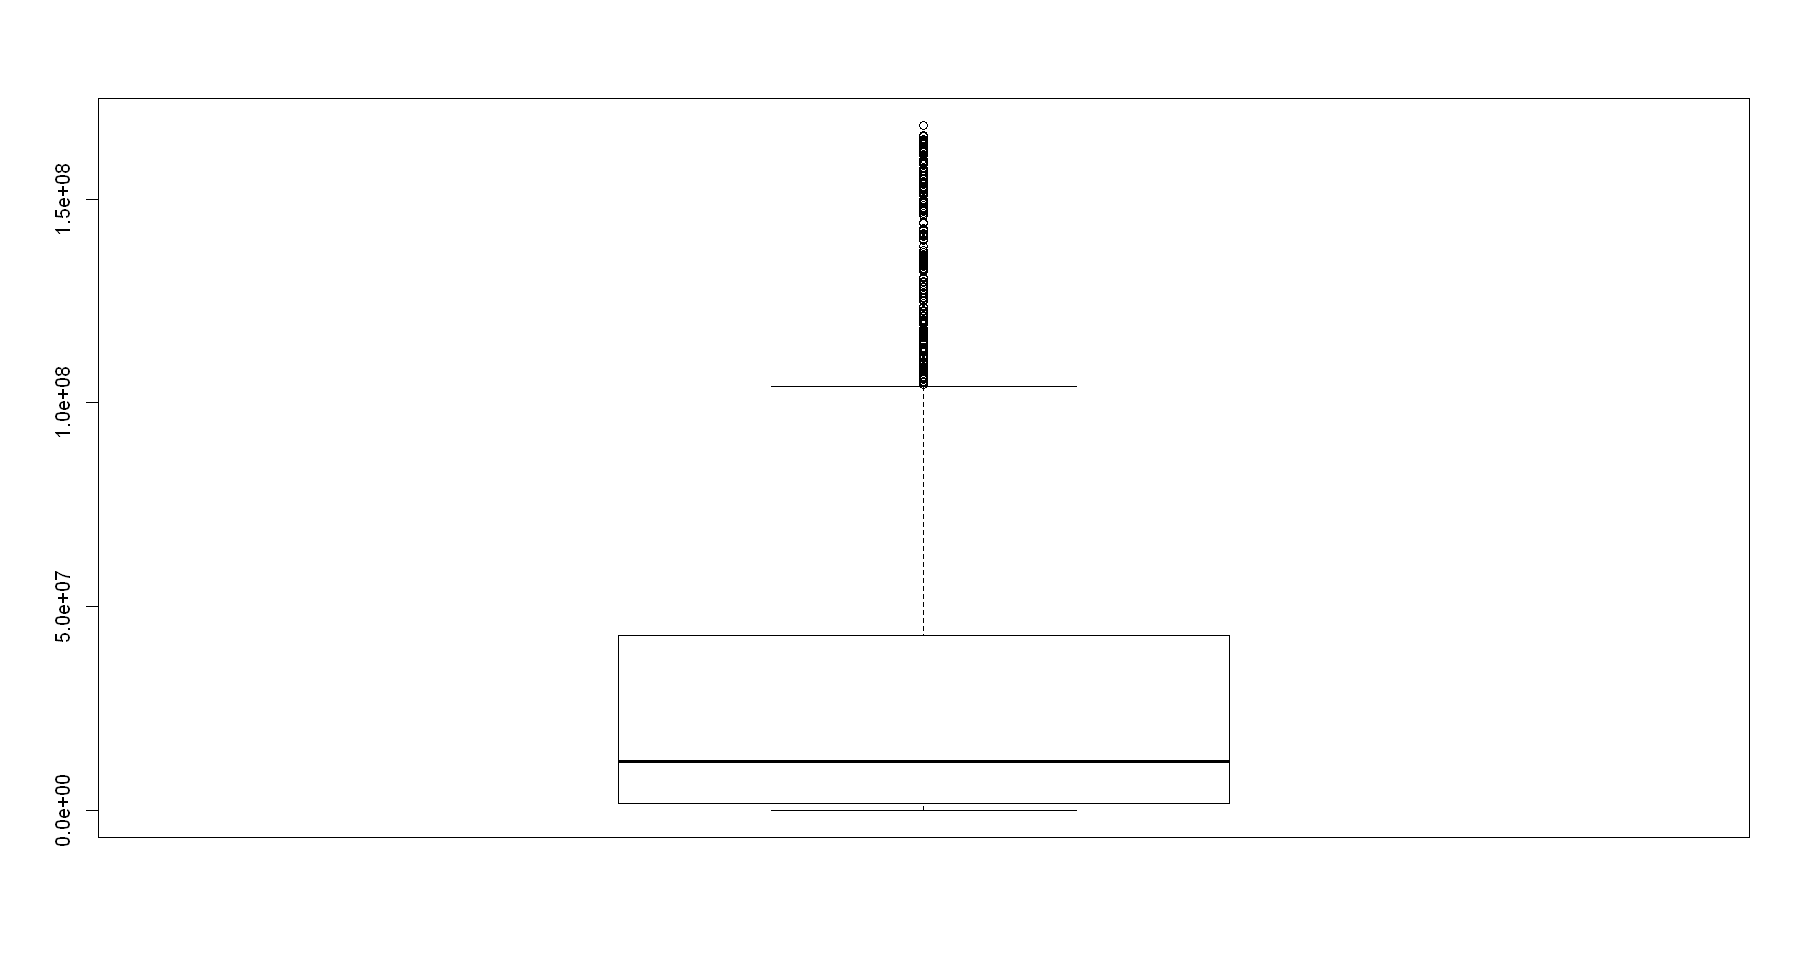

In [258]:
boxplot(eliminated$revenue)

In [267]:
eliminated1<- subset(df1,eliminated$budget > (Q[1] - 1.5*iqr) & eliminated$budget < (Q[2]+1.5*iqr))

In [274]:
Q1 <- quantile(df1$budget, probs=c(.25, .75), na.rm = FALSE)

In [275]:
up <-  Q1[2]+1.5*iqr # Upper Range  
low<- Q1[1]-1.5*iqr # Lower Range

In [278]:
eliminated1<- subset(eliminated,eliminated$budget > (Q1[1] - 1.5*iqr) & eliminated$budget< (Q1[2]+1.5*iqr))

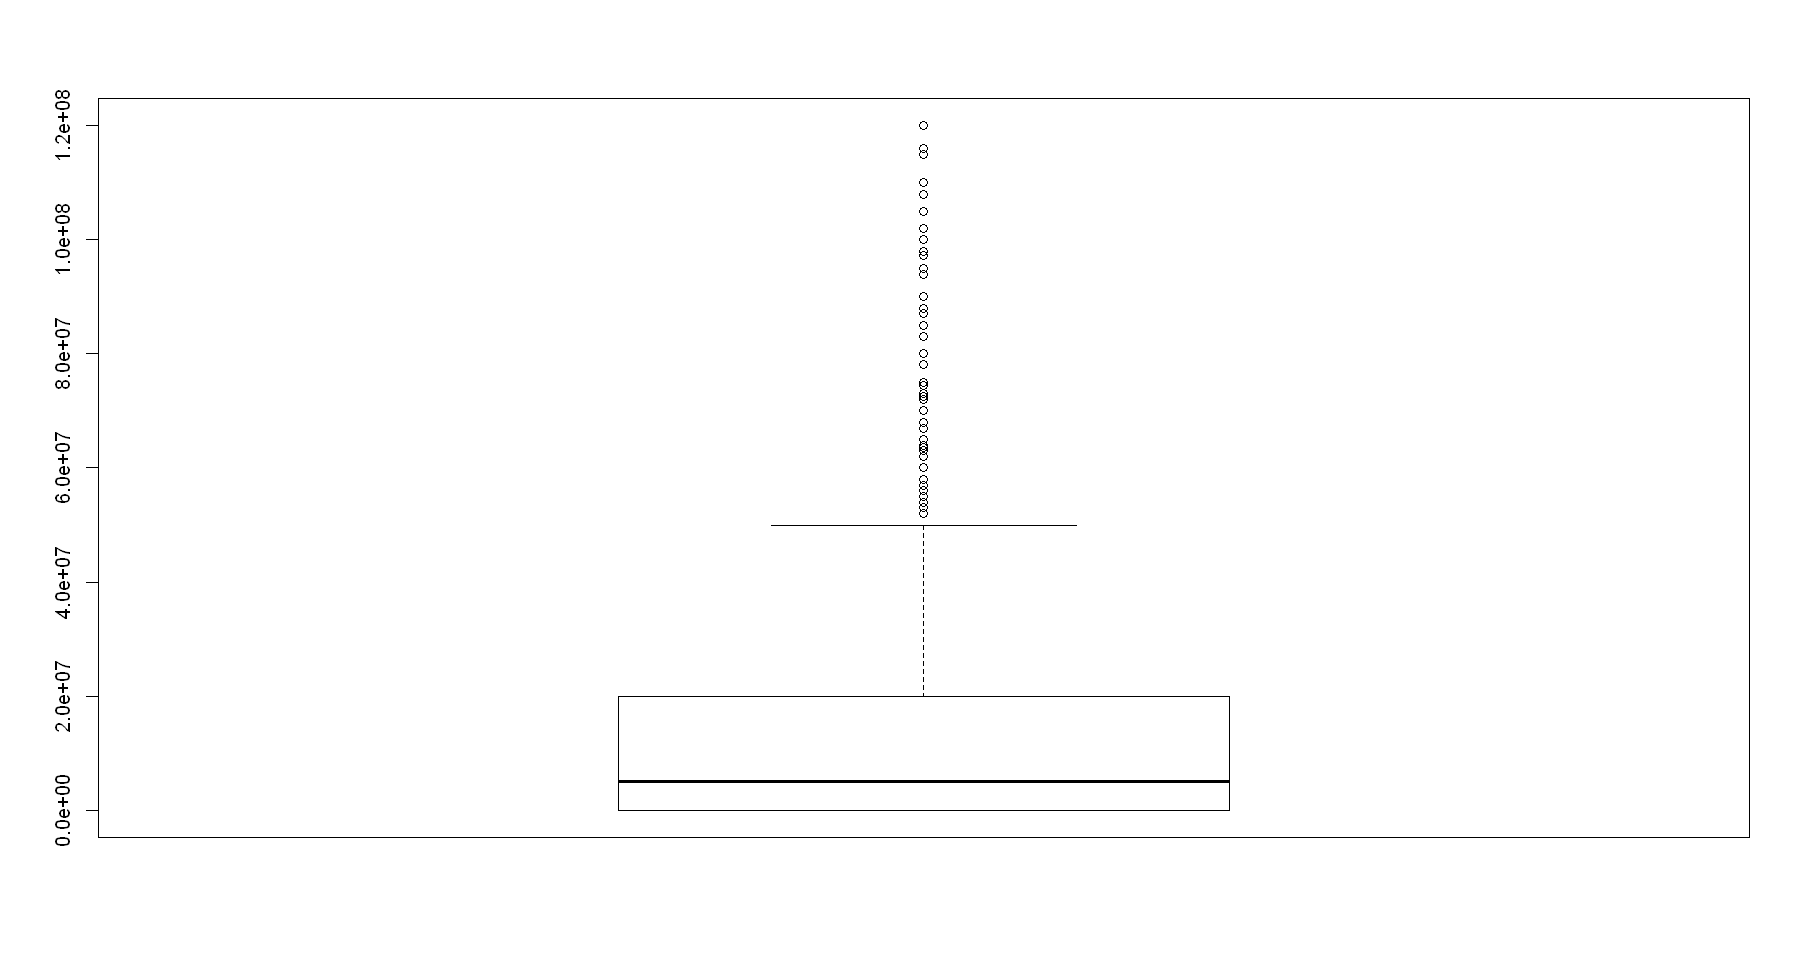

In [279]:
boxplot(eliminated1$budget)

In [281]:

Q2 <- quantile(df1$budget, probs=c(.25, .75), na.rm = FALSE)
up <-  Q2[2]+1.5*iqr # Upper Range  
low<- Q2[1]-1.5*iqr # Lower Range


In [283]:
eliminated2<- subset(eliminated1,eliminated1$runtime > (Q2[1] - 1.5*iqr) & eliminated1$runtime < (Q2[2]+1.5*iqr))

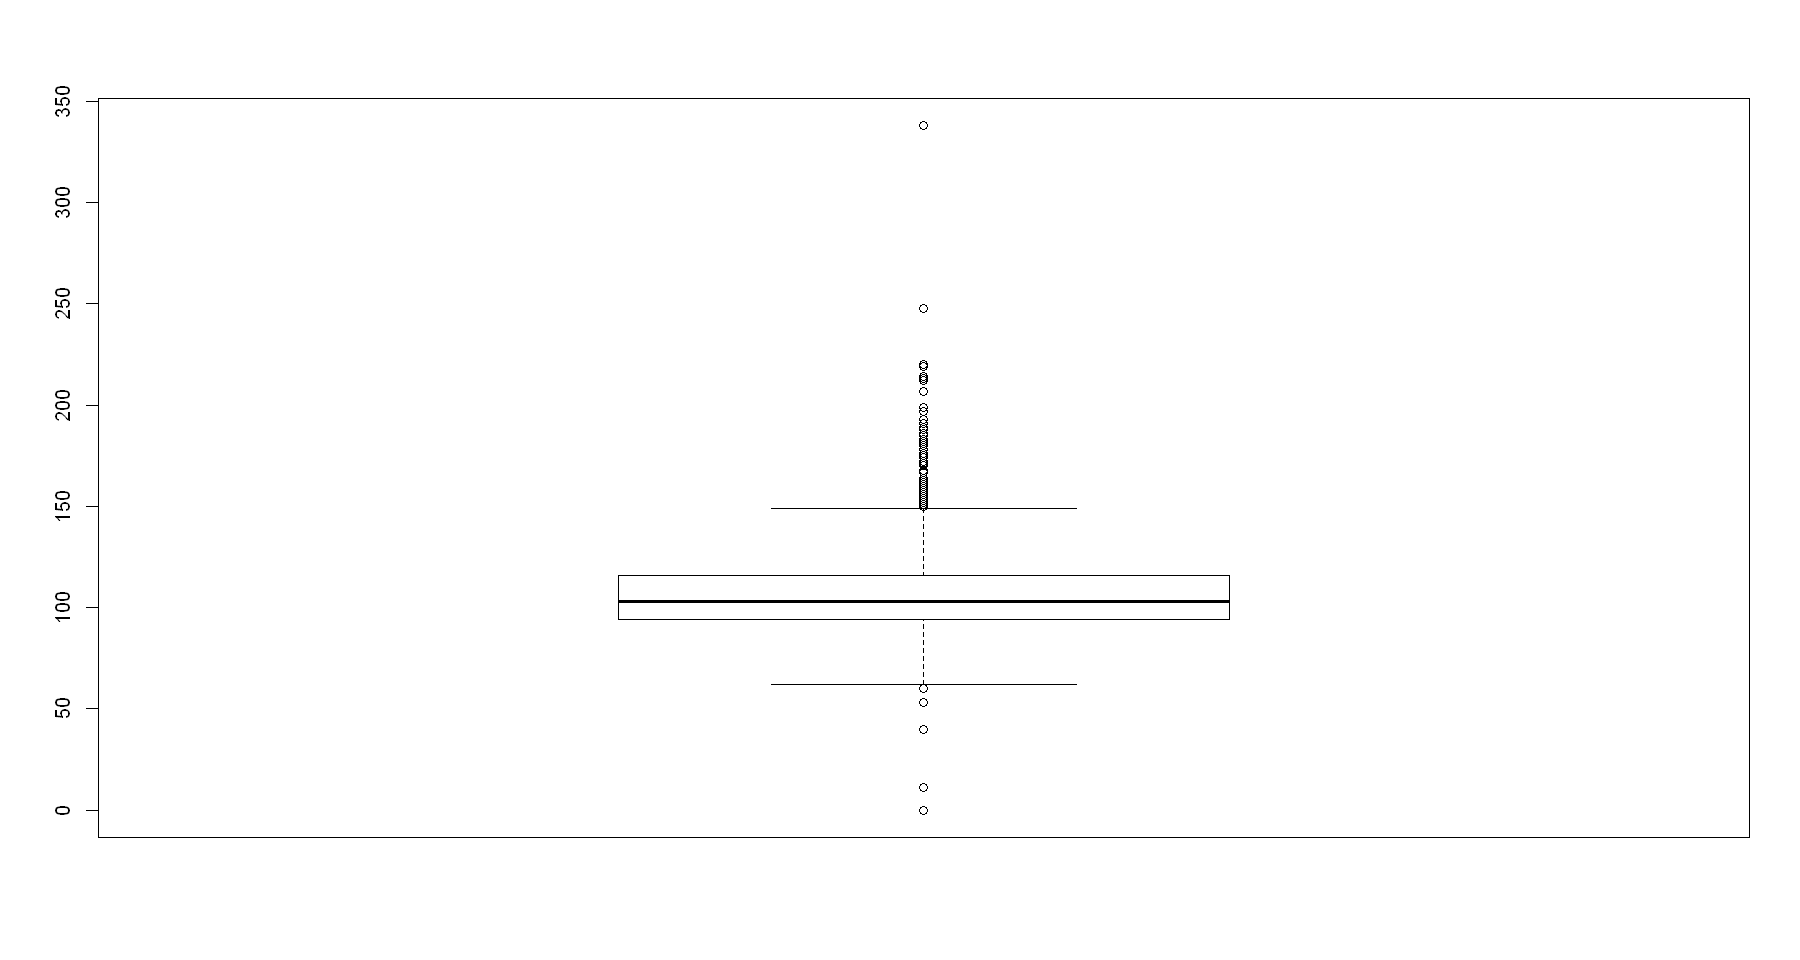

In [284]:
boxplot(eliminated2$runtime)

In [287]:
summary(eliminated2)

    movie_id          budget         original_language   popularity    
 Min.   :   1.0   Min.   :0.00e+00   en     :2253      Min.   : 0.000  
 1st Qu.: 751.8   1st Qu.:0.00e+00   fr     :  77      1st Qu.: 3.553  
 Median :1499.0   Median :5.00e+06   ru     :  44      Median : 6.774  
 Mean   :1502.0   Mean   :1.44e+07   es     :  43      Mean   : 7.132  
 3rd Qu.:2251.2   3rd Qu.:2.00e+07   hi     :  41      3rd Qu.: 9.898  
 Max.   :3000.0   Max.   :1.20e+08   ja     :  37      Max.   :88.439  
                                     (Other): 173                      
    runtime      runtime_cat      revenue            sw_lang_en    
 Min.   :  0.0   Short : 654   Min.   :        1   Min.   :0.0000  
 1st Qu.: 94.0   medium:1389   1st Qu.:  1748115   1st Qu.:1.0000  
 Median :103.0   large : 625   Median : 11995200   Median :1.0000  
 Mean   :106.7                 Mean   : 30227148   Mean   :0.8445  
 3rd Qu.:116.0                 3rd Qu.: 42291348   3rd Qu.:1.0000  
 Max.   :338.0  

In [289]:
#AfterOutiers

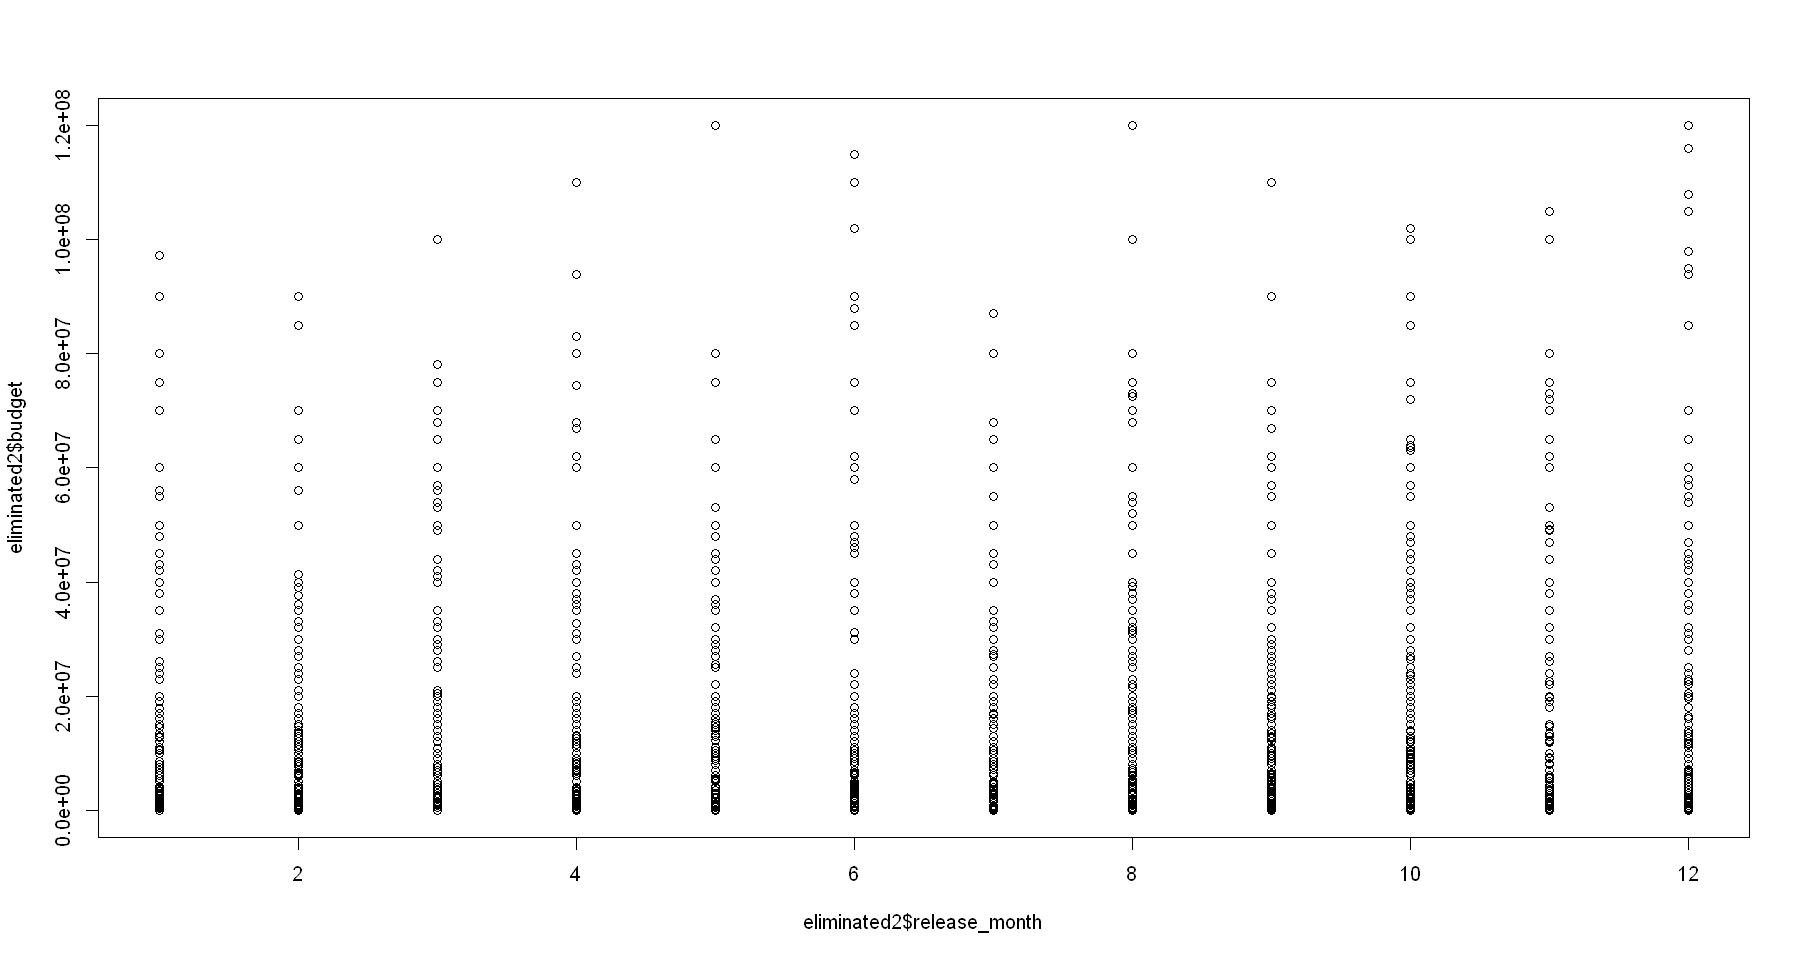

In [290]:
plot(eliminated2$budget ~ eliminated2$release_month)

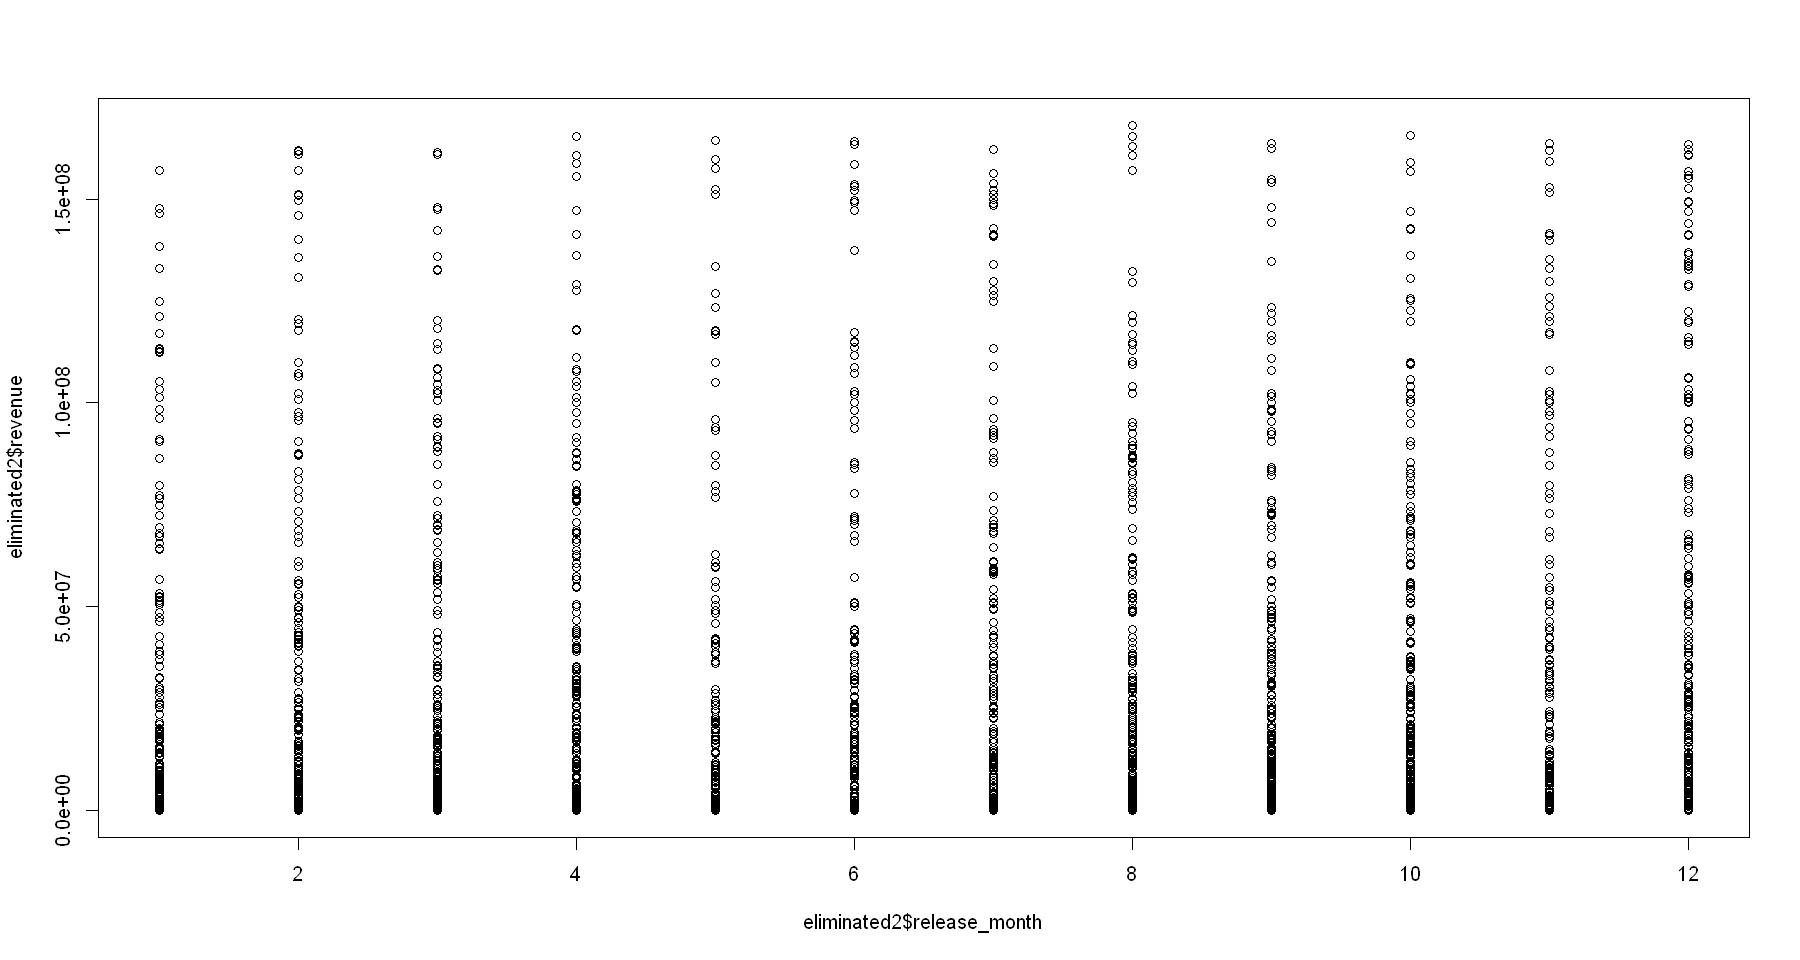

In [291]:
plot(eliminated2$revenue ~ eliminated2$release_month)

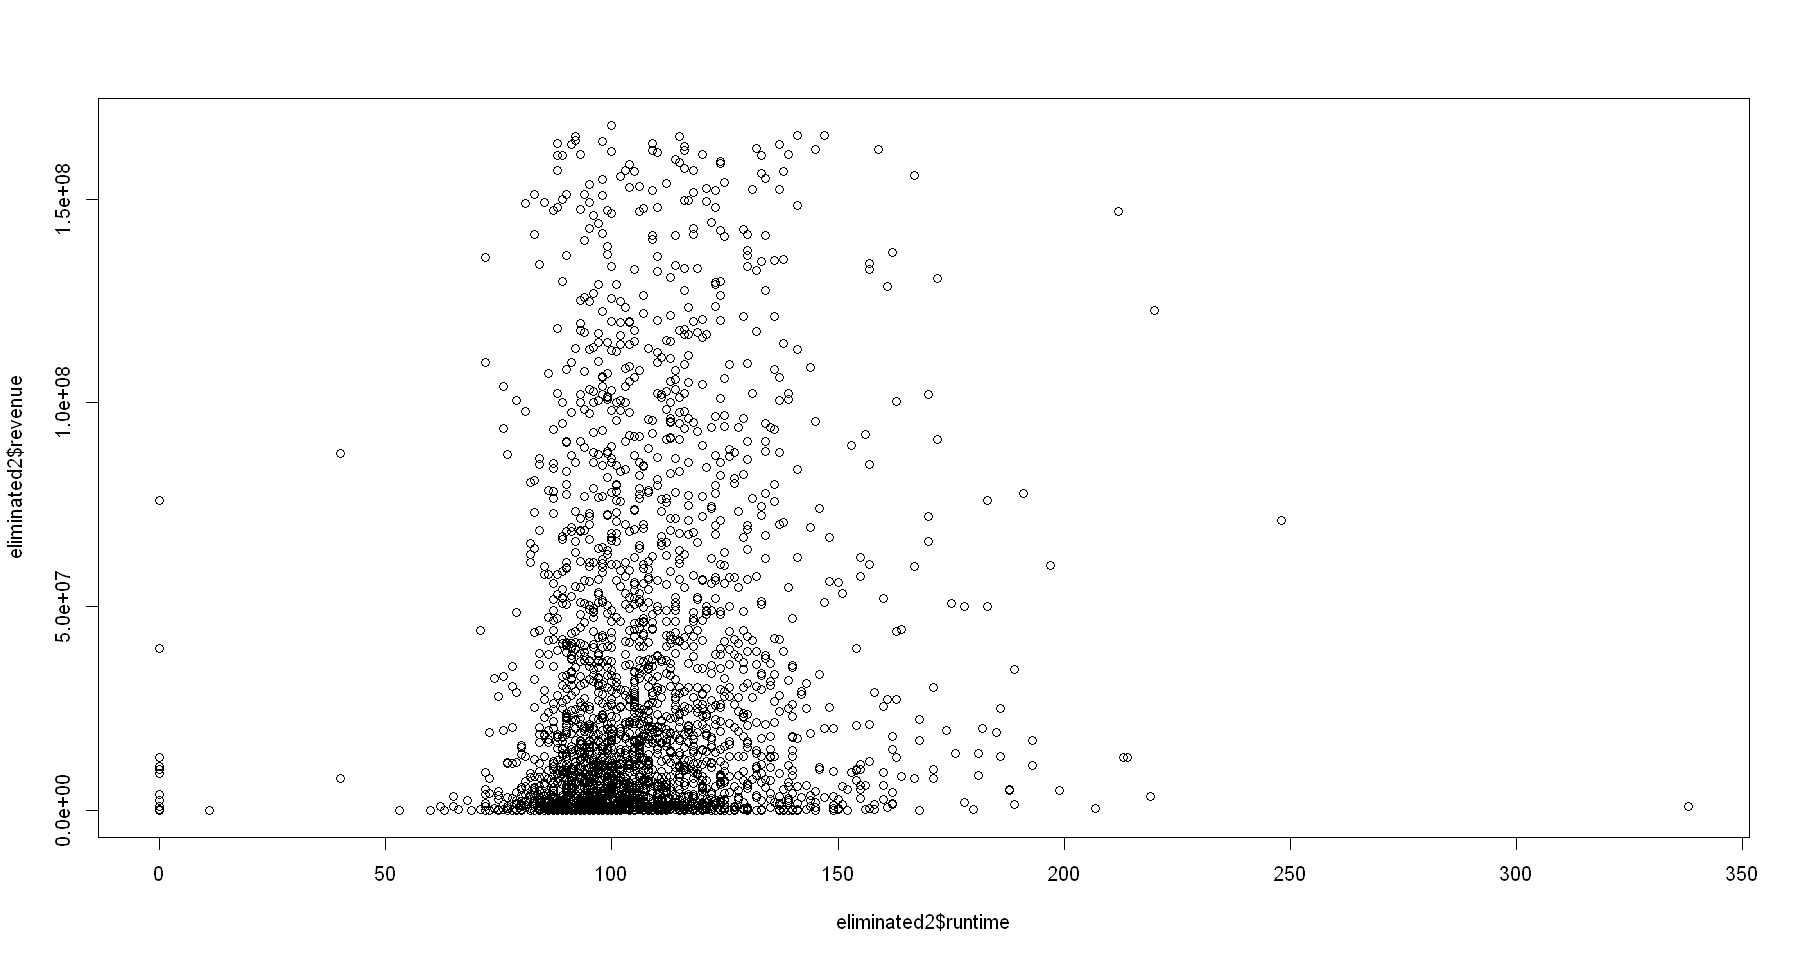

In [292]:
plot(eliminated2$revenue ~ eliminated2$runtime)

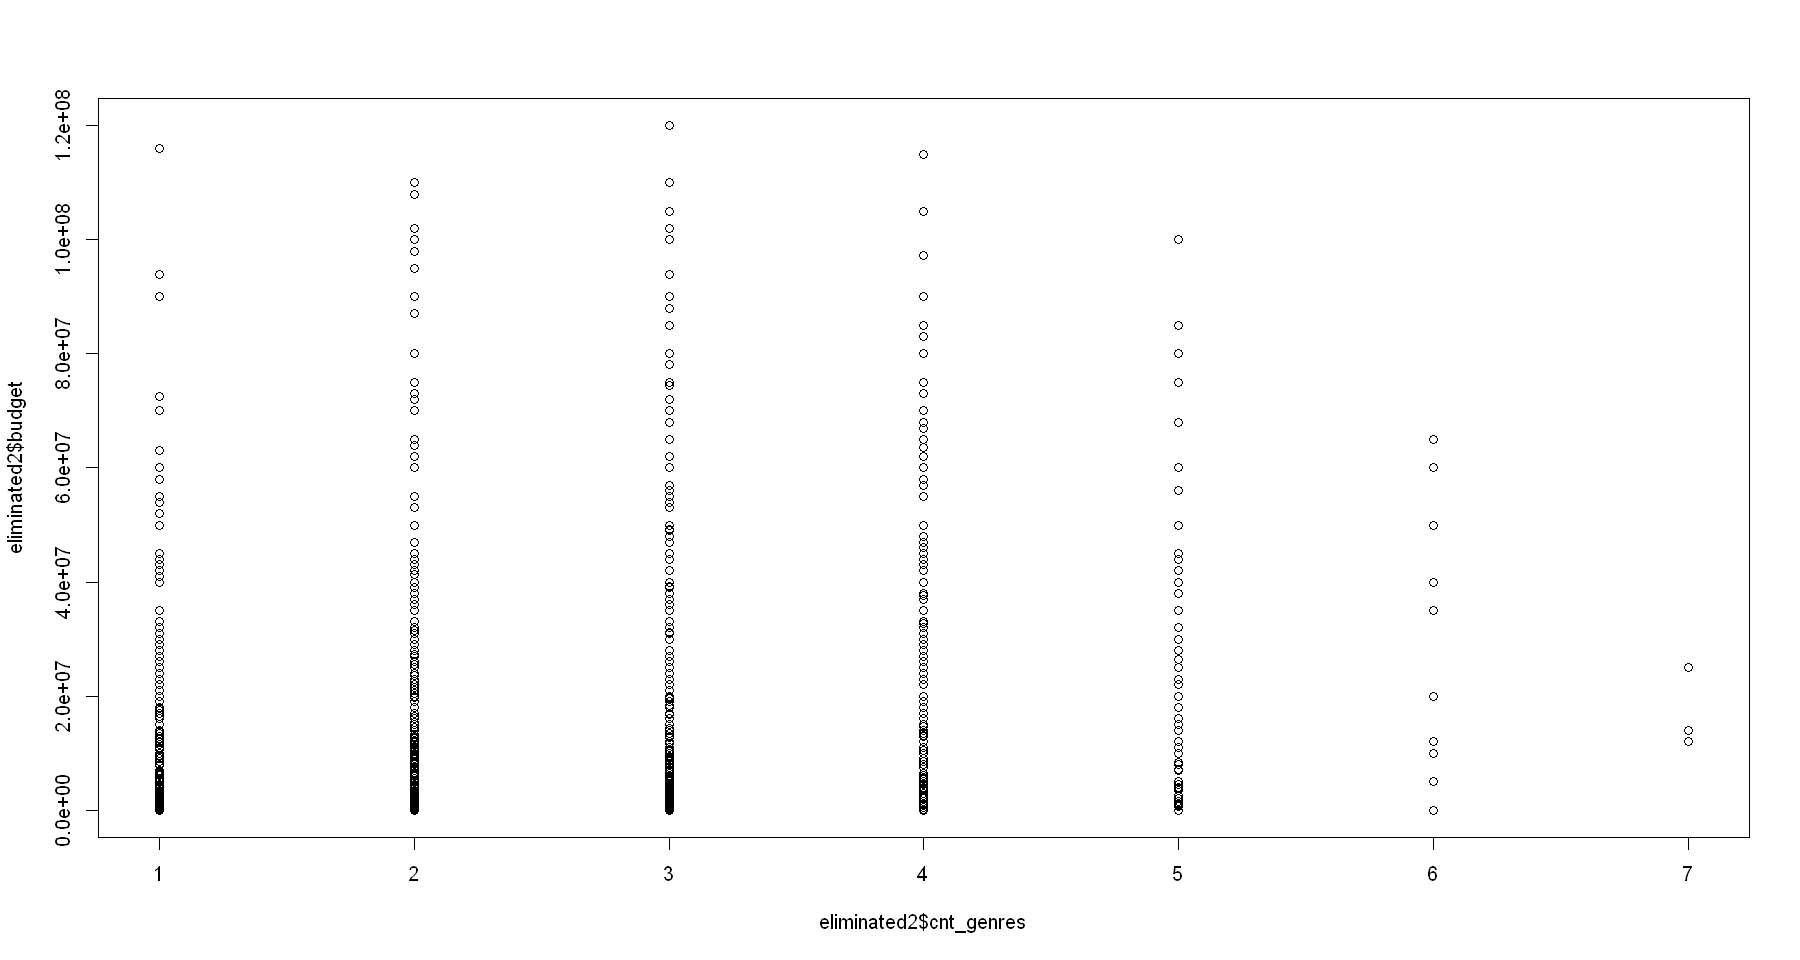

In [293]:
plot(eliminated2$budget ~ eliminated2$cnt_genres)

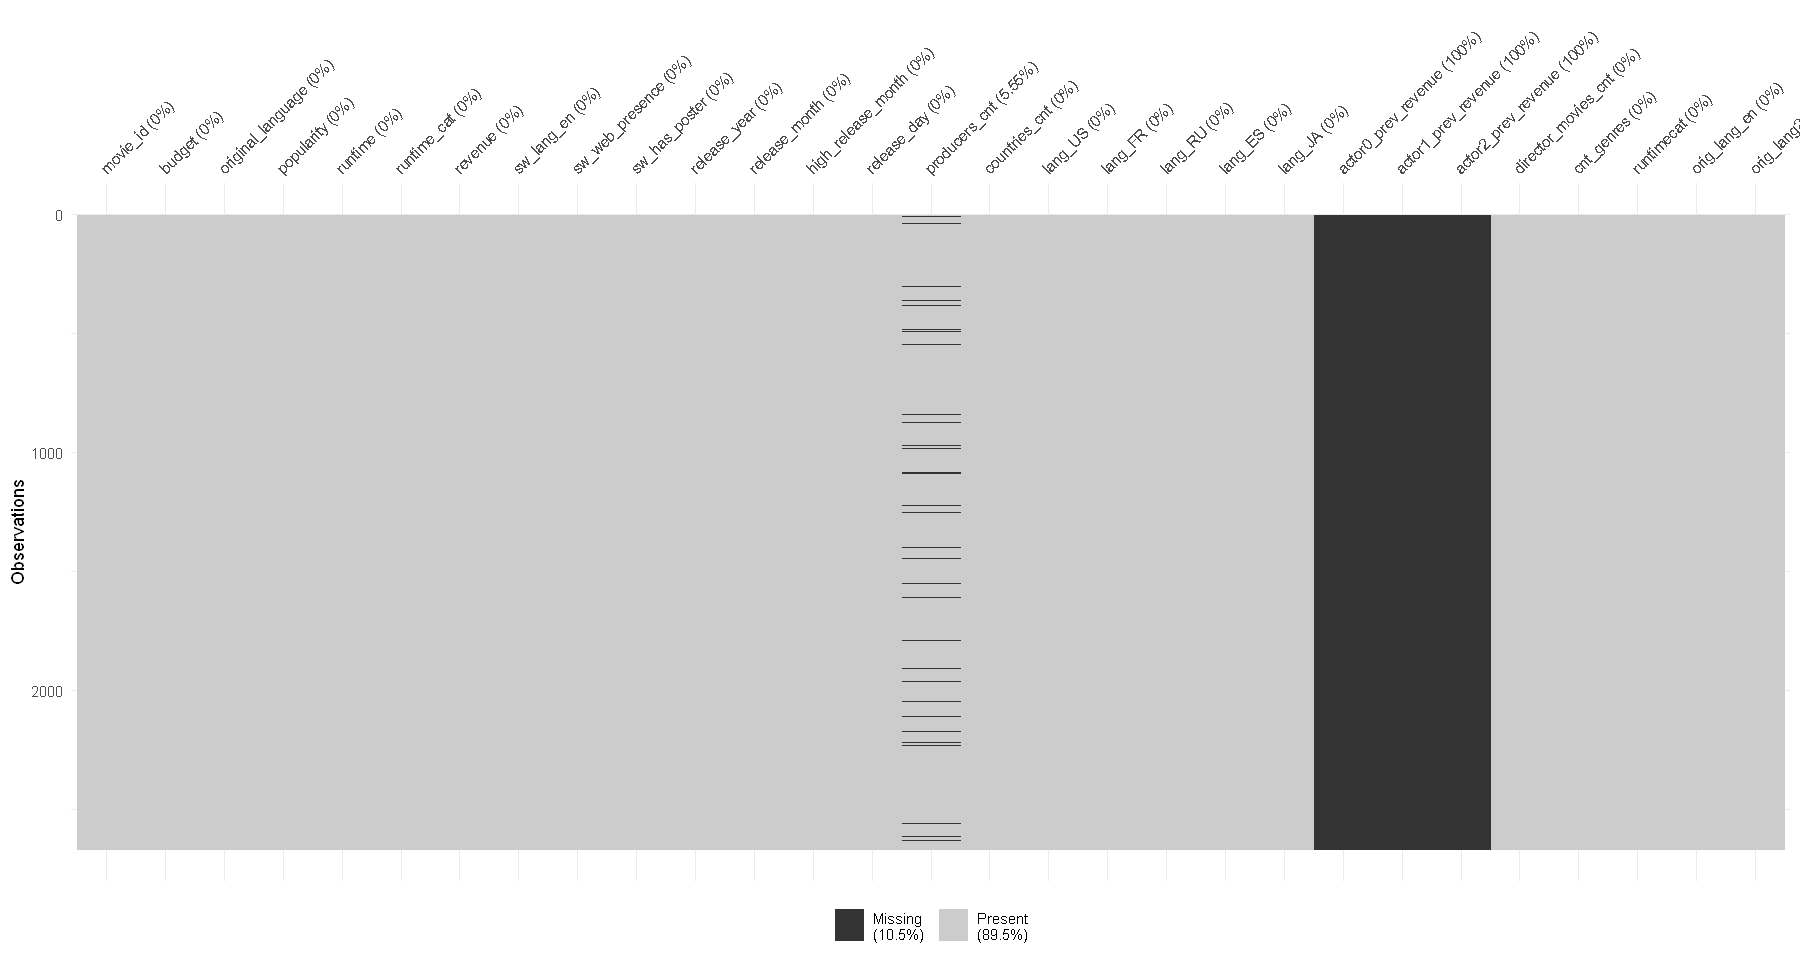

In [294]:
options(repr.plot.width = 15, repr.plot.height = 8)
vis_miss(eliminated2,warn_large_data=F)

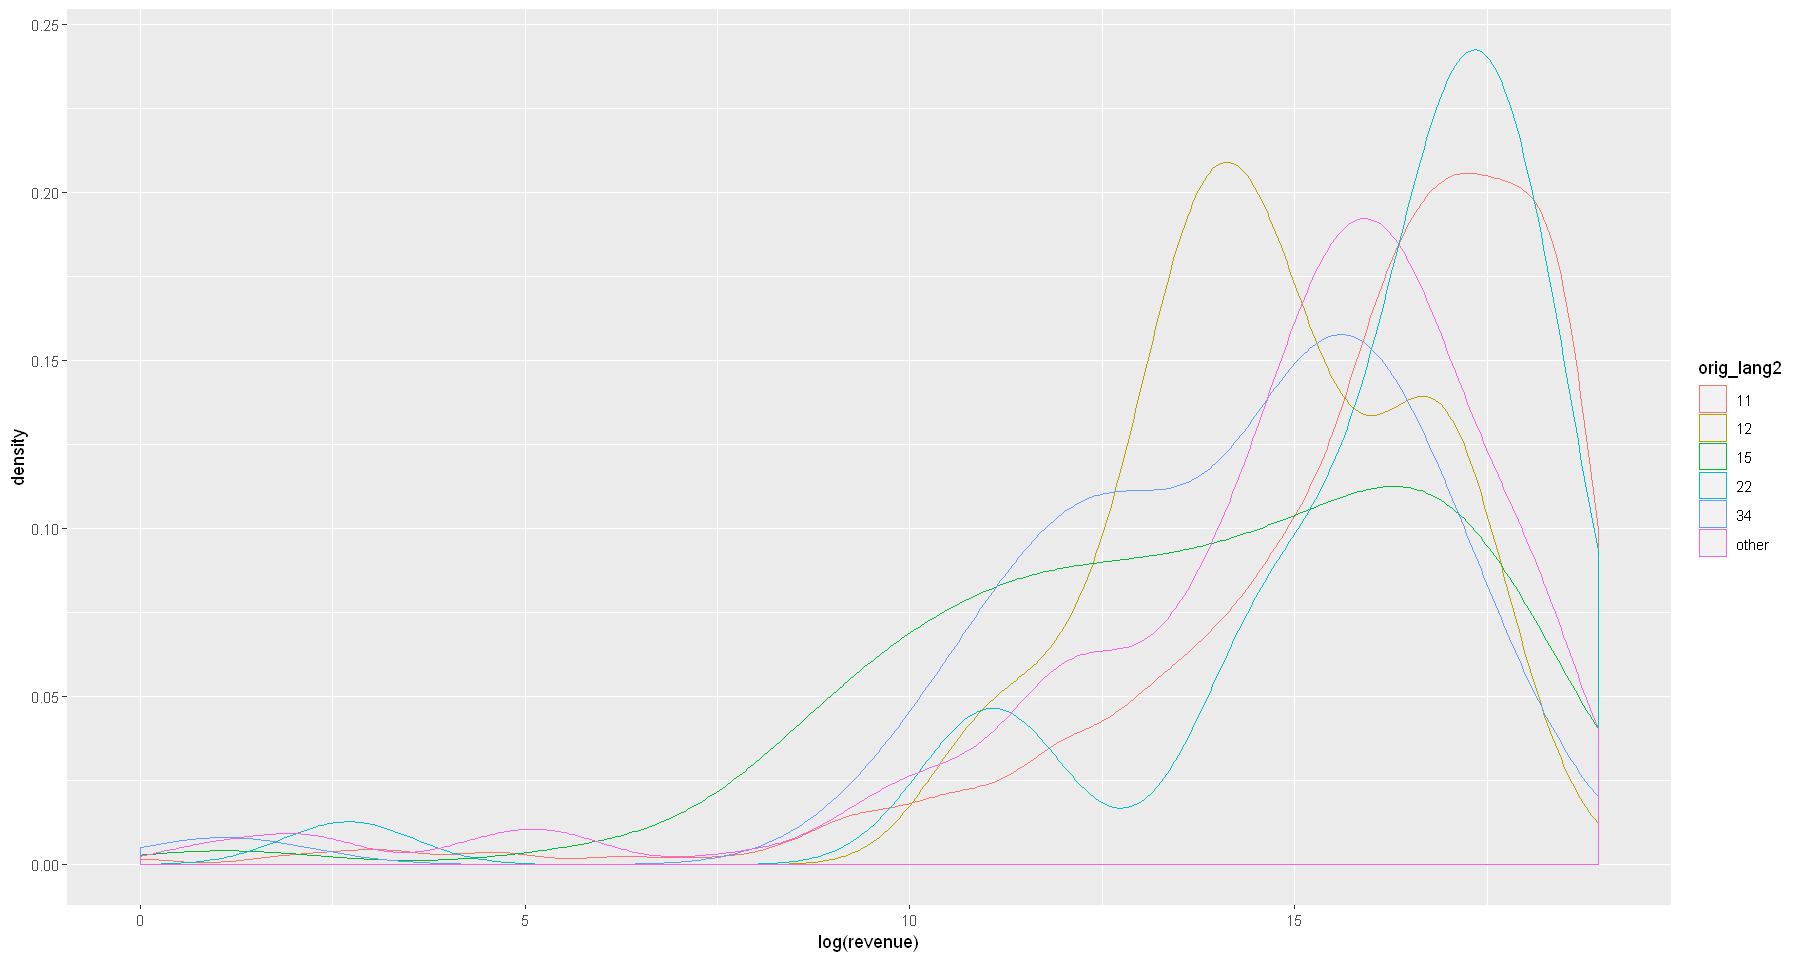

In [295]:
ggplot(data=eliminated2) +
    geom_density(aes(log(revenue), group=orig_lang2, color=orig_lang2))

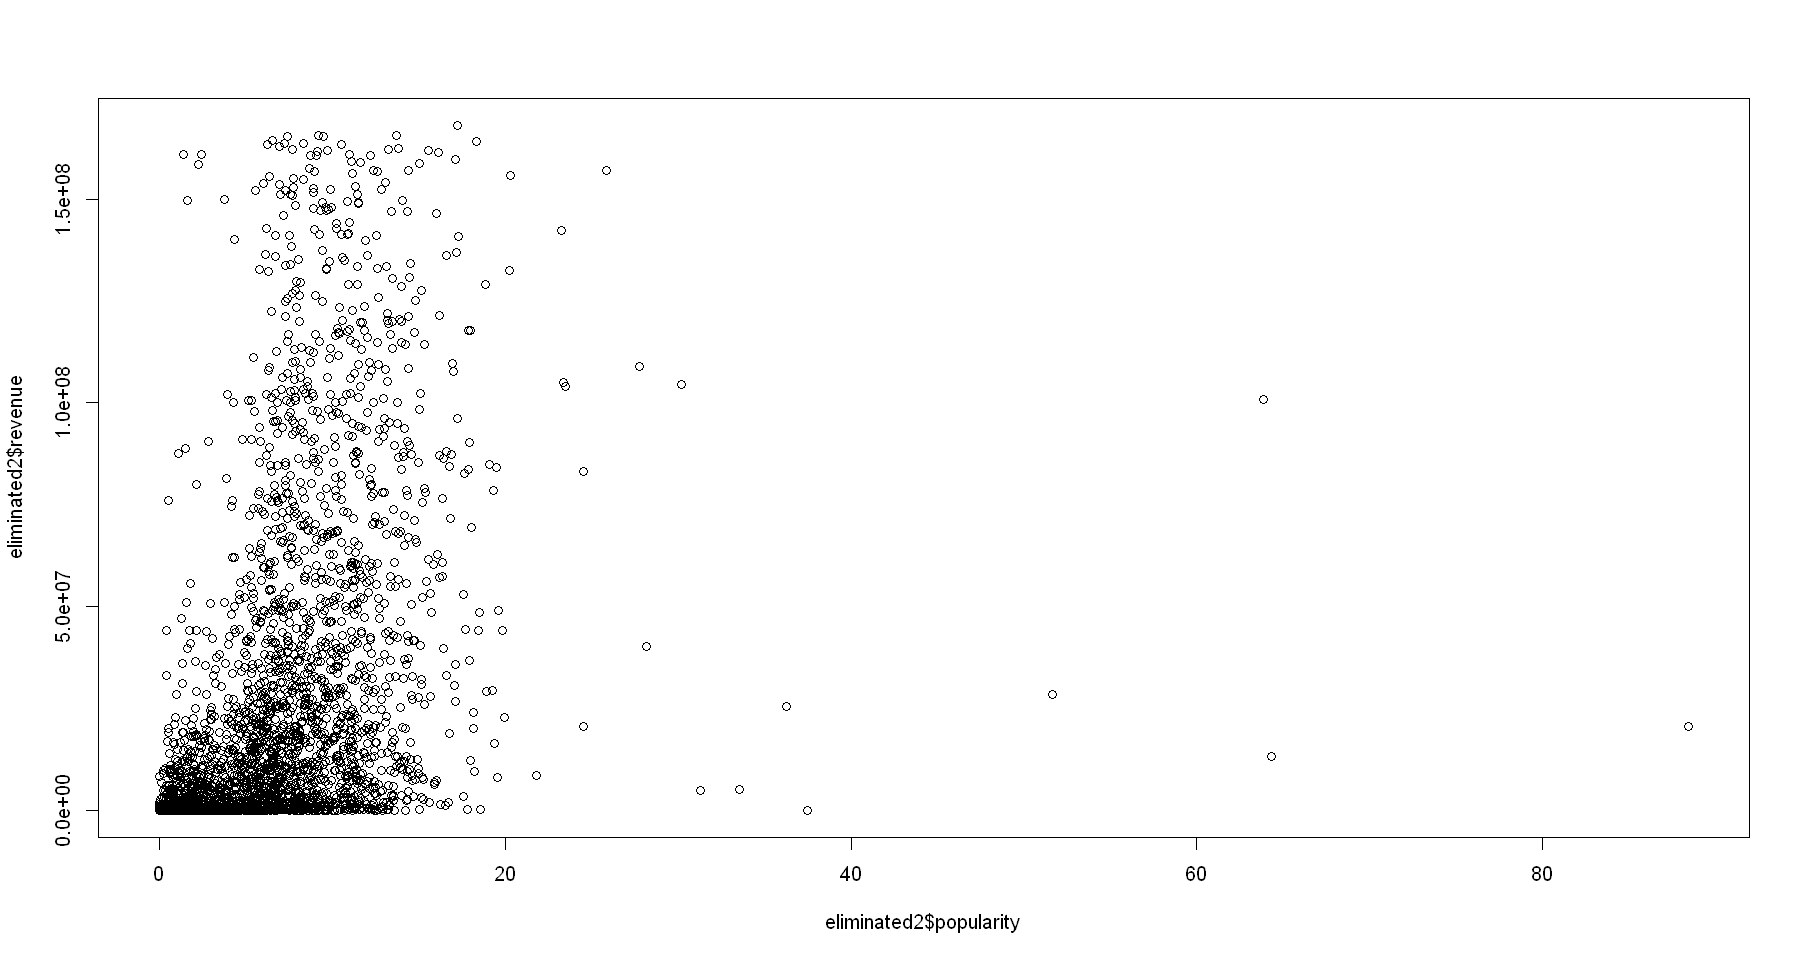

In [296]:
plot(eliminated2$revenue ~ eliminated2$popularity)

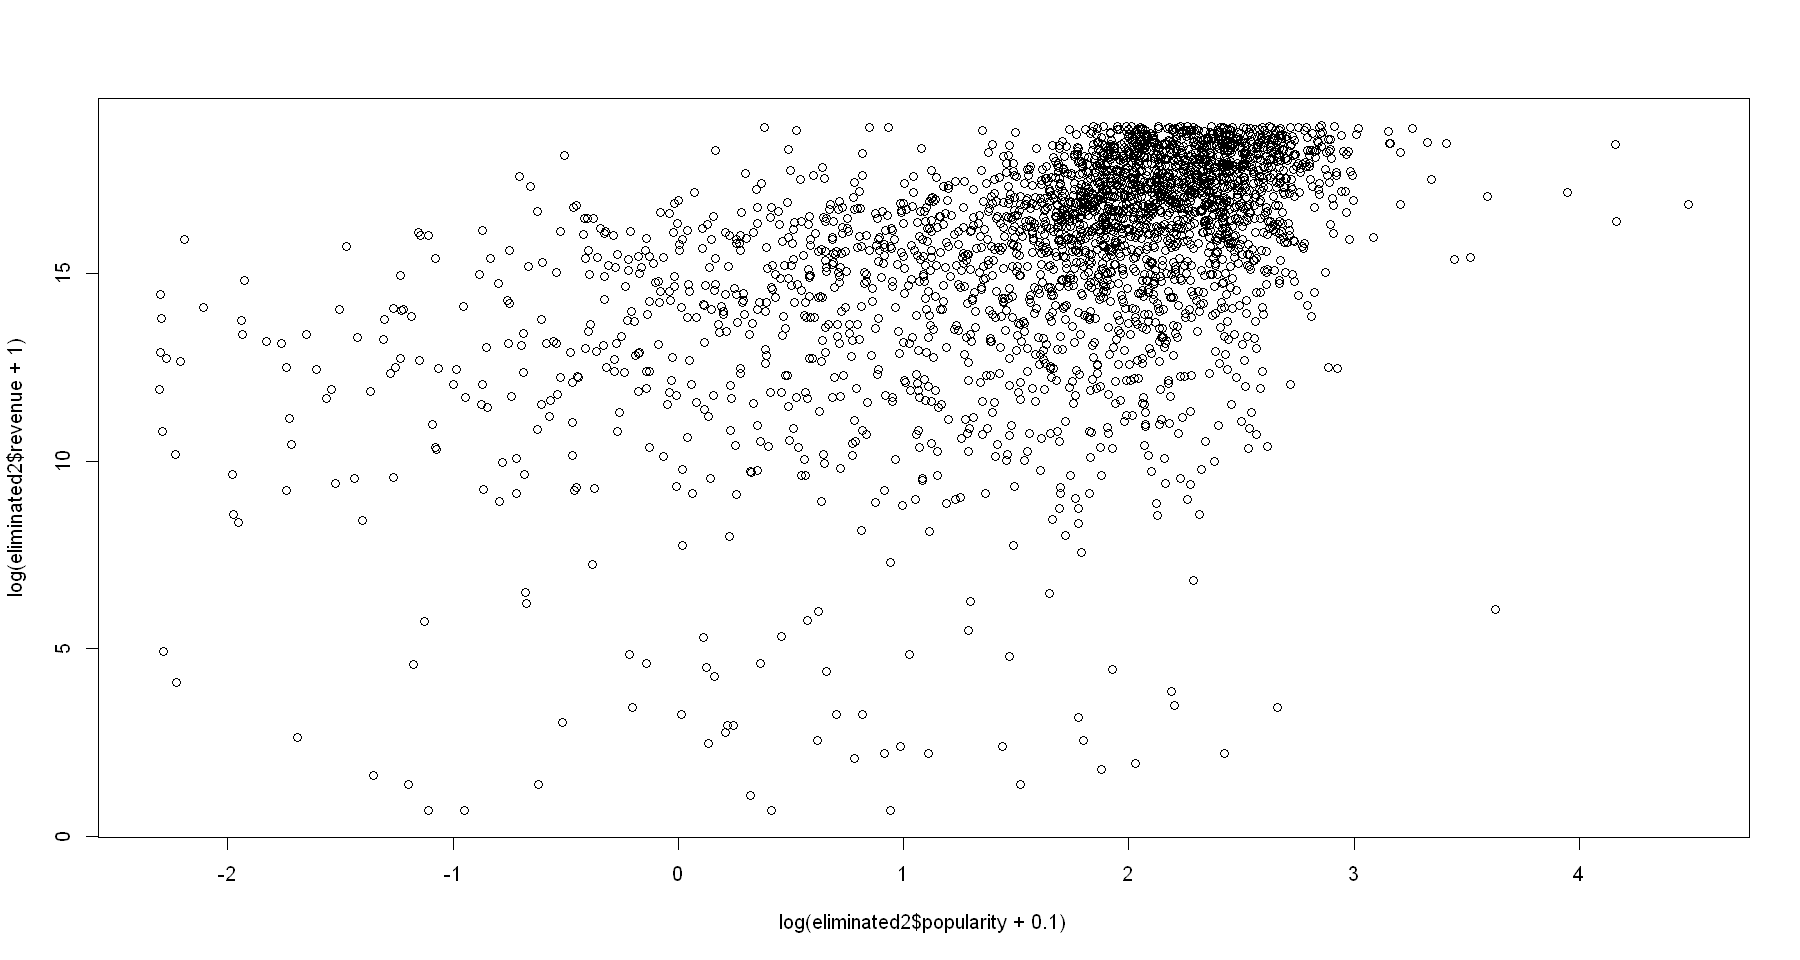

In [297]:
plot(log(eliminated2$revenue+1) ~ log(eliminated2$popularity+0.1))

In [303]:
vars <- c("revenue","budget","runtime","popularity","release_day","release_month","release_year")
res1 <- rcorr(as.matrix(eliminated2[,vars]), type="spearman")

In [304]:
res1

              revenue budget runtime popularity release_day release_month
revenue          1.00   0.61    0.22       0.52        0.06          0.03
budget           0.61   1.00    0.21       0.43        0.01          0.05
runtime          0.22   0.21    1.00       0.14        0.05          0.14
popularity       0.52   0.43    0.14       1.00        0.04          0.01
release_day      0.06   0.01    0.05       0.04        1.00          0.00
release_month    0.03   0.05    0.14       0.01        0.00          1.00
release_year    -0.06   0.11   -0.01       0.09       -0.01         -0.07
              release_year
revenue              -0.06
budget                0.11
runtime              -0.01
popularity            0.09
release_day          -0.01
release_month        -0.07
release_year          1.00

n= 2668 


P
              revenue budget runtime popularity release_day release_month
revenue               0.0000 0.0000  0.0000     0.0009      0.1498       
budget        0.0000         0